In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib as Path

In [2]:
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 800)

In [3]:
test_data=pd.read_csv(r"data/test.csv")
train_data=pd.read_csv(r"data/train.csv")
target_data=pd.read_csv(r"data/sample_submission.csv")

In [4]:
test_data.shape

(1459, 80)

In [5]:
train_data.shape

(1460, 81)

In [6]:
train_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [7]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
test_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
target_data.columns


Index(['Id', 'SalePrice'], dtype='object')

In [10]:
test_data_merged=test_data.merge(target_data,on='Id',how='left')
test_data_merged.shape

(1459, 81)

In [11]:
housing_data=pd.concat([train_data,test_data_merged],axis=0)

In [12]:
housing_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ       706.0          Unf         0.0      150.0        856.0   
1          ALQ       978.0          Unf         0.0      284.0       1262.0   
2          GLQ       486.0          Unf         0.0      434.0        920.0   
3          ALQ       216.0          Unf         0.0      540.0        756.0   
4          GLQ       655.0          Unf         0.0      490.0       1145.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710           1.0           0.0         2         1             3   
1       1262           0.0           1.0         2         0             3   
2       1786           1.0           0.0         2         1             3   
3       1717           1.0           0.0         1         0             3   
4       2198           1.0           0.0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [13]:
housing_data.shape

(2919, 81)

<H1>TAKE A QUICK LOOK AT THE HOUSING DATA</H1>

In [14]:
housing_data.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Ut

In [15]:
housing_data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  2919.000000  2919.000000  2433.000000    2919.000000  2919.000000   
mean   1460.000000    57.137718    69.305795   10168.114080     6.089072   
std     842.787043    42.517628    23.344905    7886.996359     1.409947   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     730.500000    20.000000    59.000000    7478.000000     5.000000   
50%    1460.000000    50.000000    68.000000    9453.000000     6.000000   
75%    2189.500000    70.000000    80.000000   11570.000000     7.000000   
max    2919.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  2919.000000  2919.000000   2919.000000  2896.000000  2918.000000   
mean      5.564577  1971.312778   1984.264474   102.201312   441.423235   
std       1.113131    30.291442     20.894344   179.334253   455.610826   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1953.500000   1965.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1993.000000     0.000000   368.500000   
75%       6.000000  2001.000000   2004.000000   164.000000   733.000000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  2918.000000  2918.000000  2918.000000  2919.000000  2919.000000   
mean     49.582248   560.772104  1051.777587  1159.581706   336.483727   
std     169.205611   439.543659   440.766258   392.362079   428.701456   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   220.000000   793.000000   876.000000     0.000000   
50%       0.000000   467.000000   989.500000  1082.000000     0.000000   
75%       0.000000   805.500000  1302.000000  1387.500000   704.000000   
max    1526.000000  2336.000000  6110.000000  5095.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   2919.000000  2919.000000   2917.000000   2917.000000  2919.000000   
mean       4.694416  1500.759849      0.429894      0.061364     1.568003   
std       46.396825   506.051045      0.524736      0.245687     0.552969   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1126.000000      0.000000      0.000000     1.000000   
50%        0.000000  1444.000000      0.000000      0.000000     2.000000   
75%        0.000000  1743.500000      1.000000      0.000000     2.000000   
max     1064.000000  5642.000000      3.000000      2.000000     4.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  2919.000000   2919.000000   2919.000000   2919.000000  2919.000000   
mean      0.380267      2.860226      1.044536      6.451524     0.597122   
std       0.502872      0.822693      0.214462      1.569379     0.646129   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     15.000000     4.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  2760.000000  2918.000000  2918.000000  2919.000000  2919.000000   
mean   1978.113406     1.766621   472.874572    93.709832    47.486811   
std      25.574285     0.761624   215.394815   126.526589    67.575493   
min    1895.000000     0.000000     0.000000     0.000000     0.000000   
25%    1960.000000     1.000000   320.000000     0.000000     0.000000   
50%    1979.000000     2.000000   480.000000     0.000000    26.000000   
75%    2002.000000     2.000000   576.000000   168.000000    70.000000   
max    2

In [16]:
pd.isnull(housing_data).sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType       1766
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

<h4>misiing values->Alley - 2721,LotFrontage - 486,MasVnrType -  1766,MasVnrArea - 23,BsmtQual -  81
BsmtCond - 82,BsmtExposure  - 82, BsmtFinType1 - 79,BsmtFinSF1 -  1, BsmtFinType2 -  80,Electrical - 1,
BsmtFullBath        2, BsmtHalfBath - 2 , KitchenQual - 1,Functional - 2,FireplaceQu      1420
GarageType - 157 ,GarageYrBlt -  159, GarageFinish -159, GarageCars -1, GarageArea - 1, GarageQual - 159
GarageCond -1 59,PoolQC           2909, Fence - 2348, MiscFeature - 2814,SaleType - 1</h4>

<h1>Univariate Analysis</h1>

<h3>Histogram</h3>

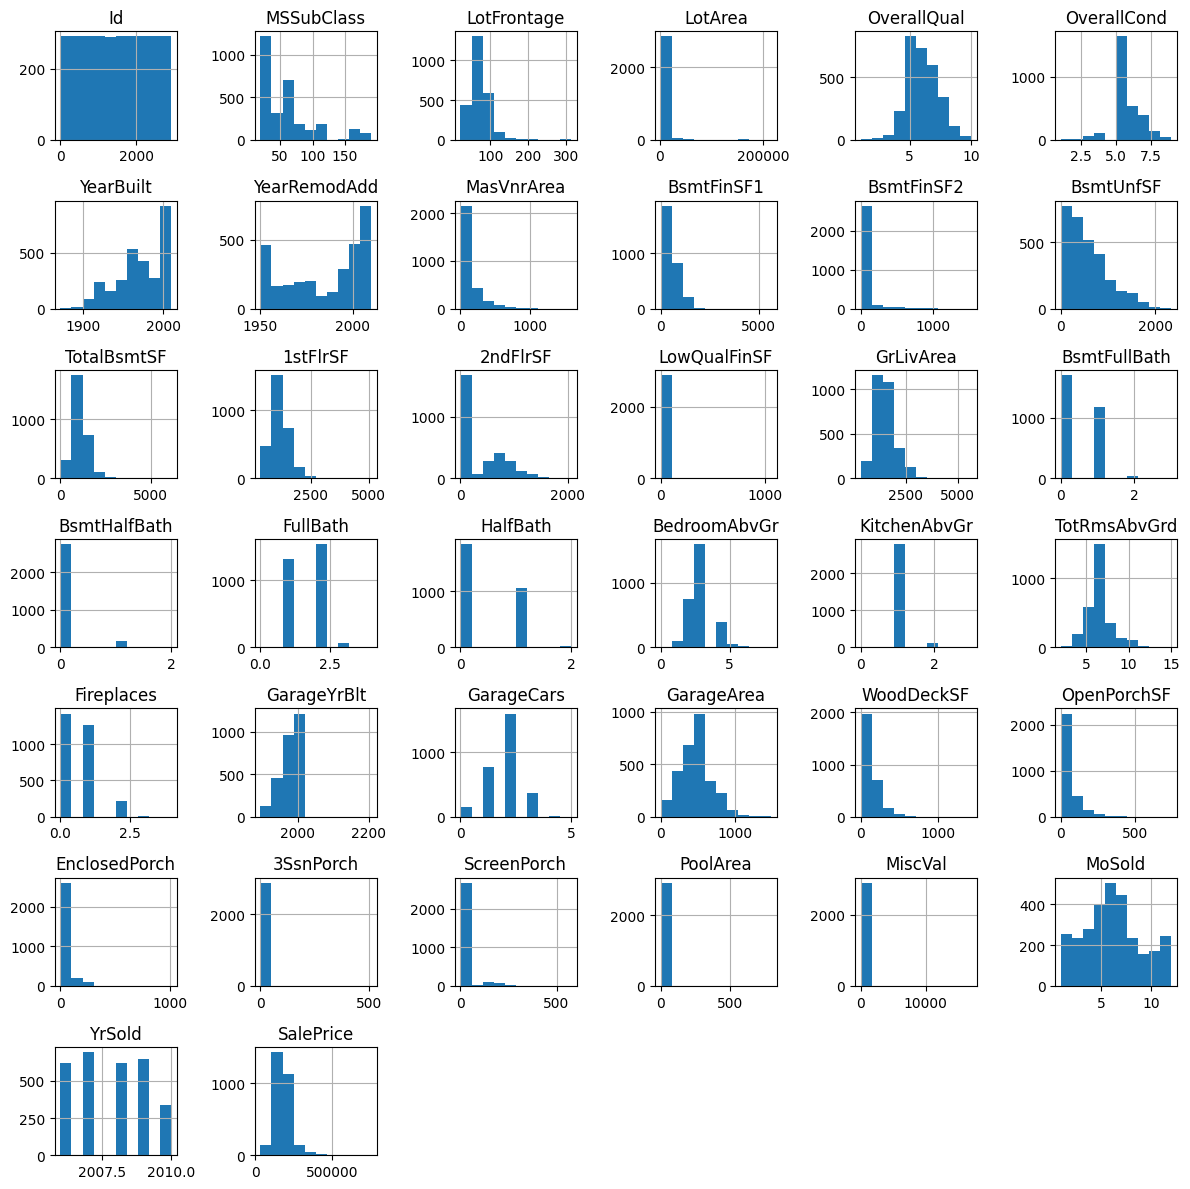

In [17]:
housing_data.hist(grid=True,figsize=(12,12))
plt.tight_layout()
plt.savefig("save_fig/hist.png")
plt.show()

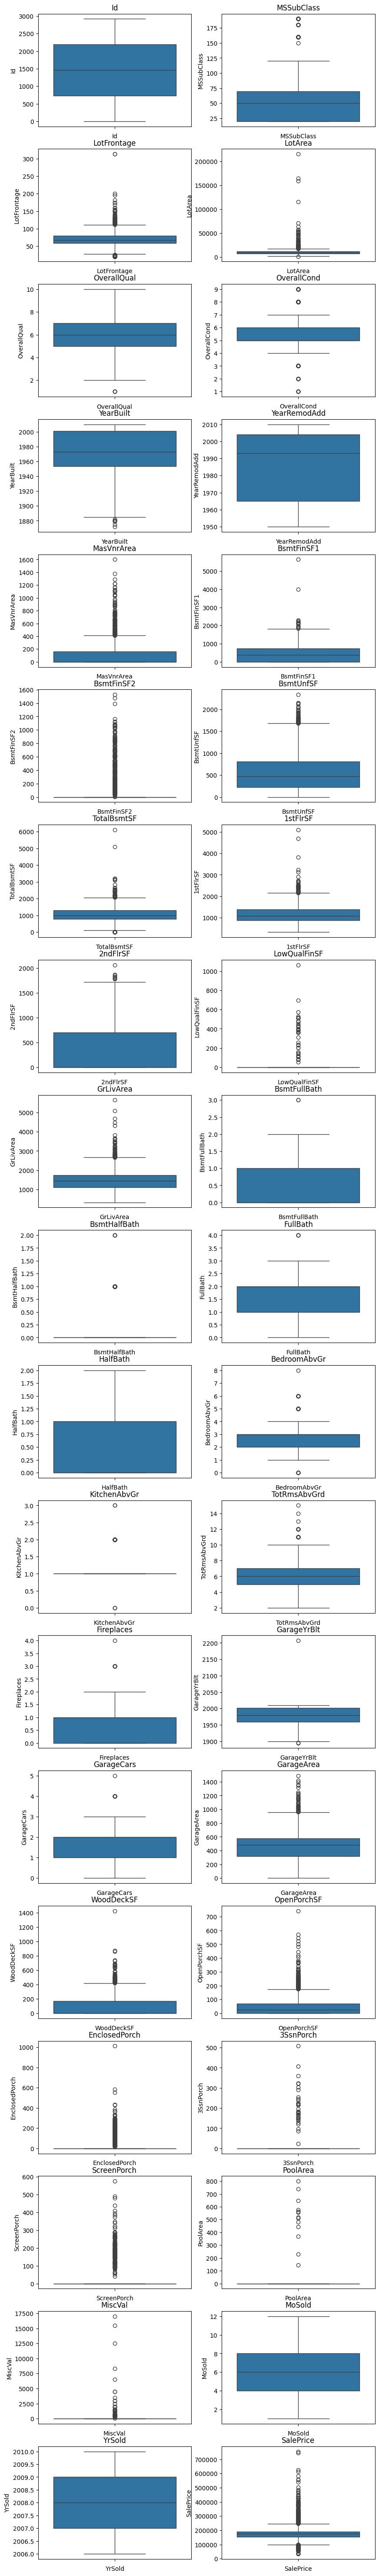

In [18]:
numerical_columns = housing_data.select_dtypes(include="number").columns
rows=int(len(numerical_columns)/2)
fig, ax = plt.subplots(rows, 2, figsize=(10, rows * 4))
ax = ax.flatten()
for i, col in enumerate(numerical_columns):
    sns.boxplot(data=housing_data[col], ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xlabel(col)
plt.savefig("save_fig/boxplot.png")
plt.show()



By carefully analyzing boxplot, most of the column contain outliers, to analyze it in onesigle figure it is better to use sns.boxplot

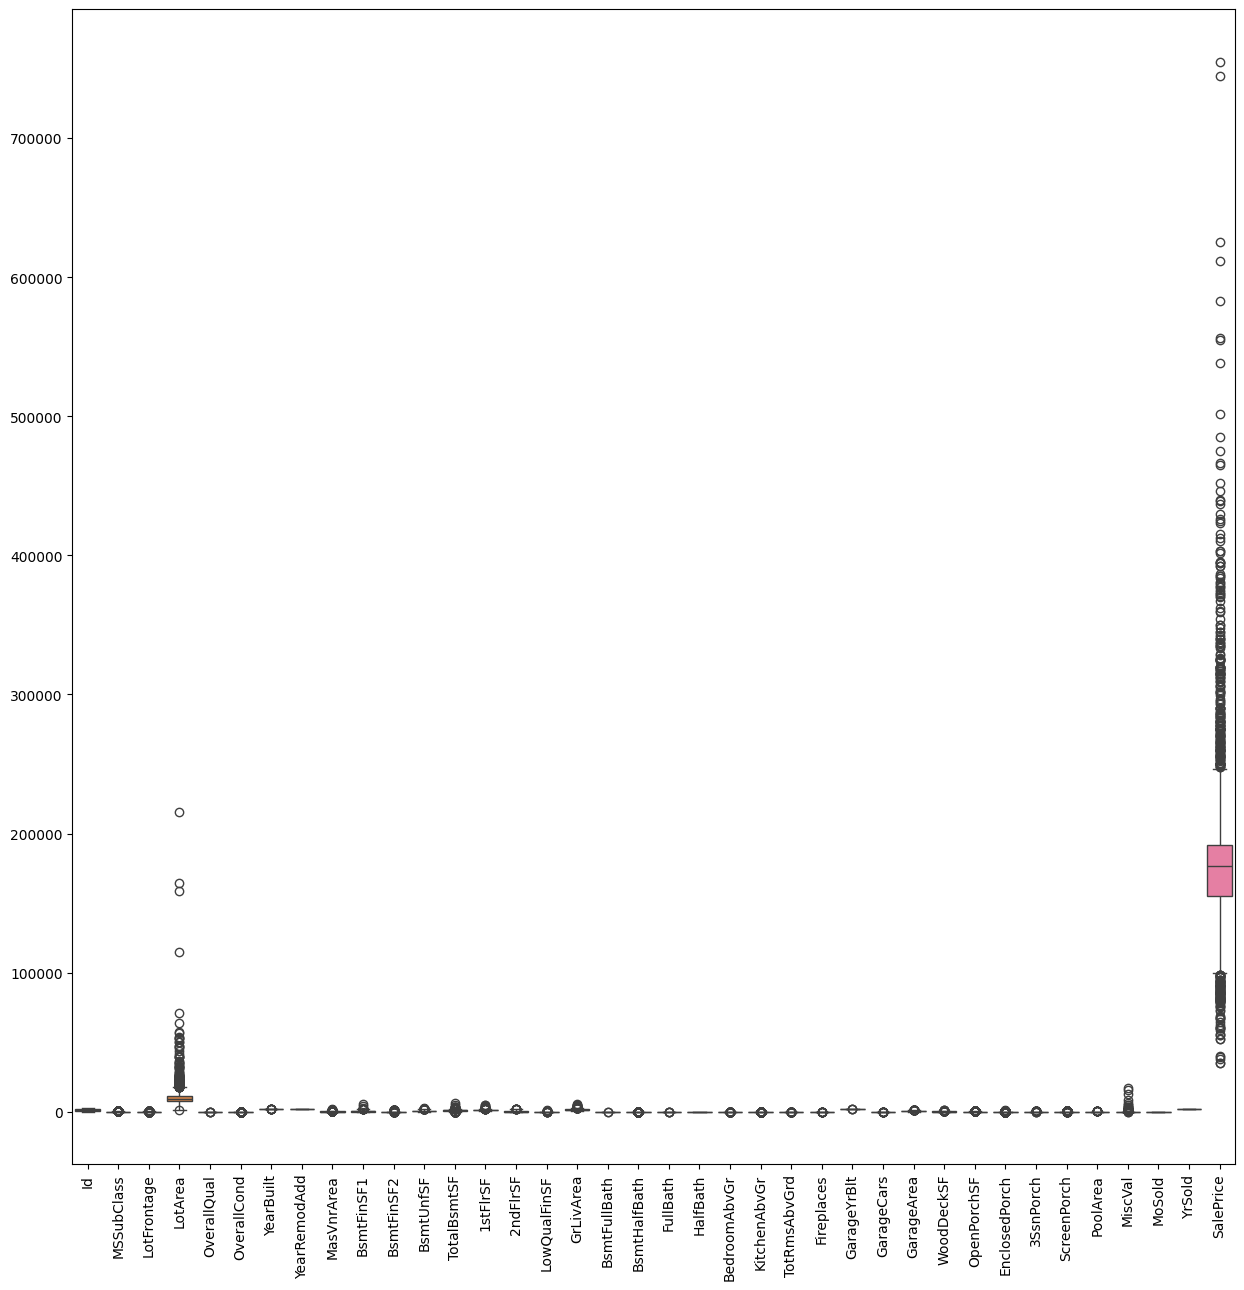

In [19]:
plt.figure(figsize=(15,15))
sns.boxplot(data=housing_data[numerical_columns])
ax = plt.gca()
ax.set_xticks(range(len(numerical_columns))) 
ax.set_xticklabels(numerical_columns, rotation=90)  
plt.savefig("save_fig/box1.png")
plt.show()

<h3>here in this boxplot salesprice have substaaaantial number of outlier let check which are the vaiables influencing it
Let use IQR method</h3>

In [20]:
IQR = housing_data["SalePrice"].quantile(.25)

In [21]:
salesprice_min=(3*IQR)-housing_data["SalePrice"].quantile(.25)
salesprice_min

np.float64(309590.1682512689)

In [22]:
salesprice_max=(3*IQR)+housing_data["SalePrice"].quantile(.75)
salesprice_max

np.float64(656280.9965335228)

the values that lies less than salesprice_min and values that is more than salesprice_max is consider as outlier

In [23]:
housing_data.loc[
    (housing_data["SalePrice"] < salesprice_min) | 
    (housing_data["SalePrice"] > salesprice_max),
    :
].head()


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ       706.0          Unf         0.0      150.0        856.0   
1          ALQ       978.0          Unf         0.0      284.0       1262.0   
2          GLQ       486.0          Unf         0.0      434.0        920.0   
3          ALQ       216.0          Unf         0.0      540.0        756.0   
4          GLQ       655.0          Unf         0.0      490.0       1145.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710           1.0           0.0         2         1             3   
1       1262           0.0           1.0         2         0             3   
2       1786           1.0           0.0         2         1             3   
3       1717           1.0           0.0         1         0             3   
4       2198           1.0           0.0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

<h3>before capping and treating outlier lets check the correlation</h3>

In [24]:
from scipy.stats import spearmanr
housing_data_corr=housing_data[numerical_columns].corr(method='spearman')

<Axes: >

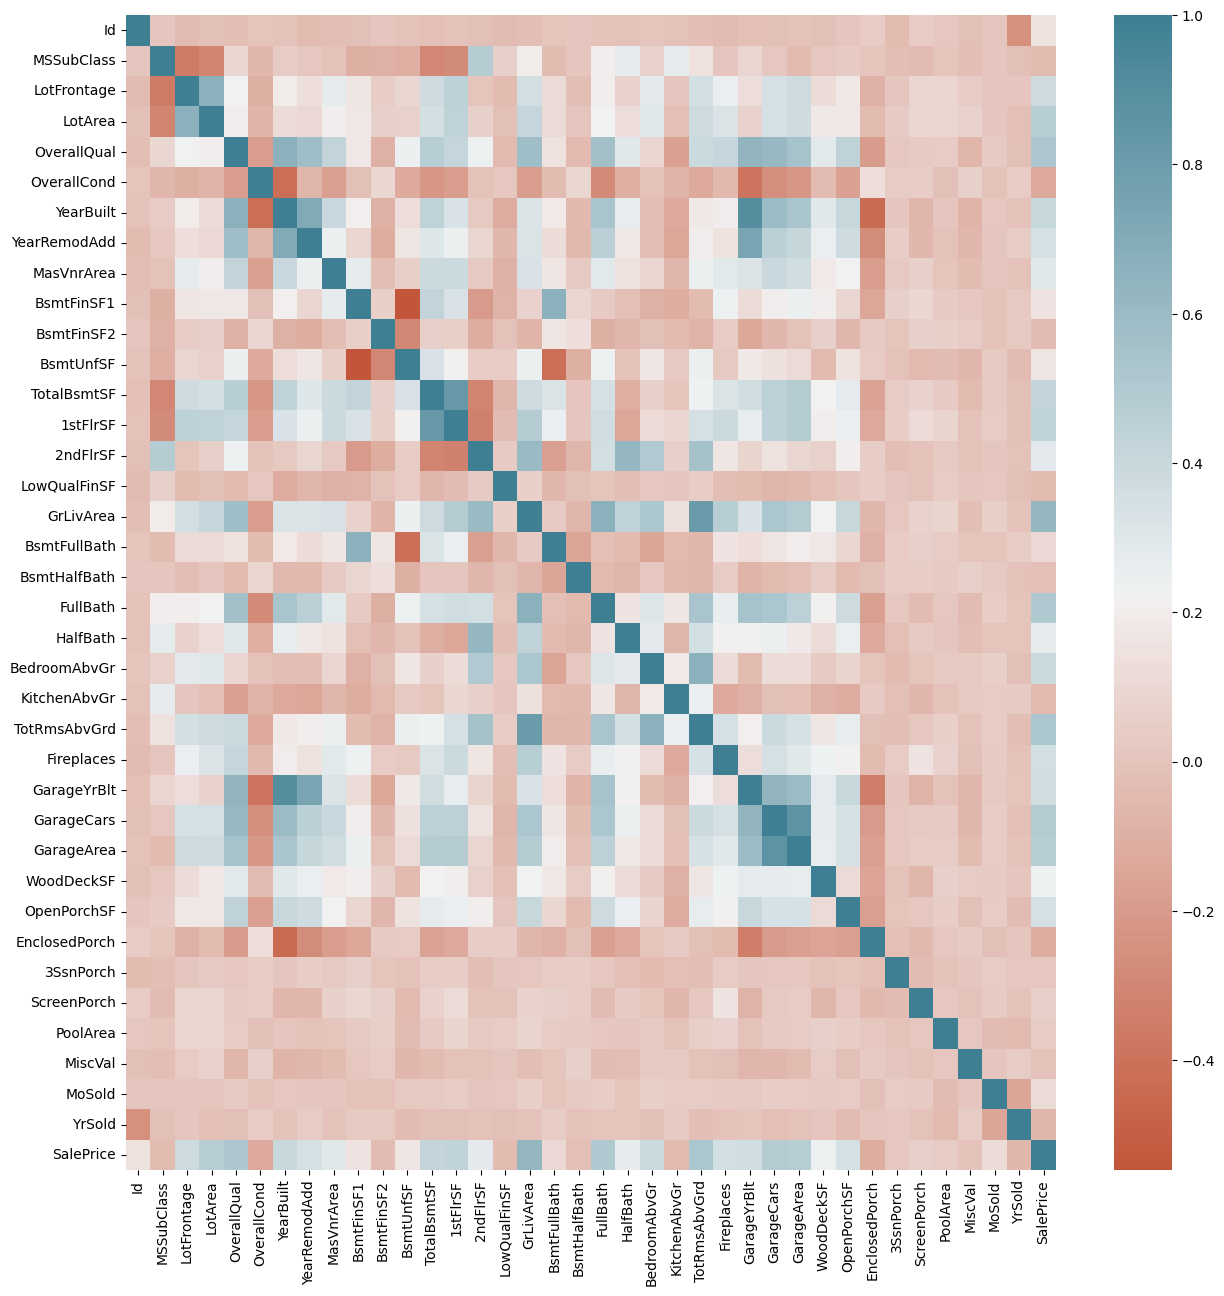

In [25]:
plt.figure(figsize=(15,15))
sns.heatmap(housing_data_corr,cmap=sns.diverging_palette(20,220,as_cmap=True))

In [26]:
housing_data_corr.head()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id           1.000000    0.010335    -0.034829 -0.015878    -0.032414   
MSSubClass   0.010335    1.000000    -0.358845 -0.314604     0.098388   
LotFrontage -0.034829   -0.358845     1.000000  0.657113     0.229579   
LotArea     -0.015878   -0.314604     0.657113  1.000000     0.203971   
OverallQual -0.032414    0.098388     0.229579  0.203971     1.000000   

             OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id              0.002473  -0.015458     -0.044102   -0.027917   -0.019013   
MSSubClass     -0.063699   0.033315      0.016209   -0.006173   -0.103440   
LotFrontage    -0.106011   0.195007      0.134734    0.273822    0.161309   
LotArea        -0.081013   0.123510      0.102956    0.203350    0.176311   
OverallQual    -0.188659   0.664525      0.581580    0.427616    0.175055   

             BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
Id             0.006067  -0.014729    -0.023581 -0.012859 -0.020274   
MSSubClass    -0.097622  -0.108284    -0.303210 -0.280339  0.484969   
LotFrontage    0.047170   0.088642     0.377806  0.444356 -0.002042   
LotArea        0.060635   0.063425     0.354959  0.441315  0.062352   
OverallQual   -0.096030   0.245377     0.473068  0.415785  0.242790   

             LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
Id              -0.038086  -0.031334     -0.001503      0.008666 -0.013644   
MSSubClass       0.060098   0.191601     -0.044860      0.006214  0.204002   
LotFrontage     -0.043211   0.360486      0.108838     -0.030946  0.206882   
LotArea         -0.017448   0.417211      0.111382      0.008082  0.222472   
OverallQual     -0.049895   0.582914      0.144920     -0.045989  0.563673   

             HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
Id          -0.015429     -0.002889     -0.007982     -0.030203   -0.038704   
MSSubClass   0.270283      0.066885      0.271876      0.147687    0.007256   
LotFrontage  0.075075      0.283391      0.009431      0.358117    0.253977   
LotArea      0.126384      0.293630     -0.026915      0.379273    0.318036   
OverallQual  0.298317      0.086699     -0.169976      0.387603    0.417169   

             GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
Id             -0.026626   -0.017411   -0.014524   -0.015871     0.002964   
MSSubClass      0.083590    0.020021   -0.047373    0.018117     0.028029   
LotFrontage     0.127763    0.351241    0.378027    0.121676     0.178252   
LotArea         0.074564    0.347240    0.373305    0.180705     0.176855   
OverallQual     0.639374    0.612654    0.548663    0.289034     0.439588   

             EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal  \
Id                0.035036  -0.044138     0.034987  0.019980 -0.016979   
MSSubClass       -0.002817  -0.032750    -0.037903 -0.001525 -0.030941   
LotFrontage      -0.094946   0.010037     0.085234  0.083221  0.037160   
LotArea          -0.044906   0.028611     0.090359  0.083111  0.073188   
OverallQual      -0.190787   0.019982     0.027692  0.033365 -0.075757   

               MoSold    YrSold  SalePrice  
Id           0.010086 -0.256071   0.152526  
MSSubClass   0.013232 -0.019246  -0.041245  
LotFrontage  0.013844  0.002838   0.382712  
LotArea      0.005737 -0.023970   0.478429  
OverallQual  0.027696 -0.015552   0.520117

<h3>Lets take first 15 columns which influence the salesprice most</h3>

In [27]:
housing_corr=housing_data_corr["SalePrice"].sort_values().nlargest(15)[1:]

In [28]:
housing_corr

GrLivArea       0.625510
TotRmsAbvGrd    0.522968
OverallQual     0.520117
FullBath        0.504724
GarageCars      0.486818
LotArea         0.478429
GarageArea      0.474476
1stFlrSF        0.433886
TotalBsmtSF     0.420277
YearBuilt       0.406163
BedroomAbvGr    0.389338
LotFrontage     0.382712
GarageYrBlt     0.365891
Fireplaces      0.361069
Name: SalePrice, dtype: float64

<h4>These are the 15 features that have the greatest influence on SalePrice.</h4>

<h3>Lets create a sctterplot from it</h3>

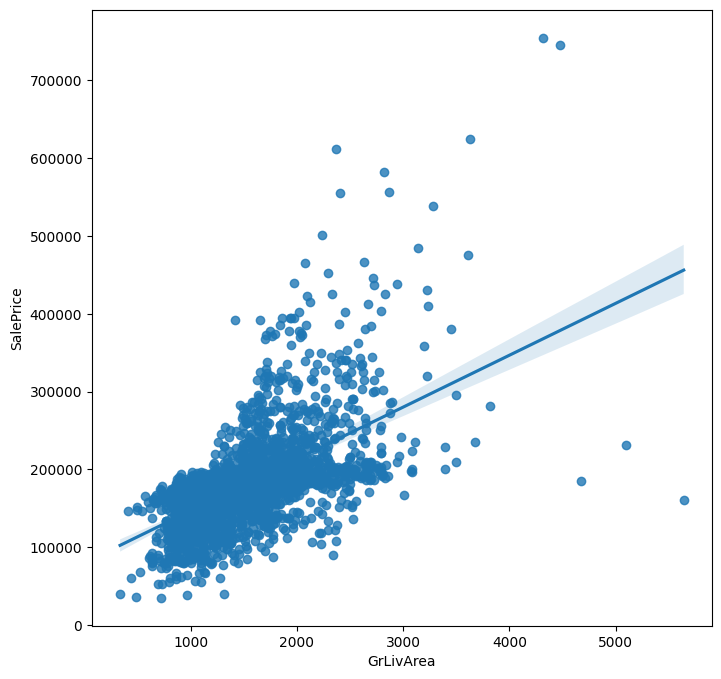

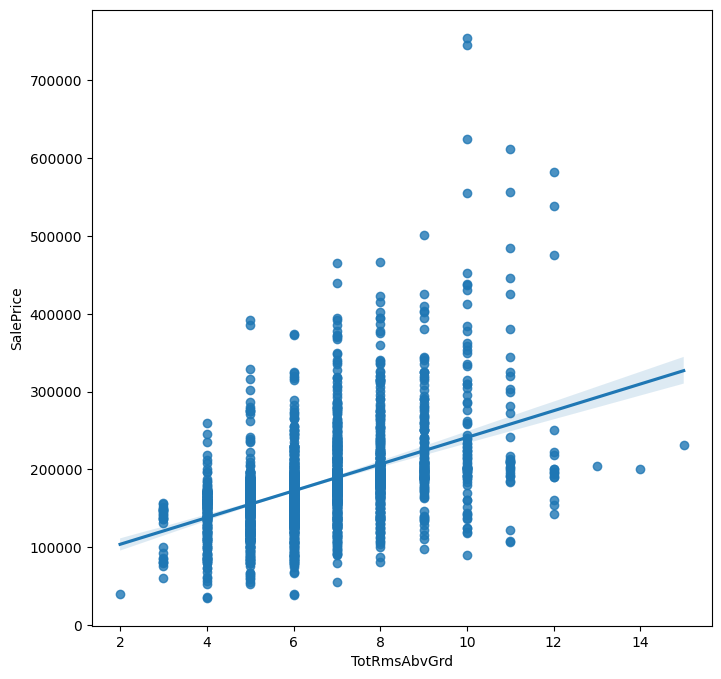

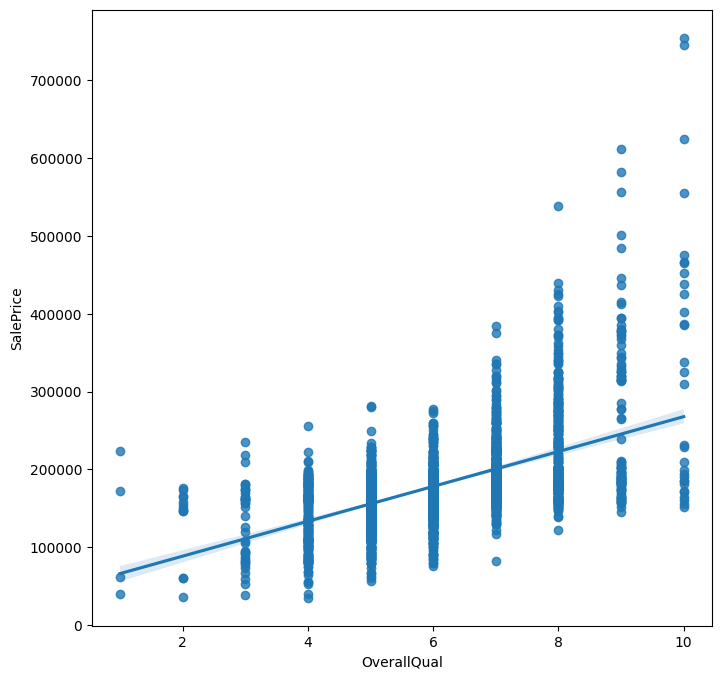

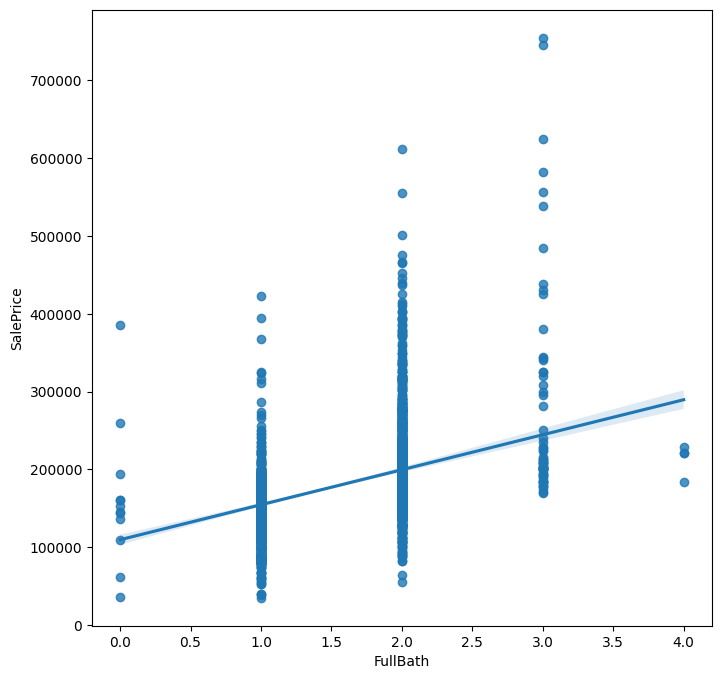

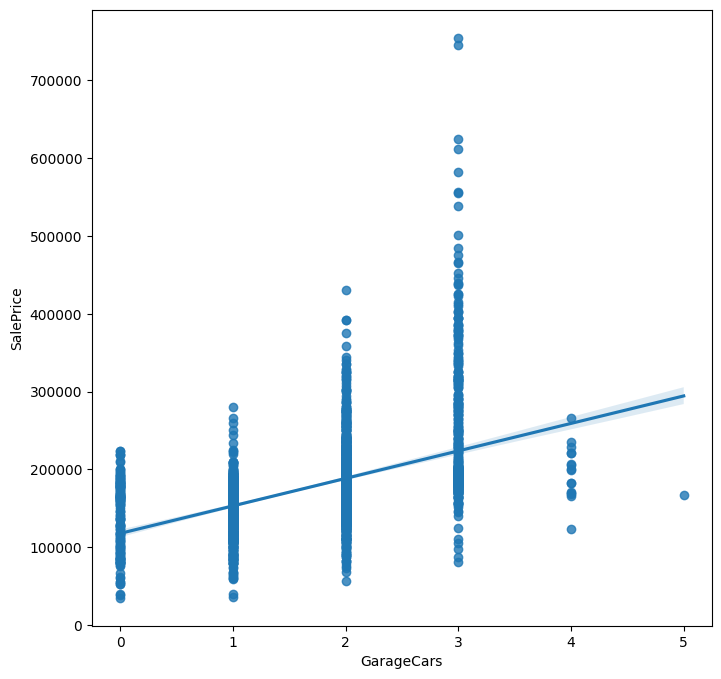

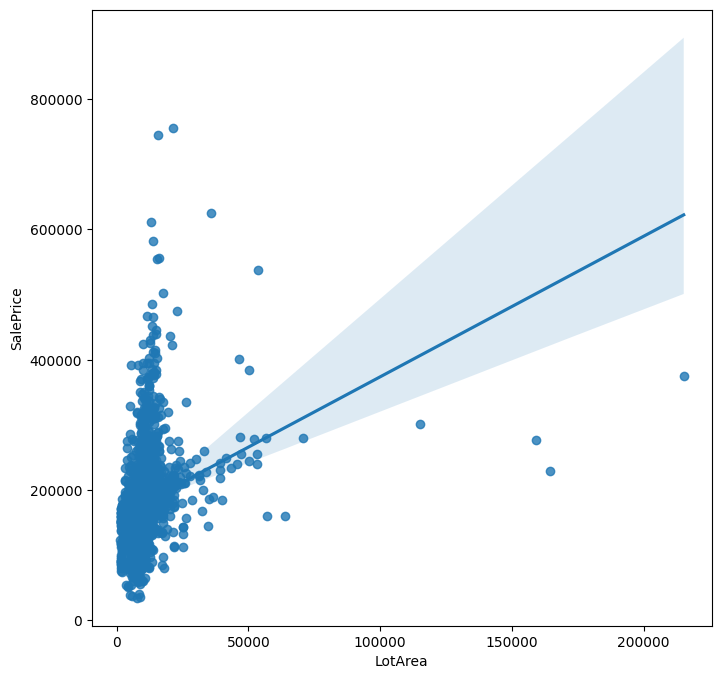

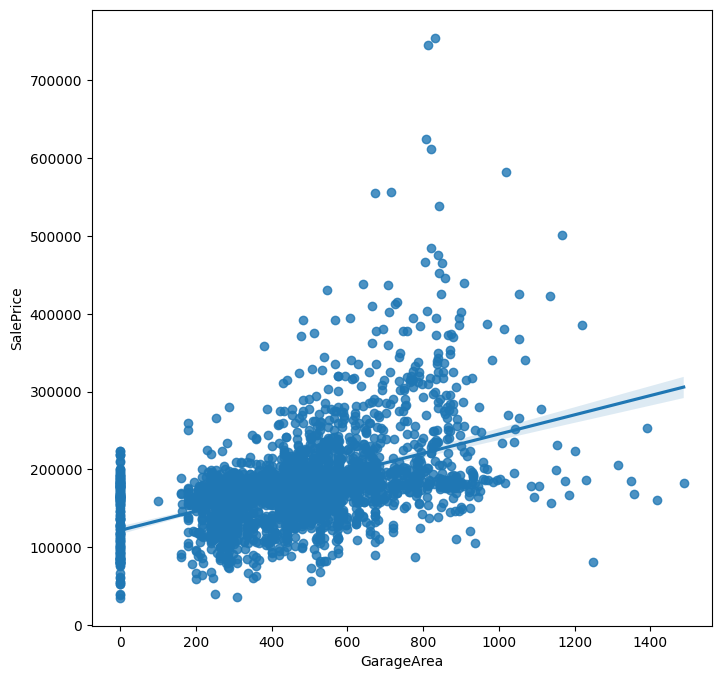

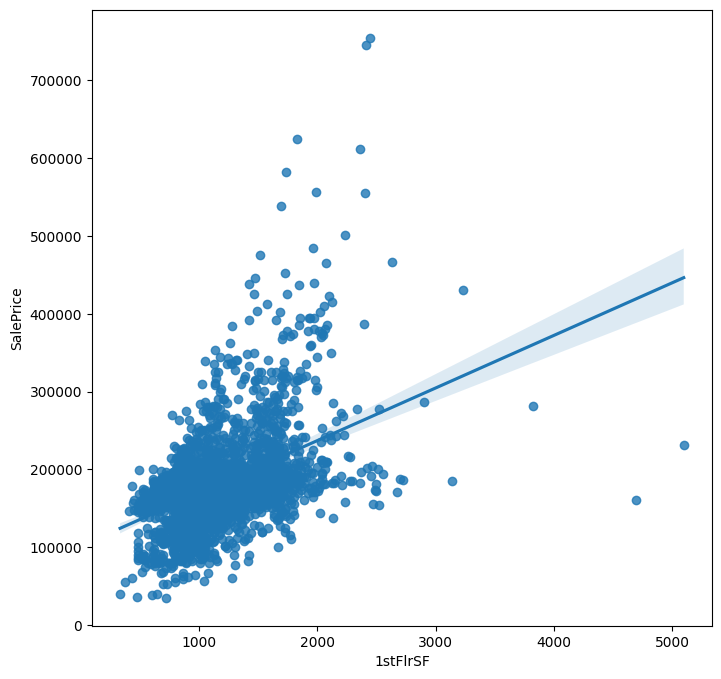

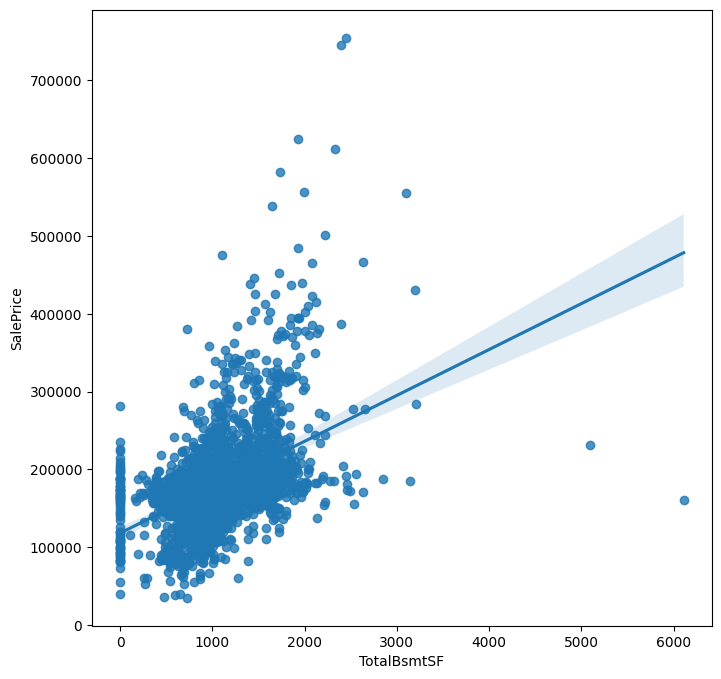

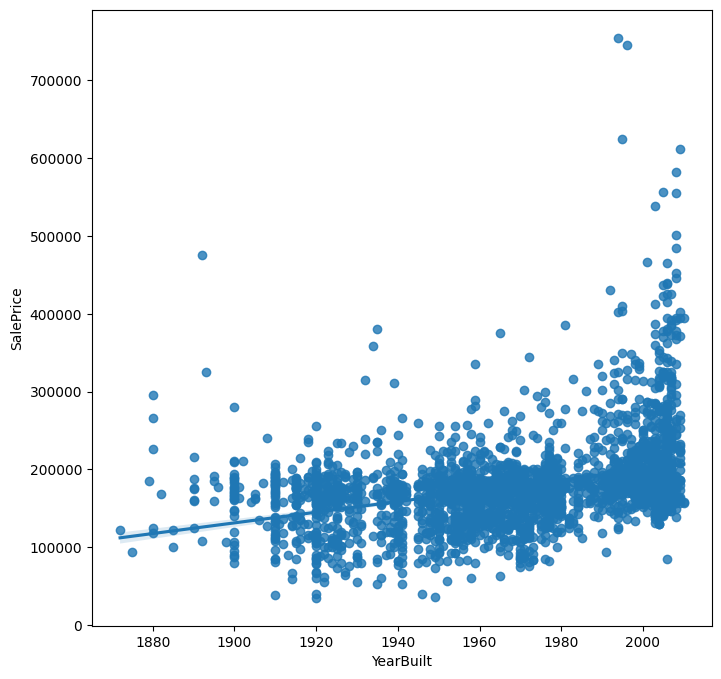

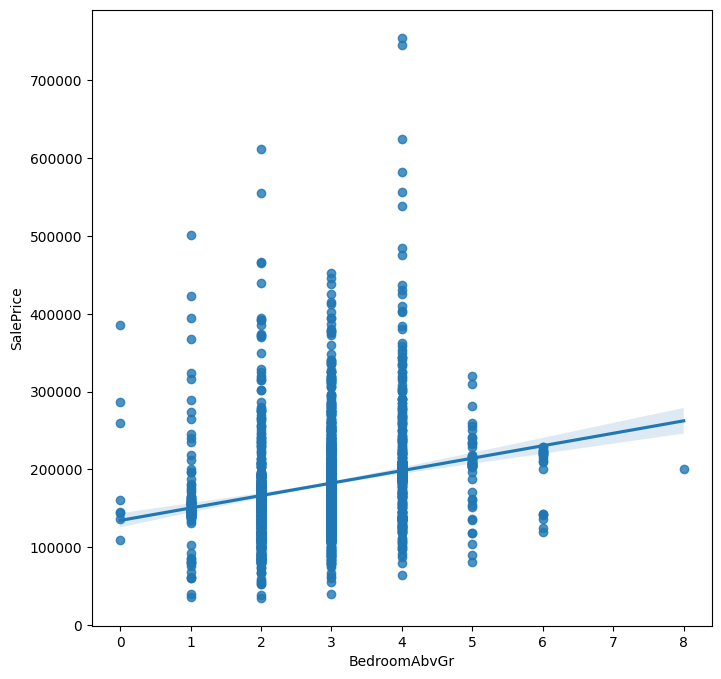

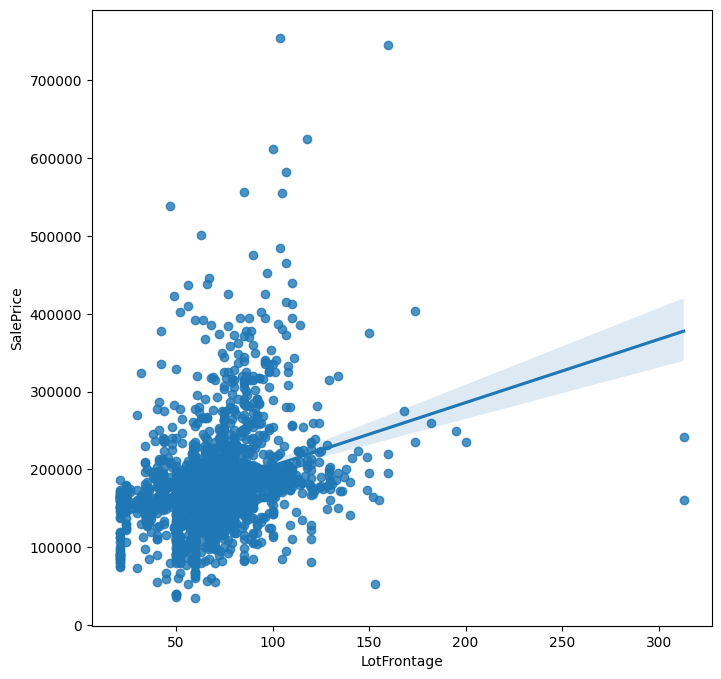

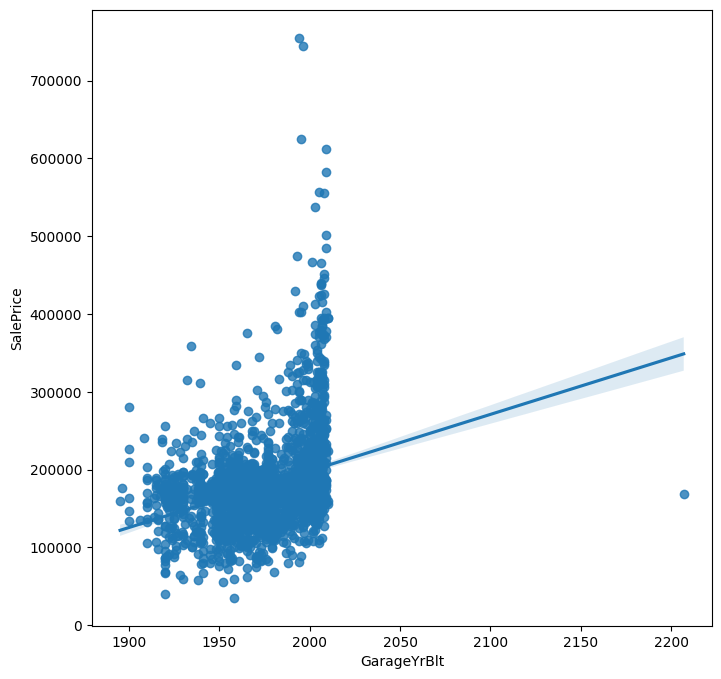

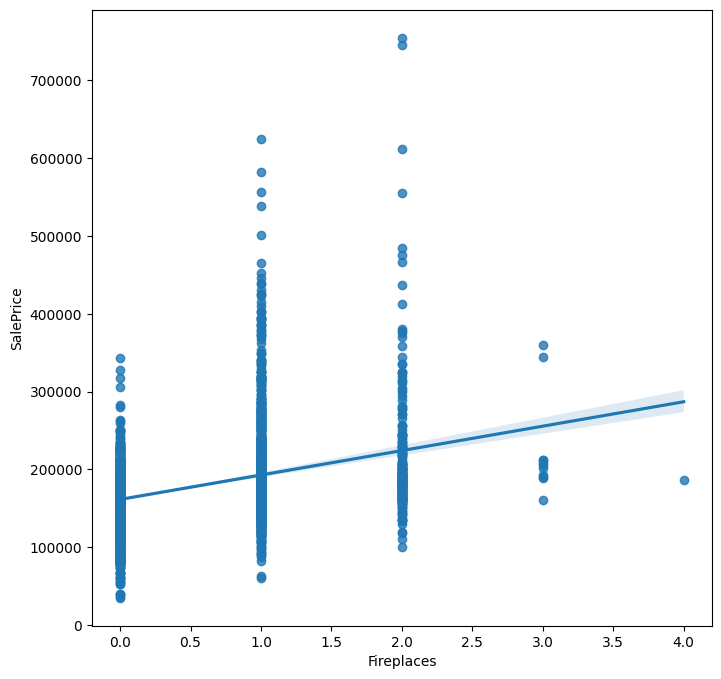

In [29]:
for house_ in housing_corr.index:
    plt.figure(figsize=(8,8))
    sns.regplot(x=housing_data[house_], y=housing_data["SalePrice"])
    
    ax = plt.gca()
    ax.set_xlabel(house_)
    ax.set_ylabel("SalePrice")
    plt.savefig("save_fig/regplot.png")


<h3>The above scatterplot contain relation between saleprice with respect to highly co-related 14 variables. most of them having linear relations ship with salesprice, It also contain numerous amount of outliers</h3>

<h1>Treating null values</h1>

In [30]:
housing_missing=pd.isnull(housing_data).sum()
housing_missing

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType       1766
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

<h3>Lets check how much percentage of missing data each column cintain</h3>

In [31]:
type(housing_missing)

pandas.core.series.Series

In [32]:
housing_missing_values = housing_missing.reset_index()
housing_missing_values.columns = ["features", "Missing_num"]

housing_missing_values["housing_missing_perc"] = (
    housing_missing_values["Missing_num"] / len(housing_data)
) * 100


In [33]:
housing_missing_values

features  Missing_num  housing_missing_perc
0              Id            0              0.000000
1      MSSubClass            0              0.000000
2        MSZoning            4              0.137033
3     LotFrontage          486             16.649538
4         LotArea            0              0.000000
5          Street            0              0.000000
6           Alley         2721             93.216855
7        LotShape            0              0.000000
8     LandContour            0              0.000000
9       Utilities            2              0.068517
10      LotConfig            0              0.000000
11      LandSlope            0              0.000000
12   Neighborhood            0              0.000000
13     Condition1            0              0.000000
14     Condition2            0              0.000000
15       BldgType            0              0.000000
16     HouseStyle            0              0.000000
17    OverallQual            0              0.000000
18    OverallCond            0              0.000000
19      YearBuilt            0              0.000000
20   YearRemodAdd            0              0.000000
21      RoofStyle            0              0.000000
22       RoofMatl            0              0.000000
23    Exterior1st            1              0.034258
24    Exterior2nd            1              0.034258
25     MasVnrType         1766             60.500171
26     MasVnrArea           23              0.787941
27      ExterQual            0              0.000000
28      ExterCond            0              0.000000
29     Foundation            0              0.000000
30       BsmtQual           81              2.774923
31       BsmtCond           82              2.809181
32   BsmtExposure           82              2.809181
33   BsmtFinType1           79              2.706406
34     BsmtFinSF1            1              0.034258
35   BsmtFinType2           80              2.740665
36     BsmtFinSF2            1              0.034258
37      BsmtUnfSF            1              0.034258
38    TotalBsmtSF            1              0.034258
39        Heating            0              0.000000
40      HeatingQC            0              0.000000
41     CentralAir            0              0.000000
42     Electrical            1              0.034258
43       1stFlrSF            0              0.000000
44       2ndFlrSF            0              0.000000
45   LowQualFinSF            0              0.000000
46      GrLivArea            0              0.000000
47   BsmtFullBath            2              0.068517
48   BsmtHalfBath            2              0.068517
49       FullBath            0              0.000000
50       HalfBath            0              0.000000
51   BedroomAbvGr            0              0.000000
52   KitchenAbvGr            0              0.000000
53    KitchenQual            1              0.034258
54   TotRmsAbvGrd            0              0.000000
55     Functional            2              0.068517
56     Fireplaces            0              0.000000
57    FireplaceQu         1420             48.646797
58     GarageType          157              5.378554
59    GarageYrBlt          159              5.447071
60   GarageFinish          159              5.447071
61     GarageCars            1              0.034258
62     GarageArea            1              0.034258
63     GarageQual          159              5.447071
64     GarageCond          159              5.447071
65     PavedDrive            0              0.000000
66     WoodDeckSF            0              0.000000
67    OpenPorchSF            0              0.000000
68  EnclosedPorch            0              0.000000
69      3SsnPorch            0              0.000000
70    ScreenPorch            0              0.000000
71       PoolArea            0              0.000000
72         PoolQC         2909             99.657417
73          Fence         2348             80.438506
74    MiscFeature         2814    

<h4>Dropping a column which have more than 80 percentage null values</h4>

In [34]:
dropping_features=housing_missing_values[housing_missing_values["housing_missing_perc"]>=80]["features"].to_list()
dropping_features

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [35]:
housing_data.drop(columns=dropping_features,inplace=True)

In [36]:
housing_data.loc[:,["LotFrontage","Utilities","MasVnrType","MasVnrArea","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","KitchenQual","BsmtFinSF2",
"BsmtUnfSF","TotalBsmtSF","Electrical","BsmtFullBath","BsmtHalfBath","KitchenQual","Functional","FireplaceQu","GarageType","GarageYrBlt","GarageFinish","GarageCars","GarageArea","GarageQual","GarageCond","SaleType"]].head()

LotFrontage Utilities MasVnrType  MasVnrArea BsmtQual BsmtCond  \
0         65.0    AllPub    BrkFace       196.0       Gd       TA   
1         80.0    AllPub        NaN         0.0       Gd       TA   
2         68.0    AllPub    BrkFace       162.0       Gd       TA   
3         60.0    AllPub        NaN         0.0       TA       Gd   
4         84.0    AllPub    BrkFace       350.0       Gd       TA   

  BsmtExposure BsmtFinType1 BsmtFinType2 KitchenQual  BsmtFinSF2  BsmtUnfSF  \
0           No          GLQ          Unf          Gd         0.0      150.0   
1           Gd          ALQ          Unf          TA         0.0      284.0   
2           Mn          GLQ          Unf          Gd         0.0      434.0   
3           No          ALQ          Unf          Gd         0.0      540.0   
4           Av          GLQ          Unf          Gd         0.0      490.0   

   TotalBsmtSF Electrical  BsmtFullBath  BsmtHalfBath KitchenQual Functional  \
0        856.0      SBrkr           1.0           0.0          Gd        Typ   
1       1262.0      SBrkr           0.0           1.0          TA        Typ   
2        920.0      SBrkr           1.0           0.0          Gd        Typ   
3        756.0      SBrkr           1.0           0.0          Gd        Typ   
4       1145.0      SBrkr           1.0           0.0          Gd        Typ   

  FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
0         NaN     Attchd       2003.0          RFn         2.0       548.0   
1          TA     Attchd       1976.0          RFn         2.0       460.0   
2          TA     Attchd       2001.0          RFn         2.0       608.0   
3          Gd     Detchd       1998.0          Unf         3.0       642.0   
4          TA     Attchd       2000.0          RFn         3.0       836.0   

  GarageQual GarageCond SaleType  
0         TA         TA       WD  
1         TA         TA       WD  
2         TA         TA       WD  
3         TA         TA       WD  
4         TA         TA       WD

In [37]:
housing_data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType       1766
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

<h3>imputation using group mean</h3>

In [38]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder,FunctionTransformer

housing_data_=housing_data.copy()   
categorical_col=housing_data_.select_dtypes(include="object").columns
numerical_col=housing_data_.select_dtypes(include="number").columns
encoding_categorical=[]
for col in categorical_col:
    col = housing_data_[col].unique().tolist()
    encoding_categorical.append(col)
encoding_categorical


[['RL', 'RM', 'C (all)', 'FV', 'RH', nan],
 ['Pave', 'Grvl'],
 ['Reg', 'IR1', 'IR2', 'IR3'],
 ['Lvl', 'Bnk', 'Low', 'HLS'],
 ['AllPub', 'NoSeWa', nan],
 ['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'],
 ['Gtl', 'Mod', 'Sev'],
 ['CollgCr',
  'Veenker',
  'Crawfor',
  'NoRidge',
  'Mitchel',
  'Somerst',
  'NWAmes',
  'OldTown',
  'BrkSide',
  'Sawyer',
  'NridgHt',
  'NAmes',
  'SawyerW',
  'IDOTRR',
  'MeadowV',
  'Edwards',
  'Timber',
  'Gilbert',
  'StoneBr',
  'ClearCr',
  'NPkVill',
  'Blmngtn',
  'BrDale',
  'SWISU',
  'Blueste'],
 ['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA', 'RRNe'],
 ['Norm', 'Artery', 'RRNn', 'Feedr', 'PosN', 'PosA', 'RRAn', 'RRAe'],
 ['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'],
 ['2Story',
  '1Story',
  '1.5Fin',
  '1.5Unf',
  'SFoyer',
  'SLvl',
  '2.5Unf',
  '2.5Fin'],
 ['Gable', 'Hip', 'Gambrel', 'Mansard', 'Flat', 'Shed'],
 ['CompShg',
  'WdShngl',
  'Metal',
  'WdShake',
  'Membran',
  'Tar&Grv',
  'Roll',
  'ClyTile'],
 ['VinylS

In [39]:
encoder_col = []

for col in categorical_col:
    encoder_col.append(housing_data_[col].unique().tolist())
    if col == "LandContour":
        break
encoder_col

[['RL', 'RM', 'C (all)', 'FV', 'RH', nan],
 ['Pave', 'Grvl'],
 ['Reg', 'IR1', 'IR2', 'IR3'],
 ['Lvl', 'Bnk', 'Low', 'HLS']]

In [40]:
encoder_col[2:]

[['Reg', 'IR1', 'IR2', 'IR3'], ['Lvl', 'Bnk', 'Low', 'HLS']]

[['RL', 'RM', 'C (all)', 'FV', 'RH', nan], it is onehot encoder,
['Pave', 'Grvl'], binary use LabfelEncoder
['Pave', 'Grvl'], have order use ordinalEncoder
 ['Lvl', 'Bnk', 'Low', 'HLS']] ordinal

In [41]:
ordinal_encoderPipeline = Pipeline(steps=[("ord",OrdinalEncoder(categories=encoder_col[1:],handle_unknown="use_encoded_value", unknown_value=-1,)),
                                             ("round",FunctionTransformer(np.round))])

transform=ColumnTransformer(transformers=[("Ordinal",ordinal_encoderPipeline,["Street","LotShape","LandContour"]),
                                         ],
                               remainder="passthrough")
                                       
pipeline_imputate = Pipeline(steps=[
    ("transform", transform),
    ("impute", IterativeImputer()),
    ("round_all", FunctionTransformer(np.round)) 
])

result = pipeline_imputate.fit_transform(
    housing_data_.loc[:, ['Street', 'LotShape', 'LandContour',
        'MSSubClass', 'LotFrontage', 'LotArea']]
)
result

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, 6.0000e+01, 6.5000e+01,
        8.4500e+03],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+01, 8.0000e+01,
        9.6000e+03],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, 6.0000e+01, 6.8000e+01,
        1.1250e+04],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+01, 1.6000e+02,
        2.0000e+04],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, 8.5000e+01, 6.2000e+01,
        1.0441e+04],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, 6.0000e+01, 7.4000e+01,
        9.6270e+03]], shape=(2919, 6))

In [42]:
cols = ['Street', 'LotShape', 'LandContour',
        'MSSubClass', 'LotFrontage', 'LotArea']

result_df = pd.DataFrame(result, columns=cols)
result_df


Street  LotShape  LandContour  MSSubClass  LotFrontage  LotArea
0        0.0       0.0          0.0        60.0         65.0   8450.0
1        0.0       0.0          0.0        20.0         80.0   9600.0
2        0.0       1.0          0.0        60.0         68.0  11250.0
3        0.0       1.0          0.0        70.0         60.0   9550.0
4        0.0       1.0          0.0        60.0         84.0  14260.0
...      ...       ...          ...         ...          ...      ...
2914     0.0       0.0          0.0       160.0         21.0   1936.0
2915     0.0       0.0          0.0       160.0         21.0   1894.0
2916     0.0       0.0          0.0        20.0        160.0  20000.0
2917     0.0       0.0          0.0        85.0         62.0  10441.0
2918     0.0       0.0          0.0        60.0         74.0   9627.0

[2919 rows x 6 columns]

In [43]:
housing_data["LotFrontage"]=result_df["LotFrontage"]


In [44]:
housing_data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage         0
LotArea             0
Street              0
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType       1766
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

<h4>imputate the LotFrontAge with IterativeImputer used 'Street', 'LotShape', 'LandContour',
        'MSSubClass', 'LotFrontage', 'LotArea' as the imputing column,these are the column which have related to LotFrontAge</h4>

In [45]:
housing_data["MSZoning"].fillna(value=housing_data["MSZoning"].mode()[0],inplace=True)

C:\Users\prasa\AppData\Local\Temp\ipykernel_18100\1410160720.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing_data["MSZoning"].fillna(value=housing_data["MSZoning"].mode()[0],inplace=True)


In [46]:
housing_data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType       1766
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [47]:
housing_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd        NaN         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng        NaN         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ       706.0   
1     CBlock       Gd       TA           Gd          ALQ       978.0   
2      PConc       Gd       TA           Mn          GLQ       486.0   
3     BrkTil       TA       Gd           No          ALQ       216.0   
4      PConc       Gd       TA           Av          GLQ       655.0   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf         0.0      150.0        856.0    GasA        Ex   
1          Unf         0.0      284.0       1262.0    GasA        Ex   
2          Unf         0.0      434.0        920.0    GasA        Ex   
3          Unf         0.0      540.0        756.0    GasA        Gd   
4          Unf         0.0      490.0       1145.0    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0           1.0           0.0         2         1             3             1   
1           0.0           1.0         2         0             3             1   
2           1.0           0.0         2         1             3             1   
3           1.0           0.0         1         0             3             1   
4           1.0           0.0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          Gd             8        Typ           0         NaN     Attchd   
1          TA             6        Typ           1          TA     Attchd   
2          Gd             6        Typ           1          TA     Attchd   
3  

<h3>Imputaion using simple imputer in categorical column</h3>

In [48]:
categorical_col=housing_data_.select_dtypes(include="object").columns
cat_to_impute=[cat for cat in categorical_col if housing_data[cat].isnull().any()==True]

In [49]:
cat_to_impute

['Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'SaleType']

In [50]:
from sklearn.impute import SimpleImputer
sple_imputer = SimpleImputer(strategy='most_frequent')
impute=sple_imputer.fit_transform(housing_data[cat_to_impute])
housing_data[cat_to_impute]=impute


In [51]:
housing_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage        0
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea        23
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         1
BsmtFinType2       0
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath 

<h3>Imputation using group by </h3>

In [52]:
housing_data["MasVnrArea"]=housing_data["MasVnrArea"].fillna(housing_data.groupby("MasVnrType")["MasVnrArea"].transform(lambda x:x.mean()))


In [53]:
housing=housing_data.groupby("GarageType")["GarageYrBlt"].transform(lambda x:x.mean())
housing_data["GarageYrBlt"]=housing_data["GarageYrBlt"].fillna(housing)

<h3>dropping the rows having 1 or 2 missing values</h3>

In [54]:
cols_to_drop_rows = [
    "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF",
    "BsmtFullBath", "BsmtHalfBath", "GarageCars", "GarageArea"
]

housing_data = housing_data.dropna(subset=cols_to_drop_rows)


In [55]:
housing_data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

<h1>Outlier detection</h1>

In [56]:
housing_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd    BrkFace         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng    BrkFace         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ       706.0   
1     CBlock       Gd       TA           Gd          ALQ       978.0   
2      PConc       Gd       TA           Mn          GLQ       486.0   
3     BrkTil       TA       Gd           No          ALQ       216.0   
4      PConc       Gd       TA           Av          GLQ       655.0   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf         0.0      150.0        856.0    GasA        Ex   
1          Unf         0.0      284.0       1262.0    GasA        Ex   
2          Unf         0.0      434.0        920.0    GasA        Ex   
3          Unf         0.0      540.0        756.0    GasA        Gd   
4          Unf         0.0      490.0       1145.0    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0           1.0           0.0         2         1             3             1   
1           0.0           1.0         2         0             3             1   
2           1.0           0.0         2         1             3             1   
3           1.0           0.0         1         0             3             1   
4           1.0           0.0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          Gd             8        Typ           0          Gd     Attchd   
1          TA             6        Typ           1          TA     Attchd   
2          Gd             6        Typ           1          TA     Attchd   
3  

In [57]:
from scipy.stats import chi2_contingency
categories={}
for cat in categorical_col:
   categories[cat]=list(housing_data[cat].unique())

In [58]:
categories.items()

dict_items([('MSZoning', ['RL', 'RM', 'C (all)', 'FV', 'RH']), ('Street', ['Pave', 'Grvl']), ('LotShape', ['Reg', 'IR1', 'IR2', 'IR3']), ('LandContour', ['Lvl', 'Bnk', 'Low', 'HLS']), ('Utilities', ['AllPub', 'NoSeWa']), ('LotConfig', ['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3']), ('LandSlope', ['Gtl', 'Mod', 'Sev']), ('Neighborhood', ['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst', 'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes', 'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert', 'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU', 'Blueste']), ('Condition1', ['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA', 'RRNe']), ('Condition2', ['Norm', 'Artery', 'RRNn', 'Feedr', 'PosN', 'PosA', 'RRAn', 'RRAe']), ('BldgType', ['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs']), ('HouseStyle', ['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf', '2.5Fin']), ('RoofStyle', ['Gable', 'Hip', 'Gambrel', 'Mansard', 'Fl

In [59]:
from scipy.stats import f_oneway


In [60]:
anova_results={}
significant=[]
for key,values in categories.items():
      groups=[housing_data[housing_data[key]==val]["SalePrice"].values for val in values]
      f_stat, p_val = f_oneway(*groups)
      anova_results[key] = p_val
      if p_val < 0.05:
        significant.append(key)


In [61]:
for st,value1 in anova_results.items():
 print(f"column name:{st.ljust(40,"-")}, value:{value1}")
print(f"significant:{significant}")

column name:MSZoning--------------------------------, value:5.989679574772861e-41
column name:Street----------------------------------, value:0.08483497094362157
column name:LotShape--------------------------------, value:1.892054009791619e-30
column name:LandContour-----------------------------, value:3.7042128484323226e-07
column name:Utilities-------------------------------, value:0.45861416774070385
column name:LotConfig-------------------------------, value:6.636343417272451e-09
column name:LandSlope-------------------------------, value:0.15970163200018558
column name:Neighborhood----------------------------, value:2.839275302913972e-191
column name:Condition1------------------------------, value:4.040118122510457e-07
column name:Condition2------------------------------, value:0.05862956152875374
column name:BldgType--------------------------------, value:5.086901844118599e-13
column name:HouseStyle------------------------------, value:1.004357665466796e-31
column name:RoofStyle-

<h2>sorting the most correlatd numerical features from spearmanr test and significant categorical feature from anova test</h2>

In [62]:
housing_corr_numerical=list(housing_corr.index)
columns_sorted=housing_data.columns[housing_data.columns.isin (housing_corr_numerical+significant+["SalePrice"])]

In [63]:
columns_sorted

Index(['MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'LandContour',
       'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'OverallQual', 'YearBuilt', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       'GrLivArea', 'FullBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

<h2>Outlier detection</h2>

<h3>Univariate outlier detection</h3>
<h5>Methods</h5>


<ul><h5>univariate</h5>
    <li>Zscore</li>
</ul>

<ul><h5>multivariate</h5> 
    <li>isolation_forest</li>
    <li>cook's method</li>
</ul>


In [64]:
housing_data.head

<bound method NDFrame.head of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0        1          60       RL         65.0     8450   Pave      Reg   
1        2          20       RL         80.0     9600   Pave      Reg   
2        3          60       RL         68.0    11250   Pave      IR1   
3        4          70       RL         60.0     9550   Pave      IR1   
4        5          60       RL         84.0    14260   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
1454  2915         160       RM         62.0     1936   Pave      Reg   
1455  2916         160       RM         62.0     1894   Pave      Reg   
1456  2917          20       RL         85.0    20000   Pave      Reg   
1457  2918          85       RL         66.0    10441   Pave      Reg   
1458  2919          60       RL         68.0     9627   Pave      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl   

In [65]:
from scipy.stats import zscore
for numerical_column in housing_corr_numerical:
    val=zscore(housing_data[numerical_column].values)
    outlier= (val>-3) & (val<3)
    housing_data_cleaned= housing_data[outlier][columns_sorted]

In [66]:
housing_data_cleaned

MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
0          RL         65.0     8450      Reg         Lvl    Inside   
1          RL         80.0     9600      Reg         Lvl       FR2   
2          RL         68.0    11250      IR1         Lvl    Inside   
3          RL         60.0     9550      IR1         Lvl    Corner   
4          RL         84.0    14260      IR1         Lvl       FR2   
...       ...          ...      ...      ...         ...       ...   
1454       RM         62.0     1936      Reg         Lvl    Inside   
1455       RM         62.0     1894      Reg         Lvl    Inside   
1456       RL         85.0    20000      Reg         Lvl    Inside   
1457       RL         66.0    10441      Reg         Lvl    Inside   
1458       RL         68.0     9627      Reg         Lvl    Inside   

     Neighborhood Condition1 BldgType HouseStyle  OverallQual  YearBuilt  \
0         CollgCr       Norm     1Fam     2Story            7       2003   
1         Veenker      Feedr     1Fam     1Story            6       1976   
2         CollgCr       Norm     1Fam     2Story            7       2001   
3         Crawfor       Norm     1Fam     2Story            7       1915   
4         NoRidge       Norm     1Fam     2Story            8       2000   
...           ...        ...      ...        ...          ...        ...   
1454      MeadowV       Norm    Twnhs     2Story            4       1970   
1455      MeadowV       Norm   TwnhsE     2Story            4       1970   
1456      Mitchel       Norm     1Fam     1Story            5       1960   
1457      Mitchel       Norm     1Fam     SFoyer            5       1992   
1458      Mitchel       Norm     1Fam     2Story            7       1993   

     RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
0        Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd   
1        Gable  CompShg     MetalSd     MetalSd    BrkFace        TA   
2        Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd   
3        Gable  CompShg     Wd Sdng     Wd Shng    BrkFace        TA   
4        Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd   
...        ...      ...         ...         ...        ...       ...   
1454     Gable  CompShg     CemntBd     CmentBd    BrkFace        TA   
1455     Gable  CompShg     CemntBd     CmentBd    BrkFace        TA   
1456     Gable  CompShg     VinylSd     VinylSd    BrkFace        TA   
1457     Gable  CompShg     HdBoard     Wd Shng    BrkFace        TA   
1458     Gable  CompShg     HdBoard     HdBoard    BrkFace        TA   

     ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0           TA      PConc       Gd       TA           No          GLQ   
1           TA     CBlock       Gd       TA           Gd          ALQ   
2           TA      PConc       Gd       TA           Mn          GLQ   
3           TA     BrkTil       TA       Gd           No          ALQ   
4           TA      PConc       Gd       TA           Av          GLQ   
...        ...        ...      ...      ...          ...          ...   
1454        TA     CBlock       TA       TA           No          Unf   
1455        TA     CBlock       TA       TA           No          Rec   
1456        TA     CBlock       TA       TA           No          ALQ   
1457        TA      PConc       Gd       TA           Av          GLQ   
1458        TA      PConc       Gd       TA           Av          LwQ   

      TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  \
0           856.0    GasA        Ex          Y      SBrkr       856   
1          1262.0    GasA        Ex          Y      SBrkr      1262   
2           920.0    GasA        Ex          Y      SBrkr       920   
3           756.0    GasA        Gd          Y      SBrkr       961   
4          1145.0    GasA        Ex          Y      SBrkr      1145   
...           ...     ...       ...        ...        ...       ...   
1454        

In [67]:
housing_corr_numerical

['GrLivArea',
 'TotRmsAbvGrd',
 'OverallQual',
 'FullBath',
 'GarageCars',
 'LotArea',
 'GarageArea',
 '1stFlrSF',
 'TotalBsmtSF',
 'YearBuilt',
 'BedroomAbvGr',
 'LotFrontage',
 'GarageYrBlt',
 'Fireplaces']

<h5>using cooks distance</h5>

In [68]:
import statsmodels.api as sm
X = sm.add_constant(housing_data_cleaned[housing_corr_numerical])
y = housing_data_cleaned["SalePrice"] 
model = sm.OLS(y, X).fit()

In [69]:
influence=model.get_influence()

In [70]:
cooks,p_val=influence.cooks_distance

In [71]:
cooks_threshold=4/len(housing_data_cleaned)

In [72]:
cooks_graph=[cooks_threshold for cook in range(len(cooks))]

fig, ax = plt.subplots(figsize=(12, 12))
ax.plot(cooks_graph,"-r",label="cooks_threshold")
ax.plot(cooks,label="row cooks distance")
ax.set_xlabel("rows number")
ax.set_ylabel("cooks_distance")
ax.legend("best")

In [73]:
housing_data_cleaned=housing_data_cleaned[cooks<cooks_threshold]

In [74]:
housing_data_cleaned

MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
0          RL         65.0     8450      Reg         Lvl    Inside   
1          RL         80.0     9600      Reg         Lvl       FR2   
2          RL         68.0    11250      IR1         Lvl    Inside   
3          RL         60.0     9550      IR1         Lvl    Corner   
4          RL         84.0    14260      IR1         Lvl       FR2   
...       ...          ...      ...      ...         ...       ...   
1454       RM         62.0     1936      Reg         Lvl    Inside   
1455       RM         62.0     1894      Reg         Lvl    Inside   
1456       RL         85.0    20000      Reg         Lvl    Inside   
1457       RL         66.0    10441      Reg         Lvl    Inside   
1458       RL         68.0     9627      Reg         Lvl    Inside   

     Neighborhood Condition1 BldgType HouseStyle  OverallQual  YearBuilt  \
0         CollgCr       Norm     1Fam     2Story            7       2003   
1         Veenker      Feedr     1Fam     1Story            6       1976   
2         CollgCr       Norm     1Fam     2Story            7       2001   
3         Crawfor       Norm     1Fam     2Story            7       1915   
4         NoRidge       Norm     1Fam     2Story            8       2000   
...           ...        ...      ...        ...          ...        ...   
1454      MeadowV       Norm    Twnhs     2Story            4       1970   
1455      MeadowV       Norm   TwnhsE     2Story            4       1970   
1456      Mitchel       Norm     1Fam     1Story            5       1960   
1457      Mitchel       Norm     1Fam     SFoyer            5       1992   
1458      Mitchel       Norm     1Fam     2Story            7       1993   

     RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
0        Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd   
1        Gable  CompShg     MetalSd     MetalSd    BrkFace        TA   
2        Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd   
3        Gable  CompShg     Wd Sdng     Wd Shng    BrkFace        TA   
4        Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd   
...        ...      ...         ...         ...        ...       ...   
1454     Gable  CompShg     CemntBd     CmentBd    BrkFace        TA   
1455     Gable  CompShg     CemntBd     CmentBd    BrkFace        TA   
1456     Gable  CompShg     VinylSd     VinylSd    BrkFace        TA   
1457     Gable  CompShg     HdBoard     Wd Shng    BrkFace        TA   
1458     Gable  CompShg     HdBoard     HdBoard    BrkFace        TA   

     ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0           TA      PConc       Gd       TA           No          GLQ   
1           TA     CBlock       Gd       TA           Gd          ALQ   
2           TA      PConc       Gd       TA           Mn          GLQ   
3           TA     BrkTil       TA       Gd           No          ALQ   
4           TA      PConc       Gd       TA           Av          GLQ   
...        ...        ...      ...      ...          ...          ...   
1454        TA     CBlock       TA       TA           No          Unf   
1455        TA     CBlock       TA       TA           No          Rec   
1456        TA     CBlock       TA       TA           No          ALQ   
1457        TA      PConc       Gd       TA           Av          GLQ   
1458        TA      PConc       Gd       TA           Av          LwQ   

      TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  \
0           856.0    GasA        Ex          Y      SBrkr       856   
1          1262.0    GasA        Ex          Y      SBrkr      1262   
2           920.0    GasA        Ex          Y      SBrkr       920   
3           756.0    GasA        Gd          Y      SBrkr       961   
4          1145.0    GasA        Ex          Y      SBrkr      1145   
...           ...     ...       ...        ...        ...       ...   
1454        

<h5>using isolation_forest</h5>

In [75]:
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(contamination=0.01,random_state=42)
isol=iso_forest.fit_predict(housing_data_cleaned[housing_corr_numerical])

In [76]:
(isol==1).sum()

np.int64(2706)

In [77]:
housing_data_cleaned=housing_data_cleaned[(isol==1)]

In [78]:
housing_data_cleaned.head()

MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig Neighborhood  \
0       RL         65.0     8450      Reg         Lvl    Inside      CollgCr   
1       RL         80.0     9600      Reg         Lvl       FR2      Veenker   
2       RL         68.0    11250      IR1         Lvl    Inside      CollgCr   
3       RL         60.0     9550      IR1         Lvl    Corner      Crawfor   
4       RL         84.0    14260      IR1         Lvl       FR2      NoRidge   

  Condition1 BldgType HouseStyle  OverallQual  YearBuilt RoofStyle RoofMatl  \
0       Norm     1Fam     2Story            7       2003     Gable  CompShg   
1      Feedr     1Fam     1Story            6       1976     Gable  CompShg   
2       Norm     1Fam     2Story            7       2001     Gable  CompShg   
3       Norm     1Fam     2Story            7       1915     Gable  CompShg   
4       Norm     1Fam     2Story            8       2000     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd    BrkFace        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng    BrkFace        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1  TotalBsmtSF Heating HeatingQC  \
0       TA           No          GLQ        856.0    GasA        Ex   
1       TA           Gd          ALQ       1262.0    GasA        Ex   
2       TA           Mn          GLQ        920.0    GasA        Ex   
3       Gd           No          ALQ        756.0    GasA        Gd   
4       TA           Av          GLQ       1145.0    GasA        Ex   

  CentralAir Electrical  1stFlrSF  GrLivArea  FullBath  BedroomAbvGr  \
0          Y      SBrkr       856       1710         2             3   
1          Y      SBrkr      1262       1262         2             3   
2          Y      SBrkr       920       1786         2             3   
3          Y      SBrkr       961       1717         1             3   
4          Y      SBrkr      1145       2198         2             4   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          Gd             8        Typ           0          Gd     Attchd   
1          TA             6        Typ           1          TA     Attchd   
2          Gd             6        Typ           1          TA     Attchd   
3          Gd             7        Typ           1          Gd     Detchd   
4          Gd             9        Typ           1          TA     Attchd   

   GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond  \
0       2003.0          RFn         2.0       548.0         TA         TA   
1       1976.0          RFn         2.0       460.0         TA         TA   
2       2001.0          RFn         2.0       608.0         TA         TA   
3       1998.0          Unf         3.0       642.0         TA         TA   
4       2000.0          RFn         3.0       836.0         TA         TA   

  PavedDrive SaleType SaleCondition  SalePrice  
0          Y       WD        Normal   208500.0  
1          Y       WD        Normal   181500.0  
2          Y       WD        Normal   223500.0  
3          Y       WD       Abnorml   140000.0  
4          Y       WD        Normal   250000.0

<h3>Transforming asymmtric columns</h3>

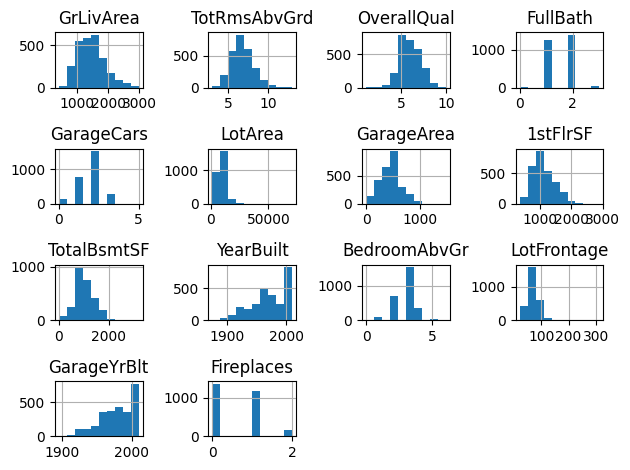

In [79]:
housing_data_cleaned.hist(housing_corr_numerical)
plt.tight_layout()
plt.show()

<h5>Lets check the skewness</h5>

In [80]:
from scipy.stats import skew
housing_data_cleaned[housing_corr_numerical].skew()

GrLivArea       0.611960
TotRmsAbvGrd    0.574463
OverallQual     0.110909
FullBath        0.027015
GarageCars     -0.255043
LotArea         2.791061
GarageArea      0.098756
1stFlrSF        0.693624
TotalBsmtSF     0.200204
YearBuilt      -0.550371
BedroomAbvGr    0.140418
LotFrontage     1.431680
GarageYrBlt    -0.671426
Fireplaces      0.598721
dtype: float64

<h5>LotArea have the value greater than 1 so it should be transformed ........    value= 1.355363</h5>

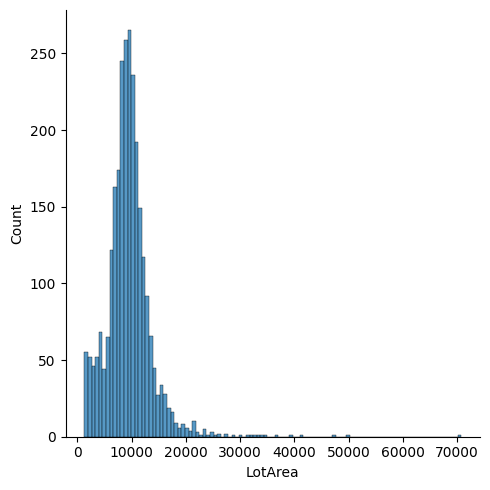

In [81]:
sns.displot(housing_data_cleaned["LotArea"])

<h5> as you can see the graph is leftscrewed to make it symmetrical can be do log transformation</h5>

In [82]:
from sklearn.preprocessing import FunctionTransformer
lotArea_log = FunctionTransformer(np.log1p, inverse_func=np.expm1)

housing_data_cleaned["lotArea_log"] = lotArea_log.transform(
    housing_data_cleaned[["LotArea"]]
)


C:\Users\prasa\AppData\Local\Temp\ipykernel_18100\1834393358.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_data_cleaned["lotArea_log"] = lotArea_log.transform(


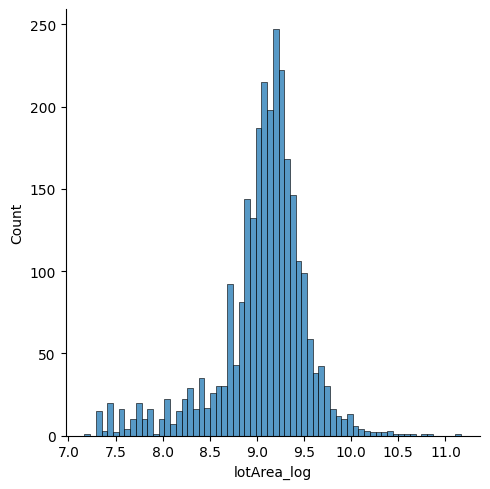

In [83]:
sns.displot(housing_data_cleaned["lotArea_log"])

In [84]:
housing_data_cleaned["lotArea_log"].skew()

np.float64(-1.1083052036743462)

<h5> it doesnt change skewness much so trying with sqrt transformation</h5>

In [85]:
housing_data_cleaned=housing_data_cleaned.copy()
lotArea_sqrt = FunctionTransformer(
    np.sqrt,
    inverse_func=lambda x: x**2,
    validate=False
)

housing_data_cleaned["lotArea_sqrt"] = lotArea_sqrt.transform(
    housing_data_cleaned[["LotArea"]]
)


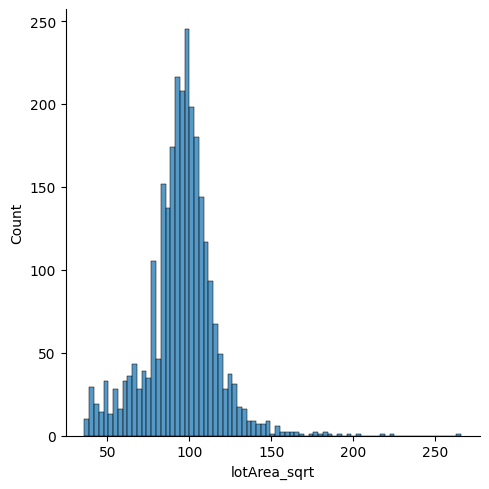

In [86]:
sns.displot(housing_data_cleaned["lotArea_sqrt"])

In [87]:
housing_data_cleaned["lotArea_sqrt"].skew()

np.float64(0.34239926449092845)

<h4>sqrt transformation having skewness -0.12696331252999124 which less than 0.5, inserting the housing_data_cleaned with loatArea_sqrt column and dropping the LotArea column </h4>

In [88]:
housing_data_cleaned.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'LandContour',
       'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'OverallQual', 'YearBuilt', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       'GrLivArea', 'FullBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition', 'SalePrice', 'lotArea_log',
       'lotArea_sqrt'],
      dtype='object')

In [89]:
housing_data_cleaned.drop(columns=['lotArea_log','LotArea'],inplace=True)
housing_data_cleaned.shape

(2706, 49)

<h2>Encoding the categorical columns</h2>

In [90]:
significant #categorical columns

['MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [91]:
housing_data_cleaned[significant].head()

MSZoning LotShape LandContour LotConfig Neighborhood Condition1 BldgType  \
0       RL      Reg         Lvl    Inside      CollgCr       Norm     1Fam   
1       RL      Reg         Lvl       FR2      Veenker      Feedr     1Fam   
2       RL      IR1         Lvl    Inside      CollgCr       Norm     1Fam   
3       RL      IR1         Lvl    Corner      Crawfor       Norm     1Fam   
4       RL      IR1         Lvl       FR2      NoRidge       Norm     1Fam   

  HouseStyle RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
0     2Story     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd   
1     1Story     Gable  CompShg     MetalSd     MetalSd    BrkFace        TA   
2     2Story     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd   
3     2Story     Gable  CompShg     Wd Sdng     Wd Shng    BrkFace        TA   
4     2Story     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd   

  ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 Heating  \
0        TA      PConc       Gd       TA           No          GLQ    GasA   
1        TA     CBlock       Gd       TA           Gd          ALQ    GasA   
2        TA      PConc       Gd       TA           Mn          GLQ    GasA   
3        TA     BrkTil       TA       Gd           No          ALQ    GasA   
4        TA      PConc       Gd       TA           Av          GLQ    GasA   

  HeatingQC CentralAir Electrical KitchenQual Functional FireplaceQu  \
0        Ex          Y      SBrkr          Gd        Typ          Gd   
1        Ex          Y      SBrkr          TA        Typ          TA   
2        Ex          Y      SBrkr          Gd        Typ          TA   
3        Gd          Y      SBrkr          Gd        Typ          Gd   
4        Ex          Y      SBrkr          Gd        Typ          TA   

  GarageType GarageFinish GarageQual GarageCond PavedDrive SaleType  \
0     Attchd          RFn         TA         TA          Y       WD   
1     Attchd          RFn         TA         TA          Y       WD   
2     Attchd          RFn         TA         TA          Y       WD   
3     Detchd          Unf         TA         TA          Y       WD   
4     Attchd          RFn         TA         TA          Y       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal

In [92]:
housing_data_numerical=housing_data_cleaned.select_dtypes(include="number").columns

In [93]:
housing_data_numerical

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice', 'lotArea_sqrt'],
      dtype='object')

<!-- <h3>ordinal_encoding_features=[ExterQual
ExterCond
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
HeatingQC
KitchenQual
FireplaceQu
GarageFinish
GarageQual
GarageCond
PavedDrive
Functional]</h3>
<H3>==============</H3>
<H3> and doing the category encoding for</H3>
<h3>OnehotEncoding_feature=[
    'MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
    'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
    'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
    'CentralAir', 'Electrical', 'GarageType', 'SaleType', 'SaleCondition'
]</h3> -->

In [94]:
from sklearn.preprocessing import OneHotEncoder
ordinal_cols = [
    'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
    'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
    'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond',
    'PavedDrive', 'Functional'
]
onehot_cols = [
    'MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
    'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
    'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
    'CentralAir', 'Electrical', 'GarageType', 'SaleType', 'SaleCondition'
]


cat_list=[housing_data_cleaned[ord].unique() for ord in ordinal_cols]
OrdPipeline = Pipeline(steps=[
    ("ord", OrdinalEncoder(categories=cat_list, handle_unknown='use_encoded_value', unknown_value=-1))
])
hot_list=[housing_data_cleaned[onehot].unique() for onehot in onehot_cols]
OnehotPipeline = Pipeline(steps=[
    ("onehot", OneHotEncoder(categories=hot_list,handle_unknown="ignore",sparse_output=False))
])
transform=ColumnTransformer(transformers=[("ordinal",OrdPipeline,ordinal_cols),
                                         ("onehotenc",OnehotPipeline,onehot_cols)])
enc_pipeline = Pipeline(steps=[("transf", transform)])
encoded_val=enc_pipeline.fit_transform(housing_data_cleaned)
encoded_val

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], shape=(2706, 165))

In [95]:
onehot_feature_names = (
    enc_pipeline.named_steps["transf"])
onehot_feature_names.named_transformers_["onehotenc"]

Pipeline(steps=[('onehot',
                 OneHotEncoder(categories=[array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object),
                                           array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object),
                                           array(['Lvl', 'Bnk', 'HLS', 'Low'], dtype=object),
                                           array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object),
                                           array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSid...
                                           array(['Y', 'N'], dtype=object),
                                           array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix'], dtype=object),
                                           array(['Attchd', 'Detchd', 'CarPort', 'BuiltIn', 'Basment', '2Types'],
      dtype=object),
                                           array(['WD', 'New', 'COD', 'ConLI', 'CWD', 'ConLw', 'ConLD', 'Con', 'Oth'],
      dtype=object),
                                           array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)],
                               handle_unknown='ignore', sparse_output=False))])

In [96]:
features_onehot=onehot_feature_names.named_transformers_["onehotenc"].named_steps["onehot"].get_feature_names_out(onehot_cols)


In [97]:
all_feature_list=list(features_onehot)+ordinal_cols

In [98]:
all_feature_list

['MSZoning_RL',
 'MSZoning_RM',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'LotShape_Reg',
 'LotShape_IR1',
 'LotShape_IR2',
 'LotShape_IR3',
 'LandContour_Lvl',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Low',
 'LotConfig_Inside',
 'LotConfig_FR2',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR3',
 'Neighborhood_CollgCr',
 'Neighborhood_Veenker',
 'Neighborhood_Crawfor',
 'Neighborhood_NoRidge',
 'Neighborhood_Mitchel',
 'Neighborhood_Somerst',
 'Neighborhood_NWAmes',
 'Neighborhood_OldTown',
 'Neighborhood_BrkSide',
 'Neighborhood_Sawyer',
 'Neighborhood_NAmes',
 'Neighborhood_SawyerW',
 'Neighborhood_NridgHt',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Edwards',
 'Neighborhood_Timber',
 'Neighborhood_Gilbert',
 'Neighborhood_ClearCr',
 'Neighborhood_NPkVill',
 'Neighborhood_StoneBr',
 'Neighborhood_Blmngtn',
 'Neighborhood_BrDale',
 'Neighborhood_SWISU',
 'Neighborhood_Blueste',
 'Condition1_Norm',
 'Condition1_Feedr',
 'Conditio

In [99]:
housing_data_enc=pd.DataFrame(encoded_val,columns=all_feature_list)

<h3>droping the first feature from onehot encoder</h3>

In [100]:
remove_list=['MSZoning_RL','LotShape_Reg','LandContour_Lvl','LotConfig_Inside','Neighborhood_CollgCr','Condition1_Norm','BldgType_1Fam','HouseStyle_2Story','RoofStyle_Gable','Exterior1st_VinylSd','MasVnrType_BrkFace','Foundation_PConc','Heating_GasA','CentralAir_Y','Electrical_SBrkr','GarageType_Attchd','SaleType_WD','SaleCondition_Normal','RoofMatl_CompShg','Neighborhood_Veenker','SaleType_New']
all_feature1_list = [feat for feat in all_feature_list if feat not in remove_list]

housing_data_final_enc=housing_data_enc[all_feature1_list].copy()
housing_data_final_enc

MSZoning_RM  MSZoning_C (all)  MSZoning_FV  MSZoning_RH  LotShape_IR1  \
0             0.0               0.0          0.0          0.0           0.0   
1             0.0               0.0          0.0          1.0           0.0   
2             0.0               0.0          0.0          2.0           0.0   
3             0.0               1.0          1.0          0.0           1.0   
4             0.0               0.0          0.0          3.0           0.0   
...           ...               ...          ...          ...           ...   
2701          0.0               1.0          0.0          0.0           1.0   
2702          0.0               1.0          0.0          0.0           2.0   
2703          0.0               1.0          0.0          0.0           0.0   
2704          0.0               0.0          0.0          3.0           2.0   
2705          0.0               0.0          0.0          3.0           0.0   

      LotShape_IR2  LotShape_IR3  LandContour_Bnk  LandContour_HLS  \
0              0.0           0.0              0.0              0.0   
1              1.0           1.0              0.0              0.0   
2              0.0           1.0              0.0              0.0   
3              0.0           0.0              0.0              0.0   
4              0.0           1.0              0.0              0.0   
...            ...           ...              ...              ...   
2701           1.0           0.0              0.0              0.0   
2702           1.0           0.0              0.0              0.0   
2703           1.0           1.0              0.0              0.0   
2704           1.0           0.0              0.0              0.0   
2705           1.0           1.0              0.0              0.0   

      LandContour_Low  LotConfig_FR2  LotConfig_Corner  LotConfig_CulDSac  \
0                 0.0            1.0               0.0                0.0   
1                 0.0            1.0               0.0                0.0   
2                 0.0            1.0               0.0                0.0   
3                 0.0            1.0               0.0                0.0   
4                 0.0            1.0               0.0                0.0   
...               ...            ...               ...                ...   
2701              0.0            0.0               1.0                0.0   
2702              0.0            0.0               1.0                0.0   
2703              0.0            1.0               0.0                0.0   
2704              0.0            1.0               0.0                0.0   
2705              0.0            1.0               0.0                0.0   

      LotConfig_FR3  Neighborhood_Crawfor  Neighborhood_NoRidge  \
0               0.0                   0.0                   0.0   
1               0.0                   0.0                   0.0   
2               0.0                   1.0                   0.0   
3               0.0                   1.0                   0.0   
4               0.0                   1.0                   0.0   
...             ...                   ...                   ...   
2701            0.0                   0.0                   0.0   
2702            0.0                   0.0                   0.0   
2703            0.0                   0.0                   0.0   
2704            0.0                   0.0                   0.0   
2705            0.0                   0.0                   0.0   

      Neighborhood_Mitchel  Neighborhood_Somerst  Neighborhood_NWAmes  \
0                      0.0                   1.0                  0.0   
1                      0.0                   1.0                  0.0   
2                      0.0                   1.0                  0.0   
3                      0.0                   1.0                  0.0   
4                      0.0                   1.0                  0.0   
...                    ...                   ...

In [101]:
housing_data_final_enc.columns

Index(['MSZoning_RM', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH',
       'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LandContour_Bnk',
       'LandContour_HLS', 'LandContour_Low',
       ...
       'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
       'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'Functional'],
      dtype='object', length=144)

In [102]:
housing_data_final=housing_data_cleaned[housing_data_numerical].merge(housing_data_final_enc,left_index=True,right_index=True)

In [103]:
housing_data_final.head()

LotFrontage  OverallQual  YearBuilt  TotalBsmtSF  1stFlrSF  GrLivArea  \
0         65.0            7       2003        856.0       856       1710   
1         80.0            6       1976       1262.0      1262       1262   
2         68.0            7       2001        920.0       920       1786   
3         60.0            7       1915        756.0       961       1717   
4         84.0            8       2000       1145.0      1145       2198   

   FullBath  BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
0         2             3             8           0       2003.0         2.0   
1         2             3             6           1       1976.0         2.0   
2         2             3             6           1       2001.0         2.0   
3         1             3             7           1       1998.0         3.0   
4         2             4             9           1       2000.0         3.0   

   GarageArea  SalePrice  lotArea_sqrt  MSZoning_RM  MSZoning_C (all)  \
0       548.0   208500.0     91.923882          0.0               0.0   
1       460.0   181500.0     97.979590          0.0               0.0   
2       608.0   223500.0    106.066017          0.0               0.0   
3       642.0   140000.0     97.724101          0.0               1.0   
4       836.0   250000.0    119.415242          0.0               0.0   

   MSZoning_FV  MSZoning_RH  LotShape_IR1  LotShape_IR2  LotShape_IR3  \
0          0.0          0.0           0.0           0.0           0.0   
1          0.0          1.0           0.0           1.0           1.0   
2          0.0          2.0           0.0           0.0           1.0   
3          1.0          0.0           1.0           0.0           0.0   
4          0.0          3.0           0.0           0.0           1.0   

   LandContour_Bnk  LandContour_HLS  LandContour_Low  LotConfig_FR2  \
0              0.0              0.0              0.0            1.0   
1              0.0              0.0              0.0            1.0   
2              0.0              0.0              0.0            1.0   
3              0.0              0.0              0.0            1.0   
4              0.0              0.0              0.0            1.0   

   LotConfig_Corner  LotConfig_CulDSac  LotConfig_FR3  Neighborhood_Crawfor  \
0               0.0                0.0            0.0                   0.0   
1               0.0                0.0            0.0                   0.0   
2               0.0                0.0            0.0                   1.0   
3               0.0                0.0            0.0                   1.0   
4               0.0                0.0            0.0                   1.0   

   Neighborhood_NoRidge  Neighborhood_Mitchel  Neighborhood_Somerst  \
0                   0.0                   0.0                   1.0   
1                   0.0                   0.0                   1.0   
2                   0.0                   0.0                   1.0   
3                   0.0                   0.0                   1.0   
4                   0.0                   0.0                   1.0   

   Neighborhood_NWAmes  Neighborhood_OldTown  Neighborhood_BrkSide  \
0                  0.0                   0.0                   0.0   
1                  0.0                   0.0                   0.0   
2                  0.0                   0.0                   0.0   
3                  0.0                   0.0                   0.0   
4                  0.0                   0.0                   0.0   

   Neighborhood_Sawyer  Neighborhood_NAmes  Neighborhood_SawyerW  \
0                  1.0                 0.0                   0.0   
1                  0.0                 1.0                   0.0   
2                  1.0                 0.0                   0.0   
3                  0.0                 0.0                   1.0   
4                  0.0                 1.0                   0.0   

   Neighborhood_NridgHt  Nei

<h2>Splitting data</h2>

In [104]:
import re
housing_data_final.columns=housing_data_final.columns.str.replace("1stFlrSF","firstFlrSF")
housing_data_final.columns

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', 'firstFlrSF',
       'GrLivArea', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       ...
       'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
       'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'Functional'],
      dtype='object', length=159)

In [105]:
from sklearn.model_selection import train_test_split
def splitting_data(x,y):
  x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)
  return x_train, x_test, y_train, y_test


<h3>import statsmodels.formula.api as smf,do  not need categorical encoder</h3>

In [106]:
# import statsmodels.formula.api as smf


# ordinal_cols = [
#     'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
#     'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
#     'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond',
#     'PavedDrive', 'Functional'
# ]

# onehot_cols = [
#     'MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
#     'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
#     'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
#     'CentralAir', 'Electrical', 'GarageType', 'SaleType', 'SaleCondition'
# ]
# allcols=ordinal_cols+onehot_cols
# colum_for_sm = "+".join(f"C({col})" for col in allcols) + "+" + " + ".join([f"{col}" for col in housing_columns_numerical])
# colum_for_sm

In [107]:
# model=smf.ols(formula=f"SalePrice~{colum_for_sm}",data=training_set).fit()

In [108]:
# model.summary()

<h3>Finding variance inflation factor</h3>

In [109]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif(x_values):
    return pd.DataFrame([variance_inflation_factor(x_values.values,i) for i in range(x_values.shape[1])],index=x_values.columns,columns=["VIF"])

<h3>Finding the p value from the model</h3>

In [140]:
def create_pvalue_dataframe(model,x):
    return pd.DataFrame(round(model.pvalues,3),index=x.columns,columns=["pvalue"])

<h3>Merging VIF and P</h3>

In [111]:
def create_dataframe(data1,data2):
    return data1.merge(data2,right_index=True,left_index=True)

<h3>Using statsmodels.api finding the best model</h3>

In [112]:
import statsmodels.api as sm
x=housing_data_final.drop(columns=['SalePrice'])
y=housing_data_final['SalePrice']
x_train, x_test, y_train, y_test=splitting_data(x,y)

X=sm.add_constant(x_train)
model=sm.OLS(y_train,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     14.71
Date:                Tue, 02 Dec 2025   Prob (F-statistic):          2.25e-226
Time:                        16:16:58   Log-Likelihood:                -25248.
No. Observations:                2164   AIC:                         5.079e+04
Df Residuals:                    2016   BIC:                         5.163e+04
Df Model:                         147                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.128e+05   3.22e+04     -3.500      0.000   -1.76e+05   -4.96e+04
LotFrontage             161.6778     33.096      4.885      0.000      96.773     226.583
OverallQual            5587.1118    812.349      6.878      0.000    3993.980    7180.243
YearBuilt               259.5839     40.843      6.356      0.000     179.484     339.684
TotalBsmtSF              13.5399      2.982      4.540      0.000       7.691      19.389
firstFlrSF               -5.9883      3.497     -1.713      0.087     -12.846       0.869
GrLivArea                24.2265      3.288      7.367      0.000      17.778      30.675
FullBath                981.6808   1838.409      0.534      0.593   -2623.699    4587.061
BedroomAbvGr           2921.5433   1267.619      2.305      0.021     435.564    5407.523
TotRmsAbvGrd           1393.2901    874.455      1.593      0.111    -321.640    3108.220
Fireplaces             1568.7344   1259.440      1.246      0.213    -901.206    4038.674
GarageYrBlt            -109.8076     46.241     -2.375      0.018    -200.494     -19.122
GarageCars            -3541.4591   2175.083     -1.628      0.104   -7807.104     724.186
GarageArea               29.3502      7.651      3.836      0.000      14.346      44.355
lotArea_sqrt            264.9112     38.027      6.966      0.000     190.334     339.488
MSZoning_RM           -2230.5050   1763.795     -1.265      0.206   -5689.556    1228.546
MSZoning_C (all)       1348.8790   1214.945      1.110      0.267   -1033.800    3731.558
MSZoning_FV           -1962.4816   1790.214     -1.096      0.273   -5473.344    1548.381
MSZoning_RH             303.4399    675.203      0.449      0.653   -1020.729    1627.609
LotShape_IR1             59.9347    922.976      0.065      0.948   -1750.152    1870.021
LotShape_IR2            -46.0599   1046.642     -0.044      0.965   -2098.674    2006.554
LotShape_IR3            660.8532   1003.183      0.659      0.510   -1306.530    2628.236
LandContour_Bnk        1094.9303   2914.118      0.376      0.707   -4620.066    6809.927
LandContour_HLS         656.3355   2850.475      0.230      0.818   -4933.849    6246.520
LandContour_Low        1865.1505   1975.893      0.944      0.345   -2009.855    5740.156
LotConfig_FR2         -2796.1015   6414.365     -0.436      0.663   -1.54e+04    9783.375
LotConfig_Corner      -1339.4835   7351.712     -0.182      0.855   -1.58e+04    1.31e+04
LotConfig_CulDSac     -9155.9809   1.22e+04     -0.749      0.454   -3.31e+04    1.48e+04
LotConfig_FR3         -9243.5603   9321.602     -0.992      0.321   -2.75e+04    9037.418
Neighborhood_Crawfor    517.9962   1636.795      0.316      0.752   -2691.990    3727.982
Neighborhood_NoRidge   7603.1381   4734.214      1.606      0.108   -1681.325    1.69e+04
Neighborhood_Mitchel  -

In [113]:
data1=vif(X)
data2=create_pvalue_dataframe(model,x_train)
model_pvalue=create_dataframe(data1,data2)
model_pvalue

C:\users\prasa\onedrive\desktop\projects\ML_models\Linear_Regression_kaggle\venv\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\users\prasa\onedrive\desktop\projects\ML_models\Linear_Regression_kaggle\venv\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\users\prasa\onedrive\desktop\projects\ML_models\Linear_Regression_kaggle\venv\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


VIF        pvalue
LotFrontage             1.243997  1.114764e-06
OverallQual             2.808630  8.084828e-12
YearBuilt               3.735635  2.560387e-10
TotalBsmtSF             3.326488  5.953656e-06
firstFlrSF              3.542978  8.695638e-02
GrLivArea               4.784103  2.524060e-13
FullBath                2.365362  5.934115e-01
BedroomAbvGr            2.336785  2.128179e-02
TotRmsAbvGrd            3.797352  1.112442e-01
Fireplaces              1.466315  2.130630e-01
GarageYrBlt             3.181855  1.765842e-02
GarageCars              6.326249  1.036398e-01
GarageArea              5.864310  1.287947e-04
lotArea_sqrt            1.576035  4.387312e-12
MSZoning_RM             1.423959  2.061589e-01
MSZoning_C (all)        1.854111  2.670285e-01
MSZoning_FV             1.320936  2.731102e-01
MSZoning_RH             1.429611  6.531876e-01
LotShape_IR1            1.964445  9.482311e-01
LotShape_IR2            1.447761  9.649030e-01
LotShape_IR3            1.240921  5.101274e-01
LandContour_Bnk         1.898528  7.071549e-01
LandContour_HLS         1.931986  8.179172e-01
LandContour_Low         1.451300  3.453066e-01
LotConfig_FR2          17.632182  6.629469e-01
LotConfig_Corner       17.704939  8.554439e-01
LotConfig_CulDSac       2.082076  4.537887e-01
LotConfig_FR3           9.590988  3.214981e-01
Neighborhood_Crawfor    1.498615  7.516787e-01
Neighborhood_NoRidge    1.229079  1.084310e-01
Neighborhood_Mitchel    1.221033  8.210319e-01
Neighborhood_Somerst         inf  1.301576e-03
Neighborhood_NWAmes          inf  3.083620e-04
Neighborhood_OldTown         inf  2.326064e-03
Neighborhood_BrkSide         inf  2.126486e-03
Neighborhood_Sawyer          inf  1.131235e-03
Neighborhood_NAmes           inf  4.222510e-03
Neighborhood_SawyerW         inf  1.401215e-03
Neighborhood_NridgHt         inf  6.471083e-03
Neighborhood_IDOTRR          inf  8.875640e-02
Neighborhood_MeadowV    3.442048  3.560060e-01
Neighborhood_Edwards    1.287926  7.149983e-01
Neighborhood_Timber     2.027370  6.574101e-01
Neighborhood_Gilbert    1.620137  9.063148e-01
Neighborhood_ClearCr    1.846640  8.257735e-01
Neighborhood_NPkVill    6.681743  4.859110e-02
Neighborhood_StoneBr    2.471014  9.668567e-01
Neighborhood_Blmngtn    6.106638  3.923818e-01
Neighborhood_BrDale     3.501345  1.469257e-01
Neighborhood_SWISU      2.312218  4.130666e-01
Neighborhood_Blueste    5.415462  6.205905e-01
Condition1_Feedr        2.302012  7.675903e-01
Condition1_PosN         3.084742  8.907207e-01
Condition1_Artery       2.322633  2.541565e-01
Condition1_RRAe         3.201892  6.457949e-01
Condition1_RRNn         1.725083  2.845246e-01
Condition1_RRAn         2.483984  1.983969e-01
Condition1_PosA         1.840711  2.726049e-01
Condition1_RRNe         3.300070  3.081227e-01
BldgType_2fmCon         1.597212  7.436876e-01
BldgType_Duplex         2.336150  3.167612e-01
BldgType_TwnhsE         1.870945  2.888330e-02
BldgType_Twnhs          1.170948  8.525834e-01
HouseStyle_1Story       1.269496  8.762528e-01
HouseStyle_1.5Fin       1.183343  5.062581e-01
HouseStyle_1.5Unf       1.307774  3.103771e-02
HouseStyle_SFoyer       1.128689  8.788168e-01
HouseStyle_SLvl         1.202179  5.045045e-02
HouseStyle_2.5Unf       1.224095  3.193023e-02
HouseStyle_2.5Fin       1.114069  5.221484e-01
RoofStyle_Hip                inf  1.318196e-03
RoofStyle_Gambrel            inf  4.502784e-02
RoofStyle_Mansard            inf  1.143350e-04
RoofStyle_Flat               inf  1.660836e-04
RoofStyle_Shed               inf  1.309078e-02
RoofMatl_Metal          2.230214  3.316984e-01
RoofMatl_WdShake        2.095313  7.401433e-01
RoofMatl_Membran        1.207655  3.122252e-02
RoofMatl_Tar&Grv        1.429304  2.098153e-01
RoofMatl_WdShngl        1.553802  6.171928e-01
RoofMatl_Roll           1.420941  6.983686e-01
Exterior1st_MetalSd          inf  6.508646e-04
Exterior1st_Wd Sdng          inf  2.171549e-04
Exterior1st_HdBoard          inf  3.602342e-02
Exterior1st_BrkFace          inf  

In [121]:
mask=(model_pvalue["VIF"]>5) & (model_pvalue["pvalue"]>0.05)
model_pvalue.loc[mask,:]

VIF    pvalue
GarageCars              6.326249  0.103640
LotConfig_FR2          17.632182  0.662947
LotConfig_Corner       17.704939  0.855444
LotConfig_FR3           9.590988  0.321498
Neighborhood_Sawyer   116.367335  0.992324
Neighborhood_NAmes     19.724330  0.935225
Neighborhood_SawyerW   87.317776  0.983204
Neighborhood_NridgHt   34.760934  0.844515
Neighborhood_Blmngtn    6.106638  0.392382
Neighborhood_Blueste    5.415462  0.620591
Exterior1st_BrkFace          inf  0.618085
Exterior1st_Plywood          inf  0.495384
Exterior1st_AsbShng          inf  0.189925
Exterior1st_Stucco           inf  0.806297
Exterior1st_WdShing          inf  0.061550
Exterior1st_BrkComm          inf  0.092196
Exterior1st_Stone            inf  0.571158
Exterior1st_ImStucc          inf  0.417462
Exterior1st_CBlock           inf  0.592629
Exterior2nd_VinylSd          inf  0.281642
Exterior2nd_MetalSd          inf  0.244013
Exterior2nd_Wd Shng          inf  0.058506
Exterior2nd_HdBoard          inf  0.051347
Exterior2nd_Plywood          inf  0.315778
Exterior2nd_Wd Sdng          inf  0.973823
Exterior2nd_BrkFace          inf  0.581178
Exterior2nd_Stucco           inf  0.456440
Exterior2nd_AsbShng          inf  0.217881
Exterior2nd_Brk Cmn          inf  0.625002
Exterior2nd_ImStucc          inf  0.558339
Exterior2nd_AsphShn          inf  0.731354
Exterior2nd_Other            inf  0.937526
Exterior2nd_Stone      37.389719  0.827850
Exterior2nd_CBlock     22.494828  0.864761
MasVnrType_Stone        9.684050  0.460445
MasVnrType_BrkCmn       5.015149  0.320185
Foundation_CBlock      84.453039  0.990279
Foundation_Slab         7.746939  0.972150
Heating_OthW                 inf  0.937526
GarageType_Detchd      34.942627  0.216616
GarageType_CarPort     18.148446  0.142587
GarageType_BuiltIn      9.643975  0.197577
GarageType_Basment      9.157391  0.072517
SaleType_Con                 inf  0.881416
ExterQual                    inf  0.809762
BsmtQual                     inf  0.897383
BsmtCond                     inf  0.580878
BsmtExposure                 inf  0.272099
HeatingQC                    inf  0.284362
KitchenQual                  inf  0.628824
GarageCond                   inf  0.307253
PavedDrive                   inf  0.516360
Functional                   inf  0.112748

In [116]:
[col for col in x.columns if "_IDOTRR" in col]

['Neighborhood_IDOTRR']

<h3>dropping Neighborhood_IDOTRR from x_train </h3>

In [119]:
x1=x.drop(columns=['Neighborhood_IDOTRR'])
x1_train, x1_test, y1_train, y1_test=splitting_data(x1,y)
X1=sm.add_constant(x1_train)
model1=sm.OLS(y1_train,X1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     14.71
Date:                Tue, 02 Dec 2025   Prob (F-statistic):          2.25e-226
Time:                        16:20:20   Log-Likelihood:                -25248.
No. Observations:                2164   AIC:                         5.079e+04
Df Residuals:                    2016   BIC:                         5.163e+04
Df Model:                         147                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.128e+05   3.22e+04     -3.500      0.000   -1.76e+05   -4.96e+04
LotFrontage             161.6778     33.096      4.885      0.000      96.773     226.583
OverallQual            5587.1118    812.349      6.878      0.000    3993.980    7180.243
YearBuilt               259.5839     40.843      6.356      0.000     179.484     339.684
TotalBsmtSF              13.5399      2.982      4.540      0.000       7.691      19.389
firstFlrSF               -5.9883      3.497     -1.713      0.087     -12.846       0.869
GrLivArea                24.2265      3.288      7.367      0.000      17.778      30.675
FullBath                981.6808   1838.409      0.534      0.593   -2623.699    4587.061
BedroomAbvGr           2921.5433   1267.619      2.305      0.021     435.564    5407.523
TotRmsAbvGrd           1393.2901    874.455      1.593      0.111    -321.640    3108.220
Fireplaces             1568.7344   1259.440      1.246      0.213    -901.206    4038.674
GarageYrBlt            -109.8076     46.241     -2.375      0.018    -200.494     -19.122
GarageCars            -3541.4591   2175.083     -1.628      0.104   -7807.104     724.186
GarageArea               29.3502      7.651      3.836      0.000      14.346      44.355
lotArea_sqrt            264.9112     38.027      6.966      0.000     190.334     339.488
MSZoning_RM           -2230.5050   1763.795     -1.265      0.206   -5689.556    1228.546
MSZoning_C (all)       1348.8790   1214.945      1.110      0.267   -1033.800    3731.558
MSZoning_FV           -1962.4816   1790.214     -1.096      0.273   -5473.344    1548.381
MSZoning_RH             303.4399    675.203      0.449      0.653   -1020.729    1627.609
LotShape_IR1             59.9347    922.976      0.065      0.948   -1750.152    1870.021
LotShape_IR2            -46.0599   1046.642     -0.044      0.965   -2098.674    2006.554
LotShape_IR3            660.8532   1003.183      0.659      0.510   -1306.530    2628.236
LandContour_Bnk        1094.9303   2914.118      0.376      0.707   -4620.066    6809.927
LandContour_HLS         656.3355   2850.475      0.230      0.818   -4933.849    6246.520
LandContour_Low        1865.1505   1975.893      0.944      0.345   -2009.855    5740.156
LotConfig_FR2         -2796.1015   6414.365     -0.436      0.663   -1.54e+04    9783.375
LotConfig_Corner      -1339.4835   7351.712     -0.182      0.855   -1.58e+04    1.31e+04
LotConfig_CulDSac     -9155.9809   1.22e+04     -0.749      0.454   -3.31e+04    1.48e+04
LotConfig_FR3         -9243.5603   9321.602     -0.992      0.321   -2.75e+04    9037.418
Neighborhood_Crawfor    517.9962   1636.795      0.316      0.752   -2691.990    3727.982
Neighborhood_NoRidge   7603.1381   4734.214      1.606      0.108   -1681.325    1.69e+04
Neighborhood_Mitchel  -

In [122]:
data1=vif(X1)
data2=create_pvalue_dataframe(model1,x1_train)
model1_pvalue=create_dataframe(data1,data2)
model1_pvalue


C:\users\prasa\onedrive\desktop\projects\ML_models\Linear_Regression_kaggle\venv\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\users\prasa\onedrive\desktop\projects\ML_models\Linear_Regression_kaggle\venv\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\users\prasa\onedrive\desktop\projects\ML_models\Linear_Regression_kaggle\venv\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


VIF        pvalue
LotFrontage              1.243997  1.114764e-06
OverallQual              2.808630  8.084828e-12
YearBuilt                3.735635  2.560387e-10
TotalBsmtSF              3.326488  5.953656e-06
firstFlrSF               3.542978  8.695638e-02
GrLivArea                4.784103  2.524060e-13
FullBath                 2.365362  5.934115e-01
BedroomAbvGr             2.336785  2.128179e-02
TotRmsAbvGrd             3.797352  1.112442e-01
Fireplaces               1.466315  2.130630e-01
GarageYrBlt              3.181855  1.765842e-02
GarageCars               6.326249  1.036398e-01
GarageArea               5.864310  1.287947e-04
lotArea_sqrt             1.576035  4.387312e-12
MSZoning_RM              1.423959  2.061589e-01
MSZoning_C (all)         1.854111  2.670285e-01
MSZoning_FV              1.320936  2.731102e-01
MSZoning_RH              1.429611  6.531876e-01
LotShape_IR1             1.964445  9.482311e-01
LotShape_IR2             1.447761  9.649030e-01
LotShape_IR3             1.240921  5.101274e-01
LandContour_Bnk          1.898528  7.071549e-01
LandContour_HLS          1.931986  8.179172e-01
LandContour_Low          1.451300  3.453066e-01
LotConfig_FR2           17.632182  6.629469e-01
LotConfig_Corner        17.704939  8.554439e-01
LotConfig_CulDSac        2.082076  4.537887e-01
LotConfig_FR3            9.590988  3.214981e-01
Neighborhood_Crawfor     1.498615  7.516787e-01
Neighborhood_NoRidge     1.229079  1.084310e-01
Neighborhood_Mitchel     1.221033  8.210319e-01
Neighborhood_Somerst          inf  1.297718e-03
Neighborhood_NWAmes           inf  3.294925e-04
Neighborhood_OldTown          inf  2.122181e-03
Neighborhood_BrkSide          inf  1.924639e-03
Neighborhood_Sawyer    116.367335  9.923238e-01
Neighborhood_NAmes      19.724330  9.352250e-01
Neighborhood_SawyerW    87.317776  9.832041e-01
Neighborhood_NridgHt    34.760934  8.445147e-01
Neighborhood_MeadowV     3.442048  3.560060e-01
Neighborhood_Edwards     1.287926  7.149983e-01
Neighborhood_Timber      2.027370  6.574101e-01
Neighborhood_Gilbert     1.620137  9.063148e-01
Neighborhood_ClearCr     1.846640  8.257735e-01
Neighborhood_NPkVill     6.681743  4.859110e-02
Neighborhood_StoneBr     2.471014  9.668567e-01
Neighborhood_Blmngtn     6.106638  3.923818e-01
Neighborhood_BrDale      3.501345  1.469257e-01
Neighborhood_SWISU       2.312218  4.130666e-01
Neighborhood_Blueste     5.415462  6.205905e-01
Condition1_Feedr         2.302012  7.675903e-01
Condition1_PosN          3.084742  8.907207e-01
Condition1_Artery        2.322633  2.541565e-01
Condition1_RRAe          3.201892  6.457949e-01
Condition1_RRNn          1.725083  2.845246e-01
Condition1_RRAn          2.483984  1.983969e-01
Condition1_PosA          1.840711  2.726049e-01
Condition1_RRNe          3.300070  3.081227e-01
BldgType_2fmCon          1.597212  7.436876e-01
BldgType_Duplex          2.336150  3.167612e-01
BldgType_TwnhsE          1.870945  2.888330e-02
BldgType_Twnhs           1.170948  8.525834e-01
HouseStyle_1Story        1.269496  8.762528e-01
HouseStyle_1.5Fin        1.183343  5.062581e-01
HouseStyle_1.5Unf        1.307774  3.103771e-02
HouseStyle_SFoyer        1.128689  8.788168e-01
HouseStyle_SLvl          1.202179  5.045045e-02
HouseStyle_2.5Unf        1.224095  3.193023e-02
HouseStyle_2.5Fin        1.114069  5.221484e-01
RoofStyle_Hip                 inf  1.280081e-03
RoofStyle_Gambrel             inf  3.431743e-02
RoofStyle_Mansard             inf  1.189422e-04
RoofStyle_Flat                inf  1.825611e-04
RoofStyle_Shed                inf  1.058283e-02
RoofMatl_Metal           2.230214  3.316984e-01
RoofMatl_WdShake         2.095313  7.401433e-01
RoofMatl_Membran         1.207655  3.122252e-02
RoofMatl_Tar&Grv         1.429304  2.098153e-01
RoofMatl_WdShngl         1.553802  6.171928e-01
RoofMatl_Roll            1.420941  6.983686e-01
Exterior1st_MetalSd           inf  5.442167e-04
Exterior1st_Wd Sdng           inf  1.840521e-04
Exterior1st_HdBoard           inf  2.787505e-0

In [123]:
mask=(model1_pvalue["VIF"]>5) & (model_pvalue["pvalue"]>0.05)
model_pvalue.loc[mask,:]

VIF    pvalue
GarageCars              6.326249  0.103640
LotConfig_FR2          17.632182  0.662947
LotConfig_Corner       17.704939  0.855444
LotConfig_FR3           9.590988  0.321498
Neighborhood_Sawyer   116.367335  0.992324
Neighborhood_NAmes     19.724330  0.935225
Neighborhood_SawyerW   87.317776  0.983204
Neighborhood_NridgHt   34.760934  0.844515
Neighborhood_Blmngtn    6.106638  0.392382
Neighborhood_Blueste    5.415462  0.620591
Exterior1st_BrkFace          inf  0.618085
Exterior1st_Plywood          inf  0.495384
Exterior1st_AsbShng          inf  0.189925
Exterior1st_Stucco           inf  0.806297
Exterior1st_WdShing          inf  0.061550
Exterior1st_BrkComm          inf  0.092196
Exterior1st_Stone            inf  0.571158
Exterior1st_ImStucc          inf  0.417462
Exterior1st_CBlock           inf  0.592629
Exterior2nd_VinylSd          inf  0.281642
Exterior2nd_MetalSd          inf  0.244013
Exterior2nd_Wd Shng          inf  0.058506
Exterior2nd_HdBoard          inf  0.051347
Exterior2nd_Plywood          inf  0.315778
Exterior2nd_Wd Sdng          inf  0.973823
Exterior2nd_BrkFace          inf  0.581178
Exterior2nd_Stucco           inf  0.456440
Exterior2nd_AsbShng          inf  0.217881
Exterior2nd_Brk Cmn          inf  0.625002
Exterior2nd_ImStucc          inf  0.558339
Exterior2nd_AsphShn          inf  0.731354
Exterior2nd_Other            inf  0.937526
Exterior2nd_Stone      37.389719  0.827850
Exterior2nd_CBlock     22.494828  0.864761
MasVnrType_Stone        9.684050  0.460445
MasVnrType_BrkCmn       5.015149  0.320185
Foundation_CBlock      84.453039  0.990279
Foundation_Slab         7.746939  0.972150
Heating_OthW                 inf  0.937526
GarageType_Detchd      34.942627  0.216616
GarageType_CarPort     18.148446  0.142587
GarageType_BuiltIn      9.643975  0.197577
GarageType_Basment      9.157391  0.072517
SaleType_Con                 inf  0.881416
ExterQual                    inf  0.809762
BsmtQual                     inf  0.897383
BsmtCond                     inf  0.580878
BsmtExposure                 inf  0.272099
HeatingQC                    inf  0.284362
KitchenQual                  inf  0.628824
GarageCond                   inf  0.307253
PavedDrive                   inf  0.516360
Functional                   inf  0.112748

In [135]:
vif_inf_list=model1_pvalue[model1_pvalue["VIF"]==np.inf].index

In [136]:
infinity_list=[col for col in vif_inf_list if col in x1.columns]

In [137]:
x2=x1.drop(columns=infinity_list)
x2_train, x2_test, y2_train, y2_test=splitting_data(x2,y)
X2=sm.add_constant(x2_train)
model2=sm.OLS(y2_train,X2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     21.62
Date:                Tue, 02 Dec 2025   Prob (F-statistic):          4.41e-249
Time:                        16:37:39   Log-Likelihood:                -25267.
No. Observations:                2164   AIC:                         5.073e+04
Df Residuals:                    2064   BIC:                         5.130e+04
Df Model:                          99                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.893e+05   7.97e+04     -3.629      0.000   -4.46e+05   -1.33e+05
LotFrontage             168.6245     32.475      5.192      0.000     104.936     232.312
OverallQual            5481.5090    799.509      6.856      0.000    3913.581    7049.436
YearBuilt               258.9880     40.375      6.415      0.000     179.807     338.169
TotalBsmtSF              13.7702      2.943      4.678      0.000       7.998      19.542
firstFlrSF               -6.2942      3.432     -1.834      0.067     -13.024       0.436
GrLivArea                24.3597      3.243      7.511      0.000      17.999      30.720
FullBath               1512.2621   1818.606      0.832      0.406   -2054.231    5078.755
BedroomAbvGr           2722.4254   1245.772      2.185      0.029     279.325    5165.526
TotRmsAbvGrd           1345.3904    864.466      1.556      0.120    -349.926    3040.706
Fireplaces             1644.1408   1241.430      1.324      0.186    -790.444    4078.726
GarageYrBlt            -117.1253     45.784     -2.558      0.011    -206.913     -27.337
GarageCars            -3104.6778   2135.018     -1.454      0.146   -7291.691    1082.336
GarageArea               27.9939      7.515      3.725      0.000      13.256      42.732
lotArea_sqrt            266.4752     37.554      7.096      0.000     192.827     340.124
MSZoning_RM           -1377.6542   1638.442     -0.841      0.401   -4590.826    1835.518
MSZoning_C (all)       1445.3665   1164.099      1.242      0.215    -837.565    3728.298
MSZoning_FV           -1843.1820   1723.160     -1.070      0.285   -5222.496    1536.132
MSZoning_RH             331.8796    655.433      0.506      0.613    -953.500    1617.259
LotShape_IR1            207.2499    890.656      0.233      0.816   -1539.428    1953.928
LotShape_IR2           -508.1089   1023.148     -0.497      0.620   -2514.619    1498.401
LotShape_IR3            694.0667    971.653      0.714      0.475   -1211.455    2599.589
LandContour_Bnk        1761.2670   2830.443      0.622      0.534   -3789.555    7312.089
LandContour_HLS         618.7709   2769.642      0.223      0.823   -4812.812    6050.354
LandContour_Low        2402.8985   1902.697      1.263      0.207   -1328.507    6134.304
LotConfig_FR2         -2863.8386   6261.847     -0.457      0.647   -1.51e+04    9416.357
LotConfig_Corner      -3635.3798   7074.365     -0.514      0.607   -1.75e+04    1.02e+04
LotConfig_CulDSac     -6981.7635   1.16e+04     -0.604      0.546   -2.96e+04    1.57e+04
LotConfig_FR3         -8656.5762   9032.083     -0.958      0.338   -2.64e+04    9056.369
Neighborhood_Crawfor   -215.8342   1598.011     -0.135      0.893   -3349.715    2918.047
Neighborhood_NoRidge   6163.8624   4633.084      1.330      0.184   -2922.144    1.52e+04
Neighborhood_Mitchel  -

In [143]:
data1=vif(X2)
data2=create_pvalue_dataframe(model2,x2_train)
model1_pvalue=create_dataframe(data1,data2)
model1_pvalue.sort_values("VIF",ascending=False)

C:\users\prasa\onedrive\desktop\projects\ML_models\Linear_Regression_kaggle\venv\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


VIF  pvalue
Neighborhood_Sawyer    115.035838   0.918
Neighborhood_SawyerW    86.281444   0.895
GarageType_Detchd       34.541203   0.199
Neighborhood_NridgHt    34.345063   0.783
Neighborhood_NAmes      19.463846   0.886
GarageType_CarPort      17.868572   0.127
LotConfig_FR2           16.906354   0.647
LotConfig_Corner        16.494483   0.607
GarageType_BuiltIn       9.483618   0.161
LotConfig_FR3            9.059505   0.338
GarageType_Basment       8.867478   0.074
Neighborhood_NPkVill     6.204119   0.061
GarageCars               6.132591   0.146
GarageArea               5.692478   0.000
Neighborhood_Blmngtn     4.978484   0.154
GrLivArea                4.682679   0.000
Neighborhood_Blueste     4.676043   0.391
TotRmsAbvGrd             3.733774   0.120
YearBuilt                3.672800   0.000
firstFlrSF               3.433466   0.067
Exterior2nd_Stone        3.314335   0.263
TotalBsmtSF              3.260016   0.000
Neighborhood_MeadowV     3.138560   0.225
GarageYrBlt              3.138313   0.011
Neighborhood_BrDale      2.994197   0.042
Electrical_FuseF         2.889621   0.985
Condition1_RRAe          2.857183   0.448
OverallQual              2.737169   0.000
Condition1_PosN          2.617638   0.579
FullBath                 2.328825   0.406
Condition1_RRNe          2.313925   0.290
Condition1_RRAn          2.295744   0.120
BedroomAbvGr             2.270727   0.029
GarageType_2Types        2.255547   0.784
MasVnrType_Stone         2.253662   0.394
Electrical_FuseA         2.234730   0.739
Foundation_Stone         2.231499   0.430
Neighborhood_StoneBr     2.226789   0.861
Condition1_Artery        2.116965   0.382
Condition1_Feedr         2.108074   0.844
Neighborhood_SWISU       2.084751   0.256
RoofMatl_Metal           2.050778   0.616
RoofMatl_WdShake         1.973562   0.668
SaleType_Oth             1.963134   0.254
Foundation_CBlock        1.921305   0.054
LotConfig_CulDSac        1.872493   0.546
MasVnrType_BrkCmn        1.852584   0.593
BldgType_Duplex          1.843888   0.109
LotShape_IR1             1.840455   0.816
LandContour_HLS          1.835113   0.823
Exterior2nd_CBlock       1.826123   0.593
LandContour_Bnk          1.802014   0.534
SaleType_COD             1.799627   0.977
Neighborhood_Timber      1.787257   0.576
Neighborhood_ClearCr     1.728753   0.684
MSZoning_C (all)         1.712572   0.215
BldgType_TwnhsE          1.668591   0.023
SaleCondition_Partial    1.612829   0.258
Heating_Floor            1.601028   0.521
Condition1_RRNn          1.569073   0.193
Electrical_Mix           1.566778   0.316
lotArea_sqrt             1.546480   0.000
Neighborhood_Gilbert     1.520692   0.832
RoofMatl_WdShngl         1.444698   0.560
Neighborhood_Crawfor     1.437167   0.893
Fireplaces               1.433385   0.186
LotShape_IR2             1.391949   0.620
BldgType_2fmCon          1.387475   0.836
Condition1_PosA          1.357906   0.363
MSZoning_RH              1.355352   0.613
LandContour_Low          1.353991   0.207
RoofMatl_Tar&Grv         1.348989   0.320
Foundation_Wood          1.279406   0.572
HouseStyle_1.5Unf        1.257949   0.021
Neighborhood_Edwards     1.254659   0.694
RoofMatl_Roll            1.252385   0.731
Foundation_Slab          1.244684   0.804
SaleCondition_AdjLand    1.236664   0.175
MSZoning_RM              1.236261   0.401
MSZoning_FV              1.231316   0.285
SaleCondition_Abnorml    1.215883   0.643
LotFrontage              1.205136   0.000
CentralAir_N             1.204902   0.412
Foundation_BrkTil        1.198196   0.788
Neighborhood_NoRidge     1.184324   0.184
Heating_Wall             1.183139   0.392
HouseStyle_1Story        1.176881   0.919
LotShape_IR3             1.171259   0.475
RoofMatl_Membran         1.166593   0.044
HouseStyle_2.5Unf        1.160517   0.049
Electrical_FuseP         1.130194   0.873
HouseStyle_SLvl          1.118444   0.046
BldgType_Twnhs           1.109944   0.867
HouseStyle_SFoyer        1.106161   0.992
HouseStyle_1.5Fin        1.101530   0.42

<h5>VIF = 115 and 86 means this variable is almost a linear combination of other features.

That means:

It is completely redundant

It makes coefficients unstable

It increases standard error

It inflates p-values of other predictors</h5>

<h4> Removing Neighborhood_Sawyer and Neighborhood_SawyerW</h4>

In [144]:
x3=x2.drop(columns=["Neighborhood_Sawyer","Neighborhood_SawyerW"])
x3_train, x3_test, y3_train, y3_test=splitting_data(x3,y)
X3=sm.add_constant(x3_train)
model3=sm.OLS(y3_train,X3).fit()
model3.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     22.09
Date:                Tue, 02 Dec 2025   Prob (F-statistic):          2.07e-250
Time:                        19:21:38   Log-Likelihood:                -25267.
No. Observations:                2164   AIC:                         5.073e+04
Df Residuals:                    2066   BIC:                         5.129e+04
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -2.88e+05   7.86e+04     -3.663      0.000   -4.42e+05   -1.34e+05
LotFrontage             168.4541     32.422      5.196      0.000     104.872     232.037
OverallQual            5477.1979    798.975      6.855      0.000    3910.318    7044.078
YearBuilt               258.7982     40.351      6.414      0.000     179.666     337.931
TotalBsmtSF              13.7651      2.942      4.679      0.000       7.996      19.535
firstFlrSF               -6.2813      3.430     -1.832      0.067     -13.007       0.444
GrLivArea                24.3684      3.241      7.519      0.000      18.013      30.724
FullBath               1510.9028   1817.630      0.831      0.406   -2053.674    5075.480
BedroomAbvGr           2725.7296   1244.800      2.190      0.029     284.536    5166.923
TotRmsAbvGrd           1340.6805    863.881      1.552      0.121    -353.487    3034.848
Fireplaces             1638.3613   1239.774      1.321      0.186    -792.976    4069.699
GarageYrBlt            -116.5938     45.717     -2.550      0.011    -206.249     -26.939
GarageCars            -3102.2194   2133.295     -1.454      0.146   -7285.852    1081.413
GarageArea               27.9876      7.508      3.728      0.000      13.264      42.711
lotArea_sqrt            266.2905     37.529      7.096      0.000     192.691     339.890
MSZoning_RM           -1356.0484   1635.463     -0.829      0.407   -4563.376    1851.279
MSZoning_C (all)       1448.2679   1163.464      1.245      0.213    -833.416    3729.951
MSZoning_FV           -1843.0902   1722.264     -1.070      0.285   -5220.645    1534.464
MSZoning_RH             330.8294    654.014      0.506      0.613    -951.765    1613.424
LotShape_IR1            214.0506    889.906      0.241      0.810   -1531.156    1959.257
LotShape_IR2           -517.0870   1020.929     -0.506      0.613   -2519.245    1485.071
LotShape_IR3            693.2335    971.183      0.714      0.475   -1211.367    2597.834
LandContour_Bnk        1789.3062   2827.194      0.633      0.527   -3755.140    7333.753
LandContour_HLS         607.3118   2767.929      0.219      0.826   -4820.909    6035.532
LandContour_Low        2370.3676   1897.376      1.249      0.212   -1350.600    6091.336
LotConfig_FR2         -2895.3773   6257.890     -0.463      0.644   -1.52e+04    9377.051
LotConfig_Corner      -3715.6163   7064.439     -0.526      0.599   -1.76e+04    1.01e+04
LotConfig_CulDSac     -7148.5639   1.15e+04     -0.620      0.535   -2.98e+04    1.55e+04
LotConfig_FR3         -8713.3909   9025.386     -0.965      0.334   -2.64e+04    8986.410
Neighborhood_Crawfor   -170.0068   1588.901     -0.107      0.915   -3286.021    2946.008
Neighborhood_NoRidge   6244.9308   4621.450      1.351      0.177   -2818.255    1.53e+04
Neighborhood_Mitchel  -

In [145]:
data1=vif(X3)
data2=create_pvalue_dataframe(model3,x3_train)
model3_pvalue=create_dataframe(data1,data2)
model3_pvalue.sort_values("VIF",ascending=False)

C:\users\prasa\onedrive\desktop\projects\ML_models\Linear_Regression_kaggle\venv\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


VIF  pvalue
GarageType_Detchd      34.507794   0.201
GarageType_CarPort     17.856372   0.129
LotConfig_FR2          16.900710   0.644
LotConfig_Corner       16.463540   0.599
GarageType_BuiltIn      9.477652   0.163
LotConfig_FR3           9.054495   0.334
GarageType_Basment      8.857690   0.075
Neighborhood_NPkVill    6.203705   0.061
GarageCars              6.128397   0.146
GarageArea              5.686861   0.000
Neighborhood_Blmngtn    4.965176   0.150
GrLivArea               4.679408   0.000
Neighborhood_Blueste    4.661152   0.382
TotRmsAbvGrd            3.732191   0.121
YearBuilt               3.671735   0.000
firstFlrSF              3.432069   0.067
Exterior2nd_Stone       3.310085   0.267
TotalBsmtSF             3.259821   0.000
Neighborhood_MeadowV    3.137573   0.223
GarageYrBlt             3.131943   0.011
Neighborhood_BrDale     2.980596   0.040
Electrical_FuseF        2.889265   0.982
Condition1_RRAe         2.855431   0.443
OverallQual             2.736061   0.000
Condition1_PosN         2.608859   0.568
FullBath                2.328492   0.406
Condition1_RRNe         2.313696   0.291
Condition1_RRAn         2.292747   0.118
BedroomAbvGr            2.269295   0.029
GarageType_2Types       2.254163   0.780
MasVnrType_Stone        2.252883   0.396
Electrical_FuseA        2.233814   0.742
Foundation_Stone        2.230367   0.433
Neighborhood_StoneBr    2.224756   0.854
Condition1_Artery       2.114988   0.379
Neighborhood_SWISU      2.084438   0.255
Condition1_Feedr        2.075483   0.849
RoofMatl_Metal          2.045123   0.625
RoofMatl_WdShake        1.964198   0.680
SaleType_Oth            1.957806   0.258
Foundation_CBlock       1.920728   0.054
LotConfig_CulDSac       1.867499   0.535
MasVnrType_BrkCmn       1.852172   0.596
BldgType_Duplex         1.840907   0.109
LotShape_IR1            1.839069   0.810
LandContour_HLS         1.834550   0.826
Exterior2nd_CBlock      1.819534   0.603
LandContour_Bnk         1.799552   0.527
SaleType_COD            1.798646   0.972
Neighborhood_Timber     1.786505   0.580
Neighborhood_ClearCr    1.725788   0.675
MSZoning_C (all)        1.712294   0.213
BldgType_TwnhsE         1.668409   0.023
SaleCondition_Partial   1.610533   0.258
Heating_Floor           1.597237   0.514
Electrical_Mix          1.565848   0.318
Condition1_RRNn         1.563462   0.198
lotArea_sqrt            1.545864   0.000
Neighborhood_Gilbert    1.518812   0.825
RoofMatl_WdShngl        1.442836   0.554
Fireplaces              1.430896   0.186
Neighborhood_Crawfor    1.422151   0.915
LotShape_IR2            1.387209   0.613
BldgType_2fmCon         1.386984   0.833
Condition1_PosA         1.357121   0.366
MSZoning_RH             1.350743   0.613
RoofMatl_Tar&Grv        1.348250   0.321
LandContour_Low         1.347682   0.212
Foundation_Wood         1.279293   0.570
Neighborhood_NridgHt    1.259818   0.383
Neighborhood_Edwards    1.254616   0.694
RoofMatl_Roll           1.252237   0.730
HouseStyle_1.5Unf       1.249503   0.022
Foundation_Slab         1.242878   0.811
SaleCondition_AdjLand   1.236114   0.172
MSZoning_RM             1.232915   0.407
MSZoning_FV             1.231180   0.285
SaleCondition_Abnorml   1.215249   0.639
CentralAir_N            1.204410   0.410
LotFrontage             1.202263   0.000
Foundation_BrkTil       1.198191   0.789
Heating_Wall            1.182338   0.388
Neighborhood_NoRidge    1.179481   0.177
LotShape_IR3            1.171216   0.475
RoofMatl_Membran        1.166457   0.043
HouseStyle_1Story       1.164937   0.940
Neighborhood_NAmes      1.164664   0.883
HouseStyle_2.5Unf       1.156644   0.047
Electrical_FuseP        1.130179   0.874
HouseStyle_SLvl         1.113883   0.048
BldgType_Twnhs          1.109776   0.866
HouseStyle_SFoyer       1.105449   0.987
HouseStyle_1.5Fin       1.101496   0.420
SaleCondition_Alloca    1.085098   0.846
Neighborhood_Mitchel    1.083324   0.557
HouseStyle_2.5Fin       1.074897   0.490
Heating_GasW            1.040553   0.552
Heating_Gra

<h5>GarageType_Detchd have high VIF value dropping it from the x3 data	</h5>

In [147]:
x4=x3.drop(columns=["GarageType_Detchd"])
x4_train, x4_test, y4_train, y4_test=splitting_data(x4,y)
X4=sm.add_constant(x4_train)
model4=sm.OLS(y4_train,X4).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     22.29
Date:                Tue, 02 Dec 2025   Prob (F-statistic):          9.57e-251
Time:                        19:28:25   Log-Likelihood:                -25268.
No. Observations:                2164   AIC:                         5.073e+04
Df Residuals:                    2067   BIC:                         5.128e+04
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.491e+05   7.25e+04     -3.434      0.001   -3.91e+05   -1.07e+05
LotFrontage             170.0119     32.404      5.247      0.000     106.465     233.559
OverallQual            5457.4361    798.949      6.831      0.000    3890.607    7024.265
YearBuilt               259.2361     40.355      6.424      0.000     180.094     338.378
TotalBsmtSF              13.7605      2.942      4.677      0.000       7.990      19.531
firstFlrSF               -6.2841      3.430     -1.832      0.067     -13.011       0.443
GrLivArea                24.4780      3.240      7.555      0.000      18.124      30.832
FullBath               1526.7519   1817.868      0.840      0.401   -2038.292    5091.796
BedroomAbvGr           2756.3003   1244.763      2.214      0.027     315.180    5197.420
TotRmsAbvGrd           1287.1931    863.003      1.492      0.136    -405.252    2979.638
Fireplaces             1635.9551   1239.964      1.319      0.187    -795.754    4067.664
GarageYrBlt            -116.9913     45.723     -2.559      0.011    -206.658     -27.324
GarageCars            -3151.6634   2133.275     -1.477      0.140   -7335.255    1031.928
GarageArea               28.0806      7.509      3.740      0.000      13.355      42.806
lotArea_sqrt            265.0066     37.522      7.063      0.000     191.422     338.591
MSZoning_RM           -1304.9044   1635.227     -0.798      0.425   -4511.769    1901.960
MSZoning_C (all)       1459.8576   1163.608      1.255      0.210    -822.109    3741.824
MSZoning_FV           -1818.2251   1722.421     -1.056      0.291   -5196.085    1559.635
MSZoning_RH             335.5885    654.104      0.513      0.608    -947.183    1618.360
LotShape_IR1            202.9427    890.001      0.228      0.820   -1542.450    1948.335
LotShape_IR2           -505.7406   1021.049     -0.495      0.620   -2508.132    1496.650
LotShape_IR3            683.5107    971.304      0.704      0.482   -1221.325    2588.346
LandContour_Bnk        2043.9314   2820.622      0.725      0.469   -3487.625    7575.488
LandContour_HLS         264.8898   2755.396      0.096      0.923   -5138.751    5668.530
LandContour_Low        2457.9347   1896.435      1.296      0.195   -1261.187    6177.056
LotConfig_FR2         -2999.6368   6258.326     -0.479      0.632   -1.53e+04    9273.643
LotConfig_Corner      -3527.9910   7064.009     -0.499      0.618   -1.74e+04    1.03e+04
LotConfig_CulDSac     -6722.8190   1.15e+04     -0.583      0.560   -2.93e+04    1.59e+04
LotConfig_FR3         -8868.1875   9025.969     -0.983      0.326   -2.66e+04    8832.752
Neighborhood_Crawfor   -254.7606   1587.766     -0.160      0.873   -3368.548    2859.027
Neighborhood_NoRidge   6173.3424   4621.825      1.336      0.182   -2890.577    1.52e+04
Neighborhood_Mitchel  -

In [148]:
data1=vif(X4)
data2=create_pvalue_dataframe(model4,x4_train)
model4_pvalue=create_dataframe(data1,data2)
model4_pvalue.sort_values("VIF",ascending=False)

C:\users\prasa\onedrive\desktop\projects\ML_models\Linear_Regression_kaggle\venv\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


VIF  pvalue
LotConfig_FR2          16.897847   0.632
LotConfig_Corner       16.456452   0.618
LotConfig_FR3           9.052869   0.326
Neighborhood_NPkVill    6.203609   0.060
GarageCars              6.126388   0.140
GarageArea              5.686328   0.000
Neighborhood_Blmngtn    4.951528   0.169
GrLivArea               4.676141   0.000
Neighborhood_Blueste    4.661149   0.382
TotRmsAbvGrd            3.723458   0.136
YearBuilt               3.671471   0.000
firstFlrSF              3.432067   0.067
Exterior2nd_Stone       3.300641   0.297
TotalBsmtSF             3.259817   0.000
Neighborhood_MeadowV    3.137421   0.220
GarageYrBlt             3.131798   0.011
Neighborhood_BrDale     2.948512   0.053
Electrical_FuseF        2.888879   0.971
Condition1_RRAe         2.855223   0.450
OverallQual             2.735039   0.000
Condition1_PosN         2.603999   0.606
FullBath                2.328384   0.401
Condition1_RRNe         2.313692   0.290
Condition1_RRAn         2.292515   0.115
BedroomAbvGr            2.268460   0.027
MasVnrType_Stone        2.252760   0.401
Electrical_FuseA        2.231382   0.774
Foundation_Stone        2.230252   0.428
Neighborhood_StoneBr    2.224725   0.858
Condition1_Artery       2.113095   0.359
Neighborhood_SWISU      2.084186   0.249
Condition1_Feedr        2.075477   0.848
RoofMatl_Metal          2.044187   0.645
RoofMatl_WdShake        1.964069   0.672
SaleType_Oth            1.957434   0.251
Foundation_CBlock       1.920440   0.055
LotConfig_CulDSac       1.865946   0.560
MasVnrType_BrkCmn       1.852127   0.600
LotShape_IR1            1.838894   0.820
BldgType_Duplex         1.838797   0.119
Exterior2nd_CBlock      1.819474   0.609
LandContour_HLS         1.817413   0.923
LandContour_Bnk         1.790643   0.469
Neighborhood_Timber     1.785343   0.602
SaleType_COD            1.779203   0.866
Neighborhood_ClearCr    1.725689   0.682
MSZoning_C (all)        1.712191   0.210
BldgType_TwnhsE         1.668325   0.023
SaleCondition_Partial   1.610505   0.256
Heating_Floor           1.597059   0.506
Electrical_Mix          1.565718   0.324
Condition1_RRNn         1.563433   0.200
GarageType_Basment      1.548834   0.139
lotArea_sqrt            1.544760   0.000
Neighborhood_Gilbert    1.518811   0.825
RoofMatl_WdShngl        1.442786   0.549
Fireplaces              1.430893   0.187
Neighborhood_Crawfor    1.419681   0.873
LotShape_IR2            1.387105   0.620
BldgType_2fmCon         1.386935   0.839
Condition1_PosA         1.357118   0.367
MSZoning_RH             1.350700   0.608
RoofMatl_Tar&Grv        1.348189   0.326
LandContour_Low         1.345930   0.195
Foundation_Wood         1.279250   0.565
Neighborhood_NridgHt    1.259497   0.371
Neighborhood_Edwards    1.254616   0.693
RoofMatl_Roll           1.250549   0.695
HouseStyle_1.5Unf       1.249317   0.021
Foundation_Slab         1.242274   0.789
GarageType_CarPort      1.240865   0.278
SaleCondition_AdjLand   1.235932   0.177
MSZoning_RM             1.232179   0.425
MSZoning_FV             1.231024   0.291
SaleCondition_Abnorml   1.215164   0.631
CentralAir_N            1.204352   0.415
LotFrontage             1.200569   0.000
Foundation_BrkTil       1.198186   0.787
GarageType_BuiltIn      1.191505   0.573
Heating_Wall            1.182287   0.393
Neighborhood_NoRidge    1.179308   0.182
GarageType_2Types       1.173496   0.106
LotShape_IR3            1.171144   0.482
RoofMatl_Membran        1.166284   0.042
Neighborhood_NAmes      1.164531   0.872
HouseStyle_1Story       1.158112   0.862
HouseStyle_2.5Unf       1.155270   0.052
Electrical_FuseP        1.130179   0.873
HouseStyle_SLvl         1.113848   0.048
BldgType_Twnhs          1.109490   0.850
HouseStyle_SFoyer       1.105374   0.995
HouseStyle_1.5Fin       1.101496   0.420
SaleCondition_Alloca    1.085093   0.844
Neighborhood_Mitchel    1.083316   0.559
HouseStyle_2.5Fin       1.074881   0.487
Heating_GasW            1.040535   0.548
Heating_Grav                 NaN   0.406

<h4> Dropping the LotConfig_FR2 which have high VIF value</h4>

In [149]:
x5=x4.drop(columns=["LotConfig_FR2"])
x5_train, x5_test, y5_train, y5_test=splitting_data(x5,y)
X5=sm.add_constant(x5_train)
model5=sm.OLS(y5_train,X5).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     22.53
Date:                Tue, 02 Dec 2025   Prob (F-statistic):          2.24e-251
Time:                        19:37:16   Log-Likelihood:                -25268.
No. Observations:                2164   AIC:                         5.073e+04
Df Residuals:                    2068   BIC:                         5.127e+04
Df Model:                          95                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.524e+05   7.22e+04     -3.495      0.000   -3.94e+05   -1.11e+05
LotFrontage             170.1096     32.397      5.251      0.000     106.575     233.644
OverallQual            5456.9990    798.800      6.831      0.000    3890.463    7023.535
YearBuilt               259.3764     40.347      6.429      0.000     180.252     338.501
TotalBsmtSF              13.7641      2.942      4.679      0.000       7.995      19.533
firstFlrSF               -6.2732      3.429     -1.829      0.068     -12.999       0.452
GrLivArea                24.5049      3.239      7.565      0.000      18.153      30.857
FullBath               1517.2683   1817.422      0.835      0.404   -2046.900    5081.436
BedroomAbvGr           2753.4223   1244.517      2.212      0.027     312.786    5194.059
TotRmsAbvGrd           1281.6262    862.764      1.485      0.138    -410.350    2973.602
Fireplaces             1619.5891   1239.263      1.307      0.191    -810.745    4049.923
GarageYrBlt            -116.9039     45.714     -2.557      0.011    -206.553     -27.254
GarageCars            -3155.7120   2132.861     -1.480      0.139   -7338.490    1027.066
GarageArea               28.0333      7.507      3.735      0.000      13.312      42.754
lotArea_sqrt            265.1142     37.514      7.067      0.000     191.545     338.684
MSZoning_RM           -1302.2923   1634.914     -0.797      0.426   -4508.541    1903.956
MSZoning_C (all)       1476.6130   1162.866      1.270      0.204    -803.898    3757.124
MSZoning_FV           -1826.5896   1722.011     -1.061      0.289   -5203.646    1550.467
MSZoning_RH             338.9397    653.945      0.518      0.604    -943.519    1621.399
LotShape_IR1            207.9061    889.775      0.234      0.815   -1537.043    1952.855
LotShape_IR2           -499.6814   1020.780     -0.490      0.625   -2501.545    1502.183
LotShape_IR3            677.8396    971.051      0.698      0.485   -1226.499    2582.178
LandContour_Bnk        2010.8065   2819.250      0.713      0.476   -3518.058    7539.671
LandContour_HLS         270.6287   2754.857      0.098      0.922   -5131.953    5673.210
LandContour_Low        2535.1488   1889.228      1.342      0.180   -1169.839    6240.136
LotConfig_Corner       -554.1252   3376.304     -0.164      0.870   -7175.435    6067.184
LotConfig_CulDSac     -3979.8884      1e+04     -0.398      0.691   -2.36e+04    1.56e+04
LotConfig_FR3         -5893.8250   6553.069     -0.899      0.369   -1.87e+04    6957.475
Neighborhood_Crawfor   -257.1800   1587.462     -0.162      0.871   -3370.371    2856.011
Neighborhood_NoRidge   6206.3313   4620.452      1.343      0.179   -2854.892    1.53e+04
Neighborhood_Mitchel  -5210.7277   8781.833     -0.593      0.553   -2.24e+04     1.2e+04
Neighborhood_NAmes     

In [150]:
data1=vif(X5)
data2=create_pvalue_dataframe(model5,x5_train)
model5_pvalue=create_dataframe(data1,data2)
model5_pvalue.sort_values("VIF",ascending=False)

C:\users\prasa\onedrive\desktop\projects\ML_models\Linear_Regression_kaggle\venv\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


VIF  pvalue
Neighborhood_NPkVill   6.178067   0.064
GarageCars             6.126292   0.139
GarageArea             5.685343   0.000
Neighborhood_Blmngtn   4.879995   0.184
LotConfig_FR3          4.773641   0.369
GrLivArea              4.674748   0.000
Neighborhood_Blueste   4.601858   0.409
LotConfig_Corner       3.760786   0.870
TotRmsAbvGrd           3.722784   0.138
YearBuilt              3.671277   0.000
firstFlrSF             3.431915   0.068
Exterior2nd_Stone      3.299270   0.292
TotalBsmtSF            3.259796   0.000
GarageYrBlt            3.131748   0.011
Neighborhood_MeadowV   3.089681   0.239
Neighborhood_BrDale    2.906664   0.058
Electrical_FuseF       2.888634   0.974
Condition1_RRAe        2.819050   0.480
OverallQual            2.735036   0.000
Condition1_PosN        2.578546   0.637
FullBath               2.328108   0.404
Condition1_RRNe        2.310696   0.298
Condition1_RRAn        2.268600   0.124
BedroomAbvGr           2.268407   0.027
MasVnrType_Stone       2.251404   0.408
Foundation_Stone       2.230210   0.427
Electrical_FuseA       2.225645   0.793
Neighborhood_StoneBr   2.203538   0.894
Condition1_Artery      2.108451   0.346
Neighborhood_SWISU     2.057395   0.269
Condition1_Feedr       2.056191   0.883
RoofMatl_Metal         2.044172   0.645
RoofMatl_WdShake       1.958957   0.690
SaleType_Oth           1.957424   0.251
Foundation_CBlock      1.920317   0.056
MasVnrType_BrkCmn      1.850570   0.610
LotShape_IR1           1.838645   0.815
BldgType_Duplex        1.834573   0.124
LandContour_HLS        1.817379   0.922
Exterior2nd_CBlock     1.813524   0.589
LandContour_Bnk        1.789568   0.476
Neighborhood_Timber    1.779435   0.621
SaleType_COD           1.753076   0.911
Neighborhood_ClearCr   1.711334   0.714
MSZoning_C (all)       1.710645   0.204
BldgType_TwnhsE        1.655277   0.020
SaleCondition_Partial  1.610462   0.257
Heating_Floor          1.596900   0.509
Electrical_Mix         1.557993   0.307
Condition1_RRNn        1.550916   0.183
GarageType_Basment     1.548832   0.139
lotArea_sqrt           1.544705   0.000
Neighborhood_Gilbert   1.510076   0.853
RoofMatl_WdShngl       1.442770   0.548
Fireplaces             1.429808   0.191
Neighborhood_Crawfor   1.419667   0.871
LotConfig_CulDSac      1.406245   0.691
LotShape_IR2           1.386892   0.625
BldgType_2fmCon        1.379892   0.812
Condition1_PosA        1.350670   0.383
MSZoning_RH            1.350545   0.604
RoofMatl_Tar&Grv       1.347313   0.319
LandContour_Low        1.336218   0.180
Foundation_Wood        1.279121   0.568
Neighborhood_NridgHt   1.259321   0.374
Neighborhood_Edwards   1.251501   0.710
RoofMatl_Roll          1.249159   0.706
HouseStyle_1.5Unf      1.248759   0.021
Foundation_Slab        1.239945   0.773
GarageType_CarPort     1.238190   0.288
SaleCondition_AdjLand  1.235930   0.178
MSZoning_RM            1.232166   0.426
MSZoning_FV            1.230897   0.289
CentralAir_N           1.204152   0.411
LotFrontage            1.200522   0.000
Foundation_BrkTil      1.198102   0.784
SaleCondition_Abnorml  1.192420   0.676
GarageType_BuiltIn     1.187769   0.590
Heating_Wall           1.182059   0.389
Neighborhood_NoRidge   1.179047   0.179
GarageType_2Types      1.173126   0.104
LotShape_IR3           1.170971   0.485
Neighborhood_NAmes     1.164420   0.869
RoofMatl_Membran       1.161108   0.038
HouseStyle_1Story      1.156961   0.873
HouseStyle_2.5Unf      1.155231   0.051
Electrical_FuseP       1.130173   0.874
HouseStyle_SLvl        1.113019   0.047
BldgType_Twnhs         1.108566   0.839
HouseStyle_SFoyer      1.103742   0.981
HouseStyle_1.5Fin      1.101491   0.420
SaleCondition_Alloca   1.084810   0.850
Neighborhood_Mitchel   1.082926   0.553
HouseStyle_2.5Fin      1.074876   0.486
Heating_GasW           1.040518   0.547
Heating_Grav                NaN   0.168

<h4>Dropping the Neighborhood_NPkVill which have high VIF value</h4>

In [151]:
x6=x5.drop(columns=["Neighborhood_NPkVill"])
x6_train, x6_test, y6_train, y6_test=splitting_data(x6,y)
X6=sm.add_constant(x6_train)
model6=sm.OLS(y6_train,X6).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     22.71
Date:                Tue, 02 Dec 2025   Prob (F-statistic):          2.42e-251
Time:                        19:41:42   Log-Likelihood:                -25270.
No. Observations:                2164   AIC:                         5.073e+04
Df Residuals:                    2069   BIC:                         5.127e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.531e+05   7.22e+04     -3.504      0.000   -3.95e+05   -1.11e+05
LotFrontage             169.1478     32.412      5.219      0.000     105.584     232.711
OverallQual            5390.0913    798.454      6.751      0.000    3824.235    6955.948
YearBuilt               257.7307     40.361      6.386      0.000     178.579     336.883
TotalBsmtSF              13.9515      2.942      4.743      0.000       8.182      19.721
firstFlrSF               -6.2421      3.431     -1.819      0.069     -12.971       0.487
GrLivArea                24.6554      3.240      7.610      0.000      18.302      31.009
FullBath               1448.6955   1818.115      0.797      0.426   -2116.831    5014.222
BedroomAbvGr           2676.5733   1244.558      2.151      0.032     235.856    5117.291
TotRmsAbvGrd           1310.6994    863.129      1.519      0.129    -381.992    3003.391
Fireplaces             1662.2215   1239.779      1.341      0.180    -769.124    4093.567
GarageYrBlt            -112.8387     45.688     -2.470      0.014    -202.438     -23.240
GarageCars            -3168.4544   2134.105     -1.485      0.138   -7353.672    1016.763
GarageArea               28.0789      7.511      3.738      0.000      13.349      42.809
lotArea_sqrt            262.4546     37.509      6.997      0.000     188.896     336.014
MSZoning_RM           -1351.9750   1635.656     -0.827      0.409   -4559.679    1855.729
MSZoning_C (all)       1552.7013   1162.826      1.335      0.182    -727.729    3833.132
MSZoning_FV           -1844.1811   1722.999     -1.070      0.285   -5223.174    1534.811
MSZoning_RH             371.7016    654.091      0.568      0.570    -911.043    1654.447
LotShape_IR1            180.0503    890.172      0.202      0.840   -1565.676    1925.777
LotShape_IR2           -380.4764   1019.353     -0.373      0.709   -2379.540    1618.587
LotShape_IR3            585.8054    970.352      0.604      0.546   -1317.162    2488.773
LandContour_Bnk        2070.4542   2820.726      0.734      0.463   -3461.303    7602.212
LandContour_HLS         125.2350   2755.361      0.045      0.964   -5278.334    5528.804
LandContour_Low        2534.8522   1890.340      1.341      0.180   -1172.315    6242.020
LotConfig_Corner       -848.8611   3374.544     -0.252      0.801   -7466.717    5768.995
LotConfig_CulDSac     -4057.2678      1e+04     -0.405      0.685   -2.37e+04    1.56e+04
LotConfig_FR3          3646.6121   4059.212      0.898      0.369   -4313.954    1.16e+04
Neighborhood_Crawfor   -395.4147   1586.643     -0.249      0.803   -3506.999    2716.170
Neighborhood_NoRidge   5837.6751   4618.888      1.264      0.206   -3220.478    1.49e+04
Neighborhood_Mitchel  -5890.4971   8779.339     -0.671      0.502   -2.31e+04    1.13e+04
Neighborhood_NAmes     

In [152]:
data1=vif(X6)
data2=create_pvalue_dataframe(model6,x6_train)
model6_pvalue=create_dataframe(data1,data2)
model6_pvalue.sort_values("VIF",ascending=False)

C:\users\prasa\onedrive\desktop\projects\ML_models\Linear_Regression_kaggle\venv\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


VIF  pvalue
GarageCars             6.126228   0.138
GarageArea             5.685282   0.000
Neighborhood_Blmngtn   4.671924   0.334
GrLivArea              4.671810   0.000
Neighborhood_Blueste   4.094278   0.823
LotConfig_Corner       3.752447   0.801
TotRmsAbvGrd           3.721554   0.129
YearBuilt              3.669500   0.000
firstFlrSF             3.431833   0.069
Exterior2nd_Stone      3.288454   0.246
TotalBsmtSF            3.255947   0.000
GarageYrBlt            3.124542   0.014
Electrical_FuseF       2.879445   0.891
Neighborhood_BrDale    2.755618   0.131
OverallQual            2.729452   0.000
Neighborhood_MeadowV   2.626947   0.618
Condition1_RRAe        2.527915   0.907
Condition1_PosN        2.514876   0.855
FullBath               2.327144   0.426
Condition1_RRNe        2.290837   0.383
BedroomAbvGr           2.265890   0.032
MasVnrType_Stone       2.244015   0.470
Foundation_Stone       2.230198   0.425
Electrical_FuseA       2.224342   0.758
Condition1_Artery      2.081919   0.248
Condition1_RRAn        2.058800   0.307
Neighborhood_StoneBr   2.031886   0.689
RoofMatl_Metal         2.026416   0.525
SaleType_Oth           1.957015   0.240
RoofMatl_WdShake       1.955844   0.636
Neighborhood_SWISU     1.920598   0.516
Foundation_CBlock      1.920312   0.056
MasVnrType_BrkCmn      1.846461   0.672
LotShape_IR1           1.838121   0.840
LotConfig_FR3          1.829501   0.369
BldgType_Duplex        1.818469   0.171
LandContour_HLS        1.815906   0.964
Exterior2nd_CBlock     1.811985   0.552
LandContour_Bnk        1.789335   0.463
SaleType_COD           1.752986   0.901
Condition1_Feedr       1.740275   0.529
MSZoning_C (all)       1.708514   0.182
Neighborhood_Timber    1.691335   0.933
SaleCondition_Partial  1.609977   0.244
Neighborhood_ClearCr   1.601544   0.916
BldgType_TwnhsE        1.587711   0.047
Electrical_Mix         1.556424   0.280
GarageType_Basment     1.548617   0.133
lotArea_sqrt           1.542445   0.000
Neighborhood_Gilbert   1.443046   0.834
RoofMatl_WdShngl       1.439564   0.607
Heating_Floor          1.436728   0.189
Condition1_RRNn        1.432254   0.055
Fireplaces             1.429315   0.180
Neighborhood_Crawfor   1.416534   0.803
LotConfig_CulDSac      1.406220   0.685
LotShape_IR2           1.381389   0.709
MSZoning_RH            1.349559   0.570
RoofMatl_Tar&Grv       1.347208   0.312
LandContour_Low        1.336218   0.180
BldgType_2fmCon        1.310105   0.502
Condition1_PosA        1.304261   0.591
Foundation_Wood        1.279073   0.576
Neighborhood_NridgHt   1.254043   0.313
HouseStyle_1.5Unf      1.248754   0.022
RoofMatl_Roll          1.248566   0.677
Foundation_Slab        1.239926   0.779
GarageType_CarPort     1.238167   0.284
SaleCondition_AdjLand  1.235888   0.174
MSZoning_RM            1.231835   0.409
MSZoning_FV            1.230860   0.285
Neighborhood_Edwards   1.225683   0.915
LotFrontage            1.200214   0.000
Foundation_BrkTil      1.198024   0.772
SaleCondition_Abnorml  1.189614   0.611
CentralAir_N           1.188430   0.298
GarageType_BuiltIn     1.187650   0.578
Heating_Wall           1.182026   0.384
Neighborhood_NoRidge   1.176863   0.206
GarageType_2Types      1.173126   0.105
LotShape_IR3           1.167910   0.546
RoofMatl_Membran       1.160994   0.037
Neighborhood_NAmes     1.159515   0.775
HouseStyle_1Story      1.155214   0.931
HouseStyle_2.5Unf      1.142644   0.078
Electrical_FuseP       1.130102   0.885
BldgType_Twnhs         1.105951   0.769
HouseStyle_1.5Fin      1.101257   0.405
HouseStyle_SFoyer      1.093505   0.839
HouseStyle_SLvl        1.090677   0.081
SaleCondition_Alloca   1.081400   0.932
Neighborhood_Mitchel   1.081038   0.502
HouseStyle_2.5Fin      1.073828   0.451
Heating_GasW           1.040425   0.536
Heating_Grav                NaN   0.956

In [153]:
model6_pvalue.sort_values("pvalue",ascending=False)

VIF  pvalue
LandContour_HLS        1.815906   0.964
Heating_Grav                NaN   0.956
Neighborhood_Timber    1.691335   0.933
SaleCondition_Alloca   1.081400   0.932
HouseStyle_1Story      1.155214   0.931
Neighborhood_ClearCr   1.601544   0.916
Neighborhood_Edwards   1.225683   0.915
Condition1_RRAe        2.527915   0.907
SaleType_COD           1.752986   0.901
Electrical_FuseF       2.879445   0.891
Electrical_FuseP       1.130102   0.885
Condition1_PosN        2.514876   0.855
LotShape_IR1           1.838121   0.840
HouseStyle_SFoyer      1.093505   0.839
Neighborhood_Gilbert   1.443046   0.834
Neighborhood_Blueste   4.094278   0.823
Neighborhood_Crawfor   1.416534   0.803
LotConfig_Corner       3.752447   0.801
Foundation_Slab        1.239926   0.779
Neighborhood_NAmes     1.159515   0.775
Foundation_BrkTil      1.198024   0.772
BldgType_Twnhs         1.105951   0.769
Electrical_FuseA       2.224342   0.758
LotShape_IR2           1.381389   0.709
Neighborhood_StoneBr   2.031886   0.689
LotConfig_CulDSac      1.406220   0.685
RoofMatl_Roll          1.248566   0.677
MasVnrType_BrkCmn      1.846461   0.672
RoofMatl_WdShake       1.955844   0.636
Neighborhood_MeadowV   2.626947   0.618
SaleCondition_Abnorml  1.189614   0.611
RoofMatl_WdShngl       1.439564   0.607
Condition1_PosA        1.304261   0.591
GarageType_BuiltIn     1.187650   0.578
Foundation_Wood        1.279073   0.576
MSZoning_RH            1.349559   0.570
Exterior2nd_CBlock     1.811985   0.552
LotShape_IR3           1.167910   0.546
Heating_GasW           1.040425   0.536
Condition1_Feedr       1.740275   0.529
RoofMatl_Metal         2.026416   0.525
Neighborhood_SWISU     1.920598   0.516
BldgType_2fmCon        1.310105   0.502
Neighborhood_Mitchel   1.081038   0.502
MasVnrType_Stone       2.244015   0.470
LandContour_Bnk        1.789335   0.463
HouseStyle_2.5Fin      1.073828   0.451
FullBath               2.327144   0.426
Foundation_Stone       2.230198   0.425
MSZoning_RM            1.231835   0.409
HouseStyle_1.5Fin      1.101257   0.405
Heating_Wall           1.182026   0.384
Condition1_RRNe        2.290837   0.383
LotConfig_FR3          1.829501   0.369
Neighborhood_Blmngtn   4.671924   0.334
Neighborhood_NridgHt   1.254043   0.313
RoofMatl_Tar&Grv       1.347208   0.312
Condition1_RRAn        2.058800   0.307
CentralAir_N           1.188430   0.298
MSZoning_FV            1.230860   0.285
GarageType_CarPort     1.238167   0.284
Electrical_Mix         1.556424   0.280
Condition1_Artery      2.081919   0.248
Exterior2nd_Stone      3.288454   0.246
SaleCondition_Partial  1.609977   0.244
SaleType_Oth           1.957015   0.240
Neighborhood_NoRidge   1.176863   0.206
Heating_Floor          1.436728   0.189
MSZoning_C (all)       1.708514   0.182
LandContour_Low        1.336218   0.180
Fireplaces             1.429315   0.180
SaleCondition_AdjLand  1.235888   0.174
BldgType_Duplex        1.818469   0.171
GarageCars             6.126228   0.138
GarageType_Basment     1.548617   0.133
Neighborhood_BrDale    2.755618   0.131
TotRmsAbvGrd           3.721554   0.129
GarageType_2Types      1.173126   0.105
HouseStyle_SLvl        1.090677   0.081
HouseStyle_2.5Unf      1.142644   0.078
firstFlrSF             3.431833   0.069
Foundation_CBlock      1.920312   0.056
Condition1_RRNn        1.432254   0.055
BldgType_TwnhsE        1.587711   0.047
RoofMatl_Membran       1.160994   0.037
BedroomAbvGr           2.265890   0.032
HouseStyle_1.5Unf      1.248754   0.022
GarageYrBlt            3.124542   0.014
LotFrontage            1.200214   0.000
OverallQual            2.729452   0.000
GrLivArea              4.671810   0.000
GarageArea             5.685282   0.000
TotalBsmtSF            3.255947   0.000
lotArea_sqrt           1.542445   0.000
YearBuilt              3.669500   0.000

<h4>Removing pvalue greater than 0.05, here Heating_Grav have higher p value and VIF NAN, dropping it from x6</h4>

In [154]:
x7=x6.drop(columns=["Heating_Grav"])
x7_train, x7_test, y7_train, y7_test=splitting_data(x7,y)
X7=sm.add_constant(x7_train)
model7=sm.OLS(y7_train,X7).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     22.71
Date:                Tue, 02 Dec 2025   Prob (F-statistic):          2.42e-251
Time:                        19:51:39   Log-Likelihood:                -25270.
No. Observations:                2164   AIC:                         5.073e+04
Df Residuals:                    2069   BIC:                         5.127e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.531e+05   7.22e+04     -3.504      0.000   -3.95e+05   -1.11e+05
LotFrontage             169.1478     32.412      5.219      0.000     105.584     232.711
OverallQual            5390.0913    798.454      6.751      0.000    3824.235    6955.948
YearBuilt               257.7307     40.361      6.386      0.000     178.579     336.883
TotalBsmtSF              13.9515      2.942      4.743      0.000       8.182      19.721
firstFlrSF               -6.2421      3.431     -1.819      0.069     -12.971       0.487
GrLivArea                24.6554      3.240      7.610      0.000      18.302      31.009
FullBath               1448.6955   1818.115      0.797      0.426   -2116.831    5014.222
BedroomAbvGr           2676.5733   1244.558      2.151      0.032     235.856    5117.291
TotRmsAbvGrd           1310.6994    863.129      1.519      0.129    -381.992    3003.391
Fireplaces             1662.2215   1239.779      1.341      0.180    -769.124    4093.567
GarageYrBlt            -112.8387     45.688     -2.470      0.014    -202.438     -23.240
GarageCars            -3168.4544   2134.105     -1.485      0.138   -7353.672    1016.763
GarageArea               28.0789      7.511      3.738      0.000      13.349      42.809
lotArea_sqrt            262.4546     37.509      6.997      0.000     188.896     336.014
MSZoning_RM           -1351.9750   1635.656     -0.827      0.409   -4559.679    1855.729
MSZoning_C (all)       1552.7013   1162.826      1.335      0.182    -727.729    3833.132
MSZoning_FV           -1844.1811   1722.999     -1.070      0.285   -5223.174    1534.811
MSZoning_RH             371.7016    654.091      0.568      0.570    -911.043    1654.447
LotShape_IR1            180.0503    890.172      0.202      0.840   -1565.676    1925.777
LotShape_IR2           -380.4764   1019.353     -0.373      0.709   -2379.540    1618.587
LotShape_IR3            585.8054    970.352      0.604      0.546   -1317.162    2488.773
LandContour_Bnk        2070.4542   2820.726      0.734      0.463   -3461.303    7602.212
LandContour_HLS         125.2350   2755.361      0.045      0.964   -5278.334    5528.804
LandContour_Low        2534.8522   1890.340      1.341      0.180   -1172.315    6242.020
LotConfig_Corner       -848.8611   3374.544     -0.252      0.801   -7466.717    5768.995
LotConfig_CulDSac     -4057.2678      1e+04     -0.405      0.685   -2.37e+04    1.56e+04
LotConfig_FR3          3646.6121   4059.212      0.898      0.369   -4313.954    1.16e+04
Neighborhood_Crawfor   -395.4147   1586.643     -0.249      0.803   -3506.999    2716.170
Neighborhood_NoRidge   5837.6751   4618.888      1.264      0.206   -3220.478    1.49e+04
Neighborhood_Mitchel  -5890.4971   8779.339     -0.671      0.502   -2.31e+04    1.13e+04
Neighborhood_NAmes     

In [155]:
data1=vif(X7)
data2=create_pvalue_dataframe(model7,x7_train)
model7_pvalue=create_dataframe(data1,data2)
model7_pvalue.sort_values("VIF",ascending=False)

VIF  pvalue
GarageCars             6.126228   0.138
GarageArea             5.685282   0.000
Neighborhood_Blmngtn   4.671924   0.334
GrLivArea              4.671810   0.000
Neighborhood_Blueste   4.094278   0.823
LotConfig_Corner       3.752447   0.801
TotRmsAbvGrd           3.721554   0.129
YearBuilt              3.669500   0.000
firstFlrSF             3.431833   0.069
Exterior2nd_Stone      3.288454   0.246
TotalBsmtSF            3.255947   0.000
GarageYrBlt            3.124542   0.014
Electrical_FuseF       2.879445   0.891
Neighborhood_BrDale    2.755618   0.131
OverallQual            2.729452   0.000
Neighborhood_MeadowV   2.626947   0.618
Condition1_RRAe        2.527915   0.907
Condition1_PosN        2.514876   0.855
FullBath               2.327144   0.426
Condition1_RRNe        2.290837   0.383
BedroomAbvGr           2.265890   0.032
MasVnrType_Stone       2.244015   0.470
Foundation_Stone       2.230198   0.425
Electrical_FuseA       2.224342   0.758
Condition1_Artery      2.081919   0.248
Condition1_RRAn        2.058800   0.307
Neighborhood_StoneBr   2.031886   0.689
RoofMatl_Metal         2.026416   0.525
SaleType_Oth           1.957015   0.240
RoofMatl_WdShake       1.955844   0.636
Neighborhood_SWISU     1.920598   0.516
Foundation_CBlock      1.920312   0.056
MasVnrType_BrkCmn      1.846461   0.672
LotShape_IR1           1.838121   0.840
LotConfig_FR3          1.829501   0.369
BldgType_Duplex        1.818469   0.171
LandContour_HLS        1.815906   0.964
Exterior2nd_CBlock     1.811985   0.552
LandContour_Bnk        1.789335   0.463
SaleType_COD           1.752986   0.901
Condition1_Feedr       1.740275   0.529
MSZoning_C (all)       1.708514   0.182
Neighborhood_Timber    1.691335   0.933
SaleCondition_Partial  1.609977   0.244
Neighborhood_ClearCr   1.601544   0.916
BldgType_TwnhsE        1.587711   0.047
Electrical_Mix         1.556424   0.280
GarageType_Basment     1.548617   0.133
lotArea_sqrt           1.542445   0.000
Neighborhood_Gilbert   1.443046   0.834
RoofMatl_WdShngl       1.439564   0.607
Heating_Floor          1.436728   0.189
Condition1_RRNn        1.432254   0.055
Fireplaces             1.429315   0.180
Neighborhood_Crawfor   1.416534   0.803
LotConfig_CulDSac      1.406220   0.685
LotShape_IR2           1.381389   0.709
MSZoning_RH            1.349559   0.570
RoofMatl_Tar&Grv       1.347208   0.312
LandContour_Low        1.336218   0.180
BldgType_2fmCon        1.310105   0.502
Condition1_PosA        1.304261   0.591
Foundation_Wood        1.279073   0.576
Neighborhood_NridgHt   1.254043   0.313
HouseStyle_1.5Unf      1.248754   0.022
RoofMatl_Roll          1.248566   0.677
Foundation_Slab        1.239926   0.779
GarageType_CarPort     1.238167   0.284
SaleCondition_AdjLand  1.235888   0.174
MSZoning_RM            1.231835   0.409
MSZoning_FV            1.230860   0.285
Neighborhood_Edwards   1.225683   0.915
LotFrontage            1.200214   0.000
Foundation_BrkTil      1.198024   0.772
SaleCondition_Abnorml  1.189614   0.611
CentralAir_N           1.188430   0.298
GarageType_BuiltIn     1.187650   0.578
Heating_Wall           1.182026   0.384
Neighborhood_NoRidge   1.176863   0.206
GarageType_2Types      1.173126   0.105
LotShape_IR3           1.167910   0.546
RoofMatl_Membran       1.160994   0.037
Neighborhood_NAmes     1.159515   0.775
HouseStyle_1Story      1.155214   0.931
HouseStyle_2.5Unf      1.142644   0.078
Electrical_FuseP       1.130102   0.885
BldgType_Twnhs         1.105951   0.769
HouseStyle_1.5Fin      1.101257   0.405
HouseStyle_SFoyer      1.093505   0.839
HouseStyle_SLvl        1.090677   0.081
SaleCondition_Alloca   1.081400   0.932
Neighborhood_Mitchel   1.081038   0.502
HouseStyle_2.5Fin      1.073828   0.451
Heating_GasW           1.040425   0.536

In [156]:
model7_pvalue.sort_values("pvalue",ascending=False)

VIF  pvalue
LandContour_HLS        1.815906   0.964
Neighborhood_Timber    1.691335   0.933
SaleCondition_Alloca   1.081400   0.932
HouseStyle_1Story      1.155214   0.931
Neighborhood_ClearCr   1.601544   0.916
Neighborhood_Edwards   1.225683   0.915
Condition1_RRAe        2.527915   0.907
SaleType_COD           1.752986   0.901
Electrical_FuseF       2.879445   0.891
Electrical_FuseP       1.130102   0.885
Condition1_PosN        2.514876   0.855
LotShape_IR1           1.838121   0.840
HouseStyle_SFoyer      1.093505   0.839
Neighborhood_Gilbert   1.443046   0.834
Neighborhood_Blueste   4.094278   0.823
Neighborhood_Crawfor   1.416534   0.803
LotConfig_Corner       3.752447   0.801
Foundation_Slab        1.239926   0.779
Neighborhood_NAmes     1.159515   0.775
Foundation_BrkTil      1.198024   0.772
BldgType_Twnhs         1.105951   0.769
Electrical_FuseA       2.224342   0.758
LotShape_IR2           1.381389   0.709
Neighborhood_StoneBr   2.031886   0.689
LotConfig_CulDSac      1.406220   0.685
RoofMatl_Roll          1.248566   0.677
MasVnrType_BrkCmn      1.846461   0.672
RoofMatl_WdShake       1.955844   0.636
Neighborhood_MeadowV   2.626947   0.618
SaleCondition_Abnorml  1.189614   0.611
RoofMatl_WdShngl       1.439564   0.607
Condition1_PosA        1.304261   0.591
GarageType_BuiltIn     1.187650   0.578
Foundation_Wood        1.279073   0.576
MSZoning_RH            1.349559   0.570
Exterior2nd_CBlock     1.811985   0.552
LotShape_IR3           1.167910   0.546
Heating_GasW           1.040425   0.536
Condition1_Feedr       1.740275   0.529
RoofMatl_Metal         2.026416   0.525
Neighborhood_SWISU     1.920598   0.516
BldgType_2fmCon        1.310105   0.502
Neighborhood_Mitchel   1.081038   0.502
MasVnrType_Stone       2.244015   0.470
LandContour_Bnk        1.789335   0.463
HouseStyle_2.5Fin      1.073828   0.451
FullBath               2.327144   0.426
Foundation_Stone       2.230198   0.425
MSZoning_RM            1.231835   0.409
HouseStyle_1.5Fin      1.101257   0.405
Heating_Wall           1.182026   0.384
Condition1_RRNe        2.290837   0.383
LotConfig_FR3          1.829501   0.369
Neighborhood_Blmngtn   4.671924   0.334
Neighborhood_NridgHt   1.254043   0.313
RoofMatl_Tar&Grv       1.347208   0.312
Condition1_RRAn        2.058800   0.307
CentralAir_N           1.188430   0.298
MSZoning_FV            1.230860   0.285
GarageType_CarPort     1.238167   0.284
Electrical_Mix         1.556424   0.280
Condition1_Artery      2.081919   0.248
Exterior2nd_Stone      3.288454   0.246
SaleCondition_Partial  1.609977   0.244
SaleType_Oth           1.957015   0.240
Neighborhood_NoRidge   1.176863   0.206
Heating_Floor          1.436728   0.189
MSZoning_C (all)       1.708514   0.182
LandContour_Low        1.336218   0.180
Fireplaces             1.429315   0.180
SaleCondition_AdjLand  1.235888   0.174
BldgType_Duplex        1.818469   0.171
GarageCars             6.126228   0.138
GarageType_Basment     1.548617   0.133
Neighborhood_BrDale    2.755618   0.131
TotRmsAbvGrd           3.721554   0.129
GarageType_2Types      1.173126   0.105
HouseStyle_SLvl        1.090677   0.081
HouseStyle_2.5Unf      1.142644   0.078
firstFlrSF             3.431833   0.069
Foundation_CBlock      1.920312   0.056
Condition1_RRNn        1.432254   0.055
BldgType_TwnhsE        1.587711   0.047
RoofMatl_Membran       1.160994   0.037
BedroomAbvGr           2.265890   0.032
HouseStyle_1.5Unf      1.248754   0.022
GarageYrBlt            3.124542   0.014
LotFrontage            1.200214   0.000
YearBuilt              3.669500   0.000
GrLivArea              4.671810   0.000
GarageArea             5.685282   0.000
TotalBsmtSF            3.255947   0.000
lotArea_sqrt           1.542445   0.000
OverallQual            2.729452   0.000

<h5>Dropping LandContour_HLS</h5>

In [157]:
x8=x7.drop(columns=["LandContour_HLS"])
x8_train, x8_test, y8_train, y8_test=splitting_data(x8,y)
X8=sm.add_constant(x8_train)
model8=sm.OLS(y8_train,X8).fit()
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     22.96
Date:                Tue, 02 Dec 2025   Prob (F-statistic):          5.04e-252
Time:                        20:03:18   Log-Likelihood:                -25270.
No. Observations:                2164   AIC:                         5.073e+04
Df Residuals:                    2070   BIC:                         5.126e+04
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.531e+05   7.22e+04     -3.504      0.000   -3.95e+05   -1.11e+05
LotFrontage             169.1760     32.398      5.222      0.000     105.640     232.712
OverallQual            5390.0083    798.259      6.752      0.000    3824.534    6955.483
YearBuilt               257.7820     40.335      6.391      0.000     178.680     336.884
TotalBsmtSF              13.9494      2.941      4.744      0.000       8.182      19.717
firstFlrSF               -6.2416      3.431     -1.819      0.069     -12.969       0.486
GrLivArea                24.6563      3.239      7.612      0.000      18.304      31.008
FullBath               1448.3520   1817.661      0.797      0.426   -2116.283    5012.987
BedroomAbvGr           2674.4698   1243.398      2.151      0.032     236.029    5112.910
TotRmsAbvGrd           1310.7387    862.920      1.519      0.129    -381.544    3003.021
Fireplaces             1661.0769   1239.225      1.340      0.180    -769.180    4091.334
GarageYrBlt            -112.8938     45.661     -2.472      0.013    -202.440     -23.348
GarageCars            -3169.4652   2133.475     -1.486      0.138   -7353.446    1014.515
GarageArea               28.0845      7.508      3.741      0.000      13.360      42.809
lotArea_sqrt            262.3914     37.474      7.002      0.000     188.901     335.882
MSZoning_RM           -1348.4238   1633.395     -0.826      0.409   -4551.692    1854.845
MSZoning_C (all)       1553.5117   1162.409      1.336      0.182    -726.101    3833.124
MSZoning_FV           -1840.3461   1720.517     -1.070      0.285   -5214.470    1533.778
MSZoning_RH             372.5870    653.643      0.570      0.569    -909.279    1654.453
LotShape_IR1            179.3635    889.829      0.202      0.840   -1565.690    1924.417
LotShape_IR2           -378.7337   1018.386     -0.372      0.710   -2375.901    1618.433
LotShape_IR3            583.6328    968.940      0.602      0.547   -1316.566    2483.831
LandContour_Bnk        2147.0952   2260.685      0.950      0.342   -2286.358    6580.548
LandContour_Low        2543.0080   1881.351      1.352      0.177   -1146.529    6232.545
LotConfig_Corner       -853.9420   3371.879     -0.253      0.800   -7466.570    5758.686
LotConfig_CulDSac     -4052.6981      1e+04     -0.405      0.686   -2.37e+04    1.56e+04
LotConfig_FR3          3643.2120   4057.544      0.898      0.369   -4314.081    1.16e+04
Neighborhood_Crawfor   -395.3776   1586.261     -0.249      0.803   -3506.211    2715.455
Neighborhood_NoRidge   5831.2494   4615.611      1.263      0.207   -3220.475    1.49e+04
Neighborhood_Mitchel  -5894.1599   8776.853     -0.672      0.502   -2.31e+04    1.13e+04
Neighborhood_NAmes     1076.5141   3763.814      0.286      0.775   -6304.742    8457.770
Neighborhood_NridgHt   

In [158]:
data1=vif(X8)
data2=create_pvalue_dataframe(model8,x8_train)
model8_pvalue=create_dataframe(data1,data2)
model8_pvalue.sort_values("VIF",ascending=False)

VIF  pvalue
GarageCars             6.125563   0.138
GarageArea             5.683734   0.000
Neighborhood_Blmngtn   4.671880   0.334
GrLivArea              4.671627   0.000
Neighborhood_Blueste   4.093875   0.824
LotConfig_Corner       3.748329   0.800
TotRmsAbvGrd           3.721550   0.129
YearBuilt              3.666629   0.000
firstFlrSF             3.431804   0.069
Exterior2nd_Stone      3.281481   0.244
TotalBsmtSF            3.255190   0.000
GarageYrBlt            3.122350   0.013
Electrical_FuseF       2.873295   0.892
Neighborhood_BrDale    2.754700   0.131
OverallQual            2.729438   0.000
Neighborhood_MeadowV   2.624684   0.619
Condition1_RRAe        2.527802   0.907
Condition1_PosN        2.510527   0.854
FullBath               2.327103   0.426
Condition1_RRNe        2.290098   0.383
BedroomAbvGr           2.262757   0.032
MasVnrType_Stone       2.239401   0.468
Foundation_Stone       2.229016   0.425
Electrical_FuseA       2.223981   0.759
Condition1_Artery      2.081911   0.248
Condition1_RRAn        2.058613   0.307
Neighborhood_StoneBr   2.028440   0.687
RoofMatl_Metal         2.022266   0.526
SaleType_Oth           1.934017   0.239
RoofMatl_WdShake       1.928197   0.638
Foundation_CBlock      1.919906   0.056
Neighborhood_SWISU     1.918246   0.516
MasVnrType_BrkCmn      1.845235   0.671
LotShape_IR1           1.837591   0.840
LotConfig_FR3          1.828879   0.369
BldgType_Duplex        1.816447   0.171
Exterior2nd_CBlock     1.811281   0.553
SaleType_COD           1.750743   0.899
Condition1_Feedr       1.739496   0.528
MSZoning_C (all)       1.708113   0.182
Neighborhood_Timber    1.688310   0.934
SaleCondition_Partial  1.603114   0.244
Neighborhood_ClearCr   1.600325   0.915
BldgType_TwnhsE        1.587004   0.047
Electrical_Mix         1.556091   0.280
GarageType_Basment     1.548353   0.133
lotArea_sqrt           1.540329   0.000
Neighborhood_Gilbert   1.443011   0.834
RoofMatl_WdShngl       1.439494   0.607
Heating_Floor          1.435263   0.188
Condition1_RRNn        1.432121   0.055
Fireplaces             1.428726   0.180
Neighborhood_Crawfor   1.416534   0.803
LotConfig_CulDSac      1.406079   0.686
LotShape_IR2           1.379434   0.710
MSZoning_RH            1.348362   0.569
RoofMatl_Tar&Grv       1.346601   0.312
LandContour_Low        1.324178   0.177
BldgType_2fmCon        1.310091   0.502
Condition1_PosA        1.304089   0.591
Foundation_Wood        1.277761   0.577
Neighborhood_NridgHt   1.251090   0.311
RoofMatl_Roll          1.248362   0.677
HouseStyle_1.5Unf      1.243329   0.021
GarageType_CarPort     1.238152   0.284
Foundation_Slab        1.231942   0.776
MSZoning_RM            1.229024   0.409
SaleCondition_AdjLand  1.228482   0.174
MSZoning_FV            1.227908   0.285
Neighborhood_Edwards   1.225619   0.916
LotFrontage            1.199773   0.000
Foundation_BrkTil      1.197810   0.773
SaleCondition_Abnorml  1.188111   0.610
CentralAir_N           1.188106   0.298
Heating_Wall           1.181169   0.385
GarageType_BuiltIn     1.180551   0.574
Neighborhood_NoRidge   1.175760   0.207
GarageType_2Types      1.172917   0.105
LotShape_IR3           1.165076   0.547
RoofMatl_Membran       1.160757   0.037
Neighborhood_NAmes     1.159455   0.775
HouseStyle_1Story      1.155073   0.930
LandContour_Bnk        1.149898   0.342
HouseStyle_2.5Unf      1.142473   0.078
Electrical_FuseP       1.128946   0.887
BldgType_Twnhs         1.105937   0.770
HouseStyle_1.5Fin      1.100730   0.405
HouseStyle_SFoyer      1.093283   0.838
HouseStyle_SLvl        1.090677   0.081
Neighborhood_Mitchel   1.080947   0.502
SaleCondition_Alloca   1.080707   0.933
HouseStyle_2.5Fin      1.073807   0.451
Heating_GasW           1.040424   0.536

In [159]:
model8_pvalue.sort_values("pvalue",ascending=False)


VIF  pvalue
Neighborhood_Timber    1.688310   0.934
SaleCondition_Alloca   1.080707   0.933
HouseStyle_1Story      1.155073   0.930
Neighborhood_Edwards   1.225619   0.916
Neighborhood_ClearCr   1.600325   0.915
Condition1_RRAe        2.527802   0.907
SaleType_COD           1.750743   0.899
Electrical_FuseF       2.873295   0.892
Electrical_FuseP       1.128946   0.887
Condition1_PosN        2.510527   0.854
LotShape_IR1           1.837591   0.840
HouseStyle_SFoyer      1.093283   0.838
Neighborhood_Gilbert   1.443011   0.834
Neighborhood_Blueste   4.093875   0.824
Neighborhood_Crawfor   1.416534   0.803
LotConfig_Corner       3.748329   0.800
Foundation_Slab        1.231942   0.776
Neighborhood_NAmes     1.159455   0.775
Foundation_BrkTil      1.197810   0.773
BldgType_Twnhs         1.105937   0.770
Electrical_FuseA       2.223981   0.759
LotShape_IR2           1.379434   0.710
Neighborhood_StoneBr   2.028440   0.687
LotConfig_CulDSac      1.406079   0.686
RoofMatl_Roll          1.248362   0.677
MasVnrType_BrkCmn      1.845235   0.671
RoofMatl_WdShake       1.928197   0.638
Neighborhood_MeadowV   2.624684   0.619
SaleCondition_Abnorml  1.188111   0.610
RoofMatl_WdShngl       1.439494   0.607
Condition1_PosA        1.304089   0.591
Foundation_Wood        1.277761   0.577
GarageType_BuiltIn     1.180551   0.574
MSZoning_RH            1.348362   0.569
Exterior2nd_CBlock     1.811281   0.553
LotShape_IR3           1.165076   0.547
Heating_GasW           1.040424   0.536
Condition1_Feedr       1.739496   0.528
RoofMatl_Metal         2.022266   0.526
Neighborhood_SWISU     1.918246   0.516
BldgType_2fmCon        1.310091   0.502
Neighborhood_Mitchel   1.080947   0.502
MasVnrType_Stone       2.239401   0.468
HouseStyle_2.5Fin      1.073807   0.451
FullBath               2.327103   0.426
Foundation_Stone       2.229016   0.425
MSZoning_RM            1.229024   0.409
HouseStyle_1.5Fin      1.100730   0.405
Heating_Wall           1.181169   0.385
Condition1_RRNe        2.290098   0.383
LotConfig_FR3          1.828879   0.369
LandContour_Bnk        1.149898   0.342
Neighborhood_Blmngtn   4.671880   0.334
RoofMatl_Tar&Grv       1.346601   0.312
Neighborhood_NridgHt   1.251090   0.311
Condition1_RRAn        2.058613   0.307
CentralAir_N           1.188106   0.298
MSZoning_FV            1.227908   0.285
GarageType_CarPort     1.238152   0.284
Electrical_Mix         1.556091   0.280
Condition1_Artery      2.081911   0.248
SaleCondition_Partial  1.603114   0.244
Exterior2nd_Stone      3.281481   0.244
SaleType_Oth           1.934017   0.239
Neighborhood_NoRidge   1.175760   0.207
Heating_Floor          1.435263   0.188
MSZoning_C (all)       1.708113   0.182
Fireplaces             1.428726   0.180
LandContour_Low        1.324178   0.177
SaleCondition_AdjLand  1.228482   0.174
BldgType_Duplex        1.816447   0.171
GarageCars             6.125563   0.138
GarageType_Basment     1.548353   0.133
Neighborhood_BrDale    2.754700   0.131
TotRmsAbvGrd           3.721550   0.129
GarageType_2Types      1.172917   0.105
HouseStyle_SLvl        1.090677   0.081
HouseStyle_2.5Unf      1.142473   0.078
firstFlrSF             3.431804   0.069
Foundation_CBlock      1.919906   0.056
Condition1_RRNn        1.432121   0.055
BldgType_TwnhsE        1.587004   0.047
RoofMatl_Membran       1.160757   0.037
BedroomAbvGr           2.262757   0.032
HouseStyle_1.5Unf      1.243329   0.021
GarageYrBlt            3.122350   0.013
lotArea_sqrt           1.540329   0.000
OverallQual            2.729438   0.000
YearBuilt              3.666629   0.000
TotalBsmtSF            3.255190   0.000
GarageArea             5.683734   0.000
GrLivArea              4.671627   0.000
LotFrontage            1.199773   0.000

<h4>removing Neighborhood_Timber</h4>

In [161]:
x9=x8.drop(columns=["Neighborhood_Timber"])
x9_train, x9_test, y9_train, y9_test=splitting_data(x9,y)
X9=sm.add_constant(x9_train)
model9=sm.OLS(y9_train,X9).fit()
model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     23.22
Date:                Tue, 02 Dec 2025   Prob (F-statistic):          1.05e-252
Time:                        20:07:53   Log-Likelihood:                -25270.
No. Observations:                2164   AIC:                         5.073e+04
Df Residuals:                    2071   BIC:                         5.125e+04
Df Model:                          92                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.532e+05   7.22e+04     -3.506      0.000   -3.95e+05   -1.12e+05
LotFrontage             169.3210     32.343      5.235      0.000     105.893     232.749
OverallQual            5386.5966    796.997      6.759      0.000    3823.598    6949.595
YearBuilt               257.8039     40.325      6.393      0.000     178.723     336.885
TotalBsmtSF              13.9473      2.940      4.744      0.000       8.182      19.713
firstFlrSF               -6.2413      3.430     -1.820      0.069     -12.967       0.485
GrLivArea                24.6549      3.238      7.614      0.000      18.304      31.005
FullBath               1448.2839   1817.225      0.797      0.426   -2115.495    5012.063
BedroomAbvGr           2676.1258   1242.938      2.153      0.031     238.588    5113.663
TotRmsAbvGrd           1310.8415    862.713      1.519      0.129    -381.033    3002.716
Fireplaces             1661.3775   1238.922      1.341      0.180    -768.285    4091.040
GarageYrBlt            -112.8145     45.640     -2.472      0.014    -202.319     -23.310
GarageCars            -3159.1853   2129.324     -1.484      0.138   -7335.024    1016.653
GarageArea               28.0596      7.500      3.741      0.000      13.351      42.768
lotArea_sqrt            262.3854     37.465      7.003      0.000     188.912     335.858
MSZoning_RM           -1340.3751   1630.089     -0.822      0.411   -4537.160    1856.409
MSZoning_C (all)       1564.5205   1154.451      1.355      0.175    -699.484    3828.525
MSZoning_FV           -1839.8599   1720.094     -1.070      0.285   -5213.154    1533.434
MSZoning_RH             370.4745    652.985      0.567      0.571    -910.101    1651.050
LotShape_IR1            181.2567    889.320      0.204      0.839   -1562.798    1925.312
LotShape_IR2           -380.8614   1017.815     -0.374      0.708   -2376.909    1615.186
LotShape_IR3            580.4319    967.931      0.600      0.549   -1317.787    2478.651
LandContour_Bnk        2151.8417   2259.411      0.952      0.341   -2279.112    6582.795
LandContour_Low        2544.3928   1880.825      1.353      0.176   -1144.112    6232.897
LotConfig_Corner       -839.1648   3366.313     -0.249      0.803   -7440.875    5762.545
LotConfig_CulDSac     -4047.6312      1e+04     -0.404      0.686   -2.37e+04    1.56e+04
LotConfig_FR3          3536.8853   3846.592      0.919      0.358   -4006.705    1.11e+04
Neighborhood_Crawfor   -386.7057   1582.396     -0.244      0.807   -3489.959    2716.548
Neighborhood_NoRidge   5836.2425   4614.108      1.265      0.206   -3212.531    1.49e+04
Neighborhood_Mitchel  -5898.0811   8774.620     -0.672      0.502   -2.31e+04    1.13e+04
Neighborhood_NAmes     1085.1785   3761.447      0.289      0.773   -6291.433    8461.790
Neighborhood_NridgHt   

In [162]:
data1=vif(X9)
data2=create_pvalue_dataframe(model9,x9_train)
model9_pvalue=create_dataframe(data1,data2)
model9_pvalue.sort_values("VIF",ascending=False)

VIF  pvalue
GarageCars             6.104677   0.138
GarageArea             5.674526   0.000
GrLivArea              4.671498   0.000
Neighborhood_Blmngtn   3.864445   0.306
LotConfig_Corner       3.737757   0.803
TotRmsAbvGrd           3.721542   0.129
YearBuilt              3.666471   0.000
firstFlrSF             3.431800   0.069
TotalBsmtSF            3.254939   0.000
Exterior2nd_Stone      3.239422   0.245
Neighborhood_Blueste   3.210877   0.835
GarageYrBlt            3.120967   0.014
Electrical_FuseF       2.829011   0.900
OverallQual            2.722116   0.000
Neighborhood_BrDale    2.357693   0.110
FullBath               2.327103   0.426
Neighborhood_MeadowV   2.323308   0.618
Condition1_PosN        2.285019   0.867
BedroomAbvGr           2.262168   0.031
Condition1_RRNe        2.247313   0.385
Foundation_Stone       2.227863   0.424
MasVnrType_Stone       2.199130   0.471
Electrical_FuseA       2.148427   0.766
Condition1_RRAe        2.052583   0.928
RoofMatl_Metal         2.005233   0.529
Condition1_Artery      1.989811   0.230
RoofMatl_WdShake       1.928156   0.637
SaleType_Oth           1.921666   0.241
Foundation_CBlock      1.919701   0.056
Condition1_RRAn        1.883208   0.297
LotShape_IR1           1.836369   0.839
MasVnrType_BrkCmn      1.829804   0.675
Exterior2nd_CBlock     1.810815   0.554
Neighborhood_StoneBr   1.776808   0.645
SaleType_COD           1.748166   0.897
BldgType_Duplex        1.712629   0.164
Neighborhood_SWISU     1.692993   0.509
MSZoning_C (all)       1.685613   0.175
LotConfig_FR3          1.644444   0.358
Condition1_Feedr       1.626277   0.500
SaleCondition_Partial  1.596863   0.245
Electrical_Mix         1.556076   0.280
GarageType_Basment     1.545461   0.134
lotArea_sqrt           1.540323   0.000
Neighborhood_ClearCr   1.466828   0.891
RoofMatl_WdShngl       1.438101   0.605
Heating_Floor          1.432534   0.188
Fireplaces             1.428713   0.180
BldgType_TwnhsE        1.421997   0.039
Neighborhood_Crawfor   1.410316   0.807
LotConfig_CulDSac      1.406026   0.686
LotShape_IR2           1.378550   0.708
Neighborhood_Gilbert   1.367406   0.815
MSZoning_RH            1.346294   0.571
RoofMatl_Tar&Grv       1.345371   0.313
Condition1_RRNn        1.342218   0.045
LandContour_Low        1.324072   0.176
BldgType_2fmCon        1.277233   0.488
Foundation_Wood        1.270113   0.580
RoofMatl_Roll          1.248088   0.676
Neighborhood_NridgHt   1.246450   0.312
HouseStyle_1.5Unf      1.241920   0.021
GarageType_CarPort     1.237320   0.285
Condition1_PosA        1.235443   0.594
Foundation_Slab        1.229021   0.778
MSZoning_FV            1.227894   0.285
MSZoning_RM            1.224641   0.411
SaleCondition_AdjLand  1.223973   0.172
Foundation_BrkTil      1.197091   0.774
Neighborhood_Edwards   1.196816   0.925
LotFrontage            1.196245   0.000
CentralAir_N           1.188096   0.298
SaleCondition_Abnorml  1.187759   0.608
GarageType_BuiltIn     1.180387   0.575
Neighborhood_NoRidge   1.175558   0.206
GarageType_2Types      1.172916   0.105
LotShape_IR3           1.163208   0.549
Neighborhood_NAmes     1.158552   0.773
RoofMatl_Membran       1.158535   0.037
Heating_Wall           1.156967   0.386
HouseStyle_1Story      1.149309   0.925
LandContour_Bnk        1.149153   0.341
HouseStyle_2.5Unf      1.141857   0.077
Electrical_FuseP       1.128147   0.885
HouseStyle_1.5Fin      1.099024   0.403
BldgType_Twnhs         1.093239   0.761
HouseStyle_SLvl        1.088716   0.080
HouseStyle_SFoyer      1.085394   0.832
Neighborhood_Mitchel   1.080916   0.502
SaleCondition_Alloca   1.078825   0.935
HouseStyle_2.5Fin      1.073806   0.451
Heating_GasW           1.040167   0.535

In [163]:
model9_pvalue.sort_values("pvalue",ascending=False)

VIF  pvalue
SaleCondition_Alloca   1.078825   0.935
Condition1_RRAe        2.052583   0.928
Neighborhood_Edwards   1.196816   0.925
HouseStyle_1Story      1.149309   0.925
Electrical_FuseF       2.829011   0.900
SaleType_COD           1.748166   0.897
Neighborhood_ClearCr   1.466828   0.891
Electrical_FuseP       1.128147   0.885
Condition1_PosN        2.285019   0.867
LotShape_IR1           1.836369   0.839
Neighborhood_Blueste   3.210877   0.835
HouseStyle_SFoyer      1.085394   0.832
Neighborhood_Gilbert   1.367406   0.815
Neighborhood_Crawfor   1.410316   0.807
LotConfig_Corner       3.737757   0.803
Foundation_Slab        1.229021   0.778
Foundation_BrkTil      1.197091   0.774
Neighborhood_NAmes     1.158552   0.773
Electrical_FuseA       2.148427   0.766
BldgType_Twnhs         1.093239   0.761
LotShape_IR2           1.378550   0.708
LotConfig_CulDSac      1.406026   0.686
RoofMatl_Roll          1.248088   0.676
MasVnrType_BrkCmn      1.829804   0.675
Neighborhood_StoneBr   1.776808   0.645
RoofMatl_WdShake       1.928156   0.637
Neighborhood_MeadowV   2.323308   0.618
SaleCondition_Abnorml  1.187759   0.608
RoofMatl_WdShngl       1.438101   0.605
Condition1_PosA        1.235443   0.594
Foundation_Wood        1.270113   0.580
GarageType_BuiltIn     1.180387   0.575
MSZoning_RH            1.346294   0.571
Exterior2nd_CBlock     1.810815   0.554
LotShape_IR3           1.163208   0.549
Heating_GasW           1.040167   0.535
RoofMatl_Metal         2.005233   0.529
Neighborhood_SWISU     1.692993   0.509
Neighborhood_Mitchel   1.080916   0.502
Condition1_Feedr       1.626277   0.500
BldgType_2fmCon        1.277233   0.488
MasVnrType_Stone       2.199130   0.471
HouseStyle_2.5Fin      1.073806   0.451
FullBath               2.327103   0.426
Foundation_Stone       2.227863   0.424
MSZoning_RM            1.224641   0.411
HouseStyle_1.5Fin      1.099024   0.403
Heating_Wall           1.156967   0.386
Condition1_RRNe        2.247313   0.385
LotConfig_FR3          1.644444   0.358
LandContour_Bnk        1.149153   0.341
RoofMatl_Tar&Grv       1.345371   0.313
Neighborhood_NridgHt   1.246450   0.312
Neighborhood_Blmngtn   3.864445   0.306
CentralAir_N           1.188096   0.298
Condition1_RRAn        1.883208   0.297
MSZoning_FV            1.227894   0.285
GarageType_CarPort     1.237320   0.285
Electrical_Mix         1.556076   0.280
Exterior2nd_Stone      3.239422   0.245
SaleCondition_Partial  1.596863   0.245
SaleType_Oth           1.921666   0.241
Condition1_Artery      1.989811   0.230
Neighborhood_NoRidge   1.175558   0.206
Heating_Floor          1.432534   0.188
Fireplaces             1.428713   0.180
LandContour_Low        1.324072   0.176
MSZoning_C (all)       1.685613   0.175
SaleCondition_AdjLand  1.223973   0.172
BldgType_Duplex        1.712629   0.164
GarageCars             6.104677   0.138
GarageType_Basment     1.545461   0.134
TotRmsAbvGrd           3.721542   0.129
Neighborhood_BrDale    2.357693   0.110
GarageType_2Types      1.172916   0.105
HouseStyle_SLvl        1.088716   0.080
HouseStyle_2.5Unf      1.141857   0.077
firstFlrSF             3.431800   0.069
Foundation_CBlock      1.919701   0.056
Condition1_RRNn        1.342218   0.045
BldgType_TwnhsE        1.421997   0.039
RoofMatl_Membran       1.158535   0.037
BedroomAbvGr           2.262168   0.031
HouseStyle_1.5Unf      1.241920   0.021
GarageYrBlt            3.120967   0.014
GarageArea             5.674526   0.000
OverallQual            2.722116   0.000
lotArea_sqrt           1.540323   0.000
TotalBsmtSF            3.254939   0.000
YearBuilt              3.666471   0.000
GrLivArea              4.671498   0.000
LotFrontage            1.196245   0.000

<h4>Removing SaleCondition_Alloca</h4>

In [165]:
x10=x9.drop(columns=["SaleCondition_Alloca"])
x10_train, x10_test, y10_train, y10_test=splitting_data(x10,y)
X10=sm.add_constant(x10_train)
model10=sm.OLS(y10_train,X10).fit()
model10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     23.49
Date:                Tue, 02 Dec 2025   Prob (F-statistic):          2.16e-253
Time:                        20:11:26   Log-Likelihood:                -25270.
No. Observations:                2164   AIC:                         5.072e+04
Df Residuals:                    2072   BIC:                         5.125e+04
Df Model:                          91                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.532e+05   7.22e+04     -3.508      0.000   -3.95e+05   -1.12e+05
LotFrontage             169.3387     32.334      5.237      0.000     105.928     232.750
OverallQual            5385.8051    796.746      6.760      0.000    3823.299    6948.311
YearBuilt               257.7858     40.315      6.394      0.000     178.725     336.847
TotalBsmtSF              13.9499      2.939      4.746      0.000       8.186      19.714
firstFlrSF               -6.2407      3.429     -1.820      0.069     -12.965       0.484
GrLivArea                24.6640      3.236      7.623      0.000      18.319      31.009
FullBath               1445.1102   1816.368      0.796      0.426   -2116.987    5007.208
BedroomAbvGr           2674.1228   1242.394      2.152      0.031     237.651    5110.594
TotRmsAbvGrd           1310.4187    862.490      1.519      0.129    -381.019    3001.856
Fireplaces             1661.0613   1238.619      1.341      0.180    -768.006    4090.129
GarageYrBlt            -112.7723     45.626     -2.472      0.014    -202.250     -23.295
GarageCars            -3161.4529   2128.630     -1.485      0.138   -7335.929    1013.023
GarageArea               28.0584      7.498      3.742      0.000      13.353      42.764
lotArea_sqrt            262.5089     37.425      7.014      0.000     189.114     335.904
MSZoning_RM           -1332.7508   1626.987     -0.819      0.413   -4523.451    1857.949
MSZoning_C (all)       1562.0084   1153.759      1.354      0.176    -700.638    3824.655
MSZoning_FV           -1842.9969   1719.247     -1.072      0.284   -5214.629    1528.635
MSZoning_RH             370.8309    652.814      0.568      0.570    -909.408    1651.070
LotShape_IR1            180.2981    889.029      0.203      0.839   -1563.184    1923.780
LotShape_IR2           -375.9960   1015.803     -0.370      0.711   -2368.096    1616.104
LotShape_IR3            579.8616    967.673      0.599      0.549   -1317.852    2477.575
LandContour_Bnk        2149.4852   2258.682      0.952      0.341   -2280.038    6579.009
LandContour_Low        2542.7171   1880.261      1.352      0.176   -1144.680    6230.114
LotConfig_Corner       -846.5619   3364.271     -0.252      0.801   -7444.265    5751.141
LotConfig_CulDSac     -4054.1904      1e+04     -0.405      0.685   -2.37e+04    1.56e+04
LotConfig_FR3          3524.6772   3842.725      0.917      0.359   -4011.328    1.11e+04
Neighborhood_Crawfor   -391.0481   1581.111     -0.247      0.805   -3491.781    2709.684
Neighborhood_NoRidge   5832.5127   4612.772      1.264      0.206   -3213.640    1.49e+04
Neighborhood_Mitchel  -5899.1043   8772.507     -0.672      0.501   -2.31e+04    1.13e+04
Neighborhood_NAmes     1079.1037   3759.800      0.287      0.774   -6294.275    8452.483
Neighborhood_NridgHt   

In [166]:
data1=vif(X10)
data2=create_pvalue_dataframe(model10,x10_train)
model10_pvalue=create_dataframe(data1,data2)
model10_pvalue.sort_values("VIF",ascending=False)

VIF  pvalue
GarageCars             6.103625   0.138
GarageArea             5.674506   0.000
GrLivArea              4.665945   0.000
Neighborhood_Blmngtn   3.862313   0.306
LotConfig_Corner       3.735014   0.801
TotRmsAbvGrd           3.721406   0.129
YearBuilt              3.666358   0.000
firstFlrSF             3.431781   0.069
TotalBsmtSF            3.254554   0.000
Exterior2nd_Stone      3.234315   0.243
Neighborhood_Blueste   3.210005   0.836
GarageYrBlt            3.120562   0.014
Electrical_FuseF       2.827098   0.901
OverallQual            2.721708   0.000
Neighborhood_BrDale    2.355924   0.110
FullBath               2.326024   0.426
Neighborhood_MeadowV   2.319889   0.619
Condition1_PosN        2.284337   0.868
BedroomAbvGr           2.261275   0.031
Condition1_RRNe        2.247299   0.385
Foundation_Stone       2.227822   0.423
MasVnrType_Stone       2.198828   0.471
Electrical_FuseA       2.148379   0.766
Condition1_RRAe        2.048861   0.931
RoofMatl_Metal         2.005107   0.529
Condition1_Artery      1.989725   0.230
RoofMatl_WdShake       1.926738   0.639
Foundation_CBlock      1.919701   0.056
SaleType_Oth           1.886608   0.240
Condition1_RRAn        1.882962   0.298
LotShape_IR1           1.836045   0.839
MasVnrType_BrkCmn      1.829503   0.674
Exterior2nd_CBlock     1.810465   0.553
Neighborhood_StoneBr   1.776472   0.644
SaleType_COD           1.748162   0.897
BldgType_Duplex        1.711936   0.165
Neighborhood_SWISU     1.691778   0.510
MSZoning_C (all)       1.684400   0.176
LotConfig_FR3          1.641927   0.359
Condition1_Feedr       1.624126   0.498
SaleCondition_Partial  1.588693   0.246
Electrical_Mix         1.556076   0.279
GarageType_Basment     1.545409   0.134
lotArea_sqrt           1.537779   0.000
Neighborhood_ClearCr   1.442224   0.899
RoofMatl_WdShngl       1.437264   0.603
Fireplaces             1.428699   0.180
Heating_Floor          1.428315   0.186
BldgType_TwnhsE        1.420802   0.039
Neighborhood_Crawfor   1.408703   0.805
LotConfig_CulDSac      1.405934   0.685
LotShape_IR2           1.373763   0.711
Neighborhood_Gilbert   1.367384   0.815
MSZoning_RH            1.346233   0.570
RoofMatl_Tar&Grv       1.343366   0.314
Condition1_RRNn        1.341884   0.045
LandContour_Low        1.323913   0.176
BldgType_2fmCon        1.277029   0.487
Foundation_Wood        1.270047   0.579
RoofMatl_Roll          1.248072   0.676
Neighborhood_NridgHt   1.244004   0.310
HouseStyle_1.5Unf      1.241758   0.021
GarageType_CarPort     1.237289   0.285
Condition1_PosA        1.235272   0.595
Foundation_Slab        1.229014   0.778
MSZoning_FV            1.227273   0.284
SaleCondition_AdjLand  1.223664   0.172
MSZoning_RM            1.220570   0.413
Foundation_BrkTil      1.197086   0.774
Neighborhood_Edwards   1.196742   0.925
LotFrontage            1.196191   0.000
CentralAir_N           1.187490   0.297
SaleCondition_Abnorml  1.187439   0.607
GarageType_BuiltIn     1.180346   0.574
Neighborhood_NoRidge   1.175441   0.206
GarageType_2Types      1.172916   0.104
LotShape_IR3           1.163147   0.549
RoofMatl_Membran       1.158531   0.037
Neighborhood_NAmes     1.158093   0.774
Heating_Wall           1.156874   0.385
LandContour_Bnk        1.148963   0.341
HouseStyle_1Story      1.148732   0.924
HouseStyle_2.5Unf      1.141608   0.077
Electrical_FuseP       1.127732   0.883
HouseStyle_1.5Fin      1.098816   0.404
BldgType_Twnhs         1.093224   0.761
HouseStyle_SLvl        1.088703   0.080
HouseStyle_SFoyer      1.084234   0.830
Neighborhood_Mitchel   1.080913   0.501
HouseStyle_2.5Fin      1.073793   0.450
Heating_GasW           1.040150   0.535

In [167]:
model10_pvalue.sort_values("pvalue",ascending=False)

VIF  pvalue
Condition1_RRAe        2.048861   0.931
Neighborhood_Edwards   1.196742   0.925
HouseStyle_1Story      1.148732   0.924
Electrical_FuseF       2.827098   0.901
Neighborhood_ClearCr   1.442224   0.899
SaleType_COD           1.748162   0.897
Electrical_FuseP       1.127732   0.883
Condition1_PosN        2.284337   0.868
LotShape_IR1           1.836045   0.839
Neighborhood_Blueste   3.210005   0.836
HouseStyle_SFoyer      1.084234   0.830
Neighborhood_Gilbert   1.367384   0.815
Neighborhood_Crawfor   1.408703   0.805
LotConfig_Corner       3.735014   0.801
Foundation_Slab        1.229014   0.778
Foundation_BrkTil      1.197086   0.774
Neighborhood_NAmes     1.158093   0.774
Electrical_FuseA       2.148379   0.766
BldgType_Twnhs         1.093224   0.761
LotShape_IR2           1.373763   0.711
LotConfig_CulDSac      1.405934   0.685
RoofMatl_Roll          1.248072   0.676
MasVnrType_BrkCmn      1.829503   0.674
Neighborhood_StoneBr   1.776472   0.644
RoofMatl_WdShake       1.926738   0.639
Neighborhood_MeadowV   2.319889   0.619
SaleCondition_Abnorml  1.187439   0.607
RoofMatl_WdShngl       1.437264   0.603
Condition1_PosA        1.235272   0.595
Foundation_Wood        1.270047   0.579
GarageType_BuiltIn     1.180346   0.574
MSZoning_RH            1.346233   0.570
Exterior2nd_CBlock     1.810465   0.553
LotShape_IR3           1.163147   0.549
Heating_GasW           1.040150   0.535
RoofMatl_Metal         2.005107   0.529
Neighborhood_SWISU     1.691778   0.510
Neighborhood_Mitchel   1.080913   0.501
Condition1_Feedr       1.624126   0.498
BldgType_2fmCon        1.277029   0.487
MasVnrType_Stone       2.198828   0.471
HouseStyle_2.5Fin      1.073793   0.450
FullBath               2.326024   0.426
Foundation_Stone       2.227822   0.423
MSZoning_RM            1.220570   0.413
HouseStyle_1.5Fin      1.098816   0.404
Condition1_RRNe        2.247299   0.385
Heating_Wall           1.156874   0.385
LotConfig_FR3          1.641927   0.359
LandContour_Bnk        1.148963   0.341
RoofMatl_Tar&Grv       1.343366   0.314
Neighborhood_NridgHt   1.244004   0.310
Neighborhood_Blmngtn   3.862313   0.306
Condition1_RRAn        1.882962   0.298
CentralAir_N           1.187490   0.297
GarageType_CarPort     1.237289   0.285
MSZoning_FV            1.227273   0.284
Electrical_Mix         1.556076   0.279
SaleCondition_Partial  1.588693   0.246
Exterior2nd_Stone      3.234315   0.243
SaleType_Oth           1.886608   0.240
Condition1_Artery      1.989725   0.230
Neighborhood_NoRidge   1.175441   0.206
Heating_Floor          1.428315   0.186
Fireplaces             1.428699   0.180
MSZoning_C (all)       1.684400   0.176
LandContour_Low        1.323913   0.176
SaleCondition_AdjLand  1.223664   0.172
BldgType_Duplex        1.711936   0.165
GarageCars             6.103625   0.138
GarageType_Basment     1.545409   0.134
TotRmsAbvGrd           3.721406   0.129
Neighborhood_BrDale    2.355924   0.110
GarageType_2Types      1.172916   0.104
HouseStyle_SLvl        1.088703   0.080
HouseStyle_2.5Unf      1.141608   0.077
firstFlrSF             3.431781   0.069
Foundation_CBlock      1.919701   0.056
Condition1_RRNn        1.341884   0.045
BldgType_TwnhsE        1.420802   0.039
RoofMatl_Membran       1.158531   0.037
BedroomAbvGr           2.261275   0.031
HouseStyle_1.5Unf      1.241758   0.021
GarageYrBlt            3.120562   0.014
lotArea_sqrt           1.537779   0.000
GrLivArea              4.665945   0.000
GarageArea             5.674506   0.000
YearBuilt              3.666358   0.000
OverallQual            2.721708   0.000
TotalBsmtSF            3.254554   0.000
LotFrontage            1.196191   0.000

<h4>dropping featuresd like: Condition1_RRAe,Neighborhood_Edwards,HouseStyle_1Story,Electrical_FuseF<h4>

In [168]:
x11=x10.drop(columns=["Condition1_RRAe","Neighborhood_Edwards","HouseStyle_1Story","Electrical_FuseF"])
x11_train, x11_test, y11_train, y11_test=splitting_data(x11,y)
X11=sm.add_constant(x11_train)
model11=sm.OLS(y11_train,X11).fit()
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     24.62
Date:                Tue, 02 Dec 2025   Prob (F-statistic):          3.71e-256
Time:                        20:15:59   Log-Likelihood:                -25270.
No. Observations:                2164   AIC:                         5.072e+04
Df Residuals:                    2076   BIC:                         5.122e+04
Df Model:                          87                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.529e+05    7.2e+04     -3.511      0.000   -3.94e+05   -1.12e+05
LotFrontage             169.3736     32.285      5.246      0.000     106.060     232.688
OverallQual            5382.7280    795.531      6.766      0.000    3822.607    6942.849
YearBuilt               257.7096     40.206      6.410      0.000     178.860     336.559
TotalBsmtSF              13.9552      2.936      4.754      0.000       8.198      19.712
firstFlrSF               -6.2473      3.425     -1.824      0.068     -12.963       0.469
GrLivArea                24.6728      3.230      7.640      0.000      18.339      31.006
FullBath               1452.3428   1814.041      0.801      0.423   -2105.187    5009.873
BedroomAbvGr           2675.3357   1239.814      2.158      0.031     243.927    5106.745
TotRmsAbvGrd           1310.1265    861.568      1.521      0.129    -379.501    2999.754
Fireplaces             1663.3071   1235.120      1.347      0.178    -758.895    4085.510
GarageYrBlt            -112.8738     45.477     -2.482      0.013    -202.059     -23.688
GarageCars            -3160.2826   2124.455     -1.488      0.137   -7326.567    1006.002
GarageArea               28.0771      7.486      3.751      0.000      13.397      42.758
lotArea_sqrt            262.4472     37.368      7.023      0.000     189.164     335.730
MSZoning_RM           -1344.5769   1621.445     -0.829      0.407   -4524.405    1835.252
MSZoning_C (all)       1555.1267   1140.569      1.363      0.173    -681.652    3791.905
MSZoning_FV           -1837.9855   1717.161     -1.070      0.285   -5205.523    1529.552
MSZoning_RH             374.8626    651.242      0.576      0.565    -902.293    1652.019
LotShape_IR1            163.8791    879.478      0.186      0.852   -1560.872    1888.630
LotShape_IR2           -365.6815   1005.232     -0.364      0.716   -2337.050    1605.687
LotShape_IR3            574.7118    965.128      0.595      0.552   -1318.008    2467.432
LandContour_Bnk        2143.7465   2254.345      0.951      0.342   -2277.265    6564.758
LandContour_Low        2549.5551   1857.874      1.372      0.170   -1093.935    6193.045
LotConfig_Corner       -801.6151   3346.222     -0.240      0.811   -7363.915    5760.685
LotConfig_CulDSac     -4132.5893   9986.162     -0.414      0.679   -2.37e+04    1.55e+04
LotConfig_FR3          3505.2227   3608.502      0.971      0.331   -3571.438    1.06e+04
Neighborhood_Crawfor   -388.5141   1572.022     -0.247      0.805   -3471.419    2694.391
Neighborhood_NoRidge   5891.8787   4591.731      1.283      0.200   -3112.999    1.49e+04
Neighborhood_Mitchel  -5890.1111   8751.186     -0.673      0.501   -2.31e+04    1.13e+04
Neighborhood_NAmes     1093.0719   3672.578      0.298      0.766   -6109.248    8295.392
Neighborhood_NridgHt   

In [169]:
data1=vif(X11)
data2=create_pvalue_dataframe(model11,x11_train)
model11_pvalue=create_dataframe(data1,data2)
model11_pvalue.sort_values("VIF",ascending=False)

VIF  pvalue
GarageCars             6.091334   0.137
GarageArea             5.666285   0.000
GrLivArea              4.657695   0.000
TotRmsAbvGrd           3.720559   0.129
LotConfig_Corner       3.702113   0.811
YearBuilt              3.653701   0.000
firstFlrSF             3.429732   0.068
TotalBsmtSF            3.253252   0.000
Exterior2nd_Stone      3.149573   0.235
Neighborhood_Blmngtn   3.147160   0.279
GarageYrBlt            3.106176   0.013
OverallQual            2.718603   0.000
FullBath               2.324506   0.423
BedroomAbvGr           2.256200   0.031
Foundation_Stone       2.218208   0.423
Condition1_RRNe        2.166330   0.389
MasVnrType_Stone       2.162492   0.478
Condition1_PosN        2.041367   0.885
Neighborhood_Blueste   2.021565   0.876
RoofMatl_Metal         1.971691   0.527
Neighborhood_BrDale    1.962219   0.090
Neighborhood_MeadowV   1.942555   0.604
Condition1_Artery      1.901768   0.208
RoofMatl_WdShake       1.882807   0.637
Foundation_CBlock      1.881503   0.054
SaleType_Oth           1.856966   0.231
Exterior2nd_CBlock     1.809351   0.554
LotShape_IR1           1.800246   0.852
MasVnrType_BrkCmn      1.797037   0.680
SaleType_COD           1.731654   0.896
Electrical_FuseA       1.720324   0.784
Condition1_RRAn        1.692335   0.277
MSZoning_C (all)       1.649257   0.173
BldgType_Duplex        1.595784   0.160
SaleCondition_Partial  1.582637   0.241
GarageType_Basment     1.543053   0.131
lotArea_sqrt           1.536031   0.000
Neighborhood_StoneBr   1.489503   0.568
LotConfig_FR3          1.450638   0.331
Electrical_Mix         1.449538   0.276
Condition1_Feedr       1.448178   0.468
Fireplaces             1.423355   0.178
Heating_Floor          1.420908   0.186
RoofMatl_WdShngl       1.412678   0.604
LotConfig_CulDSac      1.403364   0.679
Neighborhood_Crawfor   1.395217   0.805
Neighborhood_SWISU     1.359944   0.508
LotShape_IR2           1.347894   0.716
MSZoning_RH            1.342322   0.565
RoofMatl_Tar&Grv       1.325516   0.313
Neighborhood_Gilbert   1.295440   0.805
LandContour_Low        1.295047   0.170
Foundation_Wood        1.266861   0.583
Neighborhood_ClearCr   1.265016   0.864
BldgType_TwnhsE        1.261257   0.030
RoofMatl_Roll          1.246622   0.679
GarageType_CarPort     1.235915   0.285
Condition1_RRNn        1.234136   0.034
HouseStyle_1.5Unf      1.232791   0.021
Neighborhood_NridgHt   1.231819   0.310
MSZoning_FV            1.226639   0.285
Foundation_Slab        1.226203   0.780
SaleCondition_AdjLand  1.217006   0.168
MSZoning_RM            1.214588   0.407
BldgType_2fmCon        1.208970   0.471
LotFrontage            1.194814   0.000
CentralAir_N           1.185722   0.296
SaleCondition_Abnorml  1.185099   0.602
GarageType_BuiltIn     1.175618   0.566
GarageType_2Types      1.172031   0.105
Neighborhood_NoRidge   1.166970   0.200
LotShape_IR3           1.159249   0.552
Foundation_BrkTil      1.159000   0.780
RoofMatl_Membran       1.157945   0.037
Condition1_PosA        1.148614   0.606
LandContour_Bnk        1.146743   0.342
Heating_Wall           1.145579   0.381
HouseStyle_2.5Unf      1.136842   0.077
Electrical_FuseP       1.125292   0.885
Neighborhood_NAmes     1.107098   0.766
HouseStyle_1.5Fin      1.096171   0.403
HouseStyle_SLvl        1.085223   0.079
Neighborhood_Mitchel   1.077723   0.501
BldgType_Twnhs         1.077153   0.747
HouseStyle_2.5Fin      1.072069   0.449
HouseStyle_SFoyer      1.071212   0.828
Heating_GasW           1.038583   0.532

In [170]:
model11_pvalue.sort_values("pvalue",ascending=False)

VIF  pvalue
SaleType_COD           1.731654   0.896
Condition1_PosN        2.041367   0.885
Electrical_FuseP       1.125292   0.885
Neighborhood_Blueste   2.021565   0.876
Neighborhood_ClearCr   1.265016   0.864
LotShape_IR1           1.800246   0.852
HouseStyle_SFoyer      1.071212   0.828
LotConfig_Corner       3.702113   0.811
Neighborhood_Crawfor   1.395217   0.805
Neighborhood_Gilbert   1.295440   0.805
Electrical_FuseA       1.720324   0.784
Foundation_Slab        1.226203   0.780
Foundation_BrkTil      1.159000   0.780
Neighborhood_NAmes     1.107098   0.766
BldgType_Twnhs         1.077153   0.747
LotShape_IR2           1.347894   0.716
MasVnrType_BrkCmn      1.797037   0.680
LotConfig_CulDSac      1.403364   0.679
RoofMatl_Roll          1.246622   0.679
RoofMatl_WdShake       1.882807   0.637
Condition1_PosA        1.148614   0.606
Neighborhood_MeadowV   1.942555   0.604
RoofMatl_WdShngl       1.412678   0.604
SaleCondition_Abnorml  1.185099   0.602
Foundation_Wood        1.266861   0.583
Neighborhood_StoneBr   1.489503   0.568
GarageType_BuiltIn     1.175618   0.566
MSZoning_RH            1.342322   0.565
Exterior2nd_CBlock     1.809351   0.554
LotShape_IR3           1.159249   0.552
Heating_GasW           1.038583   0.532
RoofMatl_Metal         1.971691   0.527
Neighborhood_SWISU     1.359944   0.508
Neighborhood_Mitchel   1.077723   0.501
MasVnrType_Stone       2.162492   0.478
BldgType_2fmCon        1.208970   0.471
Condition1_Feedr       1.448178   0.468
HouseStyle_2.5Fin      1.072069   0.449
Foundation_Stone       2.218208   0.423
FullBath               2.324506   0.423
MSZoning_RM            1.214588   0.407
HouseStyle_1.5Fin      1.096171   0.403
Condition1_RRNe        2.166330   0.389
Heating_Wall           1.145579   0.381
LandContour_Bnk        1.146743   0.342
LotConfig_FR3          1.450638   0.331
RoofMatl_Tar&Grv       1.325516   0.313
Neighborhood_NridgHt   1.231819   0.310
CentralAir_N           1.185722   0.296
GarageType_CarPort     1.235915   0.285
MSZoning_FV            1.226639   0.285
Neighborhood_Blmngtn   3.147160   0.279
Condition1_RRAn        1.692335   0.277
Electrical_Mix         1.449538   0.276
SaleCondition_Partial  1.582637   0.241
Exterior2nd_Stone      3.149573   0.235
SaleType_Oth           1.856966   0.231
Condition1_Artery      1.901768   0.208
Neighborhood_NoRidge   1.166970   0.200
Heating_Floor          1.420908   0.186
Fireplaces             1.423355   0.178
MSZoning_C (all)       1.649257   0.173
LandContour_Low        1.295047   0.170
SaleCondition_AdjLand  1.217006   0.168
BldgType_Duplex        1.595784   0.160
GarageCars             6.091334   0.137
GarageType_Basment     1.543053   0.131
TotRmsAbvGrd           3.720559   0.129
GarageType_2Types      1.172031   0.105
Neighborhood_BrDale    1.962219   0.090
HouseStyle_SLvl        1.085223   0.079
HouseStyle_2.5Unf      1.136842   0.077
firstFlrSF             3.429732   0.068
Foundation_CBlock      1.881503   0.054
RoofMatl_Membran       1.157945   0.037
Condition1_RRNn        1.234136   0.034
BedroomAbvGr           2.256200   0.031
BldgType_TwnhsE        1.261257   0.030
HouseStyle_1.5Unf      1.232791   0.021
GarageYrBlt            3.106176   0.013
GarageArea             5.666285   0.000
TotalBsmtSF            3.253252   0.000
lotArea_sqrt           1.536031   0.000
YearBuilt              3.653701   0.000
OverallQual            2.718603   0.000
GrLivArea              4.657695   0.000
LotFrontage            1.194814   0.000

<h4>Dropping features :SaleType_COD,Condition1_PosN,Electrical_FuseP,Neighborhood_ClearCr </h4>

In [171]:
x12=x11.drop(columns=["SaleType_COD","Condition1_PosN","Electrical_FuseP","Neighborhood_ClearCr"])
x12_train, x12_test, y12_train, y12_test=splitting_data(x12,y)
X12=sm.add_constant(x12_train)
model12=sm.OLS(y12_train,X12).fit()
model12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     25.85
Date:                Tue, 02 Dec 2025   Prob (F-statistic):          5.95e-259
Time:                        20:34:19   Log-Likelihood:                -25270.
No. Observations:                2164   AIC:                         5.071e+04
Df Residuals:                    2080   BIC:                         5.118e+04
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.528e+05   7.18e+04     -3.520      0.000   -3.94e+05   -1.12e+05
LotFrontage             169.3937     32.236      5.255      0.000     106.176     232.612
OverallQual            5392.5255    792.482      6.805      0.000    3838.384    6946.666
YearBuilt               257.9698     40.129      6.429      0.000     179.273     336.666
TotalBsmtSF              13.9624      2.932      4.763      0.000       8.213      19.712
firstFlrSF               -6.2206      3.418     -1.820      0.069     -12.925       0.483
GrLivArea                24.6459      3.221      7.651      0.000      18.328      30.963
FullBath               1450.5861   1811.328      0.801      0.423   -2101.618    5002.790
BedroomAbvGr           2675.7343   1237.431      2.162      0.031     249.001    5102.467
TotRmsAbvGrd           1313.2322    859.874      1.527      0.127    -373.070    2999.535
Fireplaces             1646.8489   1232.397      1.336      0.182    -770.010    4063.708
GarageYrBlt            -113.2073     45.368     -2.495      0.013    -202.178     -24.236
GarageCars            -3181.3292   2120.840     -1.500      0.134   -7340.520     977.862
GarageArea               28.1285      7.476      3.762      0.000      13.467      42.790
lotArea_sqrt            262.4743     37.272      7.042      0.000     189.380     335.569
MSZoning_RM           -1352.5533   1610.957     -0.840      0.401   -4511.809    1806.702
MSZoning_C (all)       1542.0401   1130.344      1.364      0.173    -674.683    3758.764
MSZoning_FV           -1822.9023   1711.029     -1.065      0.287   -5178.410    1532.606
MSZoning_RH             367.2387    650.116      0.565      0.572    -907.707    1642.184
LotShape_IR1            147.8474    862.554      0.171      0.864   -1543.712    1839.407
LotShape_IR2           -374.8791   1002.274     -0.374      0.708   -2340.444    1590.685
LotShape_IR3            574.0323    960.657      0.598      0.550   -1309.917    2457.982
LandContour_Bnk        2151.7504   2242.636      0.959      0.337   -2246.294    6549.795
LandContour_Low        2559.5583   1846.809      1.386      0.166   -1062.229    6181.345
LotConfig_Corner       -560.9064   2858.363     -0.196      0.844   -6166.457    5044.644
LotConfig_CulDSac     -3575.0073   8859.514     -0.404      0.687   -2.09e+04    1.38e+04
LotConfig_FR3          3576.0365   3575.903      1.000      0.317   -3436.685    1.06e+04
Neighborhood_Crawfor   -404.4203   1568.225     -0.258      0.797   -3479.874    2671.034
Neighborhood_NoRidge   5844.2394   4550.765      1.284      0.199   -3080.289    1.48e+04
Neighborhood_Mitchel  -5934.1601   8727.273     -0.680      0.497    -2.3e+04    1.12e+04
Neighborhood_NAmes     1026.4678   3652.042      0.281      0.779   -6135.570    8188.506
Neighborhood_NridgHt   

In [172]:
data1=vif(X12)
data2=create_pvalue_dataframe(model12,x12_train)
model12_pvalue=create_dataframe(data1,data2)
model12_pvalue.sort_values("VIF",ascending=False)

VIF  pvalue
GarageCars             6.082034   0.134
GarageArea             5.662423   0.000
GrLivArea              4.642668   0.000
TotRmsAbvGrd           3.712902   0.127
YearBuilt              3.646405   0.000
firstFlrSF             3.424016   0.069
TotalBsmtSF            3.250405   0.000
Exterior2nd_Stone      3.110581   0.239
GarageYrBlt            3.097072   0.013
LotConfig_Corner       2.706391   0.844
OverallQual            2.702877   0.000
Neighborhood_Blmngtn   2.329659   0.230
FullBath               2.321912   0.423
BedroomAbvGr           2.251759   0.031
Foundation_Stone       2.216725   0.422
Condition1_RRNe        2.157973   0.381
MasVnrType_Stone       2.142994   0.482
RoofMatl_Metal         1.955310   0.530
Foundation_CBlock      1.880537   0.053
SaleType_Oth           1.847243   0.237
Neighborhood_MeadowV   1.840099   0.569
Neighborhood_Blueste   1.826587   0.835
RoofMatl_WdShake       1.809463   0.614
Exterior2nd_CBlock     1.804504   0.552
MasVnrType_BrkCmn      1.776470   0.684
Condition1_Artery      1.769780   0.186
LotShape_IR1           1.734882   0.864
Electrical_FuseA       1.695386   0.785
Condition1_RRAn        1.639205   0.260
MSZoning_C (all)       1.622863   0.173
Neighborhood_BrDale    1.610027   0.068
SaleCondition_Partial  1.577610   0.242
lotArea_sqrt           1.531023   0.000
GarageType_Basment     1.486401   0.132
BldgType_Duplex        1.439726   0.144
Electrical_Mix         1.435810   0.273
LotConfig_FR3          1.427223   0.317
Condition1_Feedr       1.420650   0.478
Fireplaces             1.419749   0.182
Neighborhood_StoneBr   1.417237   0.582
Heating_Floor          1.408205   0.181
RoofMatl_WdShngl       1.397588   0.602
Neighborhood_Crawfor   1.391094   0.797
LotShape_IR2           1.342490   0.708
MSZoning_RH            1.340197   0.572
RoofMatl_Tar&Grv       1.318180   0.312
Neighborhood_SWISU     1.288004   0.479
LandContour_Low        1.282073   0.166
Neighborhood_Gilbert   1.275134   0.819
Foundation_Wood        1.257573   0.576
HouseStyle_1.5Unf      1.228375   0.020
Neighborhood_NridgHt   1.223912   0.309
MSZoning_FV            1.220182   0.287
RoofMatl_Roll          1.209048   0.685
MSZoning_RM            1.201178   0.401
Foundation_Slab        1.195822   0.785
LotFrontage            1.193435   0.000
BldgType_2fmCon        1.193072   0.478
BldgType_TwnhsE        1.192197   0.028
Condition1_RRNn        1.190130   0.032
CentralAir_N           1.183411   0.297
SaleCondition_Abnorml  1.181852   0.606
GarageType_CarPort     1.179397   0.286
GarageType_2Types      1.169270   0.102
SaleCondition_AdjLand  1.165418   0.167
Foundation_BrkTil      1.157171   0.780
LotShape_IR3           1.150692   0.550
Neighborhood_NoRidge   1.148394   0.199
RoofMatl_Membran       1.146941   0.034
Heating_Wall           1.142729   0.377
LandContour_Bnk        1.136995   0.337
HouseStyle_2.5Unf      1.129929   0.078
Condition1_PosA        1.127784   0.589
GarageType_BuiltIn     1.112239   0.579
LotConfig_CulDSac      1.106645   0.687
Neighborhood_NAmes     1.096809   0.779
HouseStyle_1.5Fin      1.095524   0.402
HouseStyle_SLvl        1.078739   0.079
Neighborhood_Mitchel   1.073856   0.497
HouseStyle_2.5Fin      1.071989   0.448
HouseStyle_SFoyer      1.068443   0.834
BldgType_Twnhs         1.060908   0.738
Heating_GasW           1.038463   0.532

In [173]:
model12_pvalue.sort_values("pvalue",ascending=False)

VIF  pvalue
LotShape_IR1           1.734882   0.864
LotConfig_Corner       2.706391   0.844
Neighborhood_Blueste   1.826587   0.835
HouseStyle_SFoyer      1.068443   0.834
Neighborhood_Gilbert   1.275134   0.819
Neighborhood_Crawfor   1.391094   0.797
Electrical_FuseA       1.695386   0.785
Foundation_Slab        1.195822   0.785
Foundation_BrkTil      1.157171   0.780
Neighborhood_NAmes     1.096809   0.779
BldgType_Twnhs         1.060908   0.738
LotShape_IR2           1.342490   0.708
LotConfig_CulDSac      1.106645   0.687
RoofMatl_Roll          1.209048   0.685
MasVnrType_BrkCmn      1.776470   0.684
RoofMatl_WdShake       1.809463   0.614
SaleCondition_Abnorml  1.181852   0.606
RoofMatl_WdShngl       1.397588   0.602
Condition1_PosA        1.127784   0.589
Neighborhood_StoneBr   1.417237   0.582
GarageType_BuiltIn     1.112239   0.579
Foundation_Wood        1.257573   0.576
MSZoning_RH            1.340197   0.572
Neighborhood_MeadowV   1.840099   0.569
Exterior2nd_CBlock     1.804504   0.552
LotShape_IR3           1.150692   0.550
Heating_GasW           1.038463   0.532
RoofMatl_Metal         1.955310   0.530
Neighborhood_Mitchel   1.073856   0.497
MasVnrType_Stone       2.142994   0.482
Neighborhood_SWISU     1.288004   0.479
Condition1_Feedr       1.420650   0.478
BldgType_2fmCon        1.193072   0.478
HouseStyle_2.5Fin      1.071989   0.448
FullBath               2.321912   0.423
Foundation_Stone       2.216725   0.422
HouseStyle_1.5Fin      1.095524   0.402
MSZoning_RM            1.201178   0.401
Condition1_RRNe        2.157973   0.381
Heating_Wall           1.142729   0.377
LandContour_Bnk        1.136995   0.337
LotConfig_FR3          1.427223   0.317
RoofMatl_Tar&Grv       1.318180   0.312
Neighborhood_NridgHt   1.223912   0.309
CentralAir_N           1.183411   0.297
MSZoning_FV            1.220182   0.287
GarageType_CarPort     1.179397   0.286
Electrical_Mix         1.435810   0.273
Condition1_RRAn        1.639205   0.260
SaleCondition_Partial  1.577610   0.242
Exterior2nd_Stone      3.110581   0.239
SaleType_Oth           1.847243   0.237
Neighborhood_Blmngtn   2.329659   0.230
Neighborhood_NoRidge   1.148394   0.199
Condition1_Artery      1.769780   0.186
Fireplaces             1.419749   0.182
Heating_Floor          1.408205   0.181
MSZoning_C (all)       1.622863   0.173
SaleCondition_AdjLand  1.165418   0.167
LandContour_Low        1.282073   0.166
BldgType_Duplex        1.439726   0.144
GarageCars             6.082034   0.134
GarageType_Basment     1.486401   0.132
TotRmsAbvGrd           3.712902   0.127
GarageType_2Types      1.169270   0.102
HouseStyle_SLvl        1.078739   0.079
HouseStyle_2.5Unf      1.129929   0.078
firstFlrSF             3.424016   0.069
Neighborhood_BrDale    1.610027   0.068
Foundation_CBlock      1.880537   0.053
RoofMatl_Membran       1.146941   0.034
Condition1_RRNn        1.190130   0.032
BedroomAbvGr           2.251759   0.031
BldgType_TwnhsE        1.192197   0.028
HouseStyle_1.5Unf      1.228375   0.020
GarageYrBlt            3.097072   0.013
GarageArea             5.662423   0.000
GrLivArea              4.642668   0.000
lotArea_sqrt           1.531023   0.000
OverallQual            2.702877   0.000
LotFrontage            1.193435   0.000
YearBuilt              3.646405   0.000
TotalBsmtSF            3.250405   0.000

<h4>Dropping features :LotShape_IR1	,LotConfig_Corner,Neighborhood_Blueste,HouseStyle_SFoyer,Neighborhood_Gilbert,Neighborhood_Crawfor</h4>

In [174]:
x13=x12.drop(columns=["LotShape_IR1","LotConfig_Corner","Neighborhood_Blueste","HouseStyle_SFoyer","Neighborhood_Gilbert","Neighborhood_Crawfor"])
x13_train, x13_test, y13_train, y13_test=splitting_data(x13,y)
X13=sm.add_constant(x13_train)
model13=sm.OLS(y13_train,X13).fit()
model13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     27.94
Date:                Tue, 02 Dec 2025   Prob (F-statistic):          3.44e-263
Time:                        20:39:58   Log-Likelihood:                -25270.
No. Observations:                2164   AIC:                         5.070e+04
Df Residuals:                    2086   BIC:                         5.114e+04
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.531e+05   7.16e+04     -3.533      0.000   -3.94e+05   -1.13e+05
LotFrontage             168.5225     32.144      5.243      0.000     105.485     231.560
OverallQual            5400.2263    788.516      6.849      0.000    3853.867    6946.586
YearBuilt               258.3838     40.024      6.456      0.000     179.893     336.875
TotalBsmtSF              13.9044      2.922      4.758      0.000       8.174      19.635
firstFlrSF               -6.2236      3.409     -1.826      0.068     -12.908       0.461
GrLivArea                24.5715      3.210      7.653      0.000      18.275      30.868
FullBath               1470.3802   1807.747      0.813      0.416   -2074.796    5015.557
BedroomAbvGr           2684.8724   1235.144      2.174      0.030     262.629    5107.116
TotRmsAbvGrd           1304.3160    857.123      1.522      0.128    -376.590    2985.222
Fireplaces             1672.5553   1229.381      1.360      0.174    -738.386    4083.497
GarageYrBlt            -113.4371     45.236     -2.508      0.012    -202.149     -24.725
GarageCars            -3186.6767   2113.527     -1.508      0.132   -7331.519     958.165
GarageArea               28.1438      7.433      3.786      0.000      13.567      42.720
lotArea_sqrt            263.1230     37.159      7.081      0.000     190.251     335.995
MSZoning_RM           -1373.5063   1600.152     -0.858      0.391   -4511.567    1764.554
MSZoning_C (all)       1614.2707   1117.891      1.444      0.149    -578.028    3806.570
MSZoning_FV           -1853.7582   1694.794     -1.094      0.274   -5177.422    1469.906
MSZoning_RH             334.0592    644.154      0.519      0.604    -929.192    1597.310
LotShape_IR2           -312.3951    989.515     -0.316      0.752   -2252.935    1628.145
LotShape_IR3            538.2013    951.969      0.565      0.572   -1328.708    2405.110
LandContour_Bnk        2137.0445   2233.921      0.957      0.339   -2243.902    6517.991
LandContour_Low        2551.6305   1808.298      1.411      0.158    -994.625    6097.886
LotConfig_CulDSac     -3513.1642   8778.031     -0.400      0.689   -2.07e+04    1.37e+04
LotConfig_FR3          3623.8380   3382.015      1.072      0.284   -3008.637    1.03e+04
Neighborhood_NoRidge   5979.6427   4424.247      1.352      0.177   -2696.757    1.47e+04
Neighborhood_Mitchel  -5751.9316   8672.169     -0.663      0.507   -2.28e+04    1.13e+04
Neighborhood_NAmes      890.9343   3628.388      0.246      0.806   -6224.704    8006.573
Neighborhood_NridgHt   2613.6556   2740.435      0.954      0.340   -2760.616    7987.928
Neighborhood_MeadowV   1545.2783   2559.507      0.604      0.546   -3474.175    6564.732
Neighborhood_StoneBr  -1866.0221   3081.602     -0.606      0.545   -7909.358    4177.314
Neighborhood_Blmngtn   

In [175]:
data1=vif(X13)
data2=create_pvalue_dataframe(model13,x13_train)
model13_pvalue=create_dataframe(data1,data2)
model13_pvalue.sort_values("VIF",ascending=False)

VIF  pvalue
GarageCars             6.056641   0.132
GarageArea             5.612177   0.000
GrLivArea              4.623960   0.000
TotRmsAbvGrd           3.699253   0.128
YearBuilt              3.637307   0.000
firstFlrSF             3.413512   0.068
TotalBsmtSF            3.238243   0.000
GarageYrBlt            3.087487   0.012
Exterior2nd_Stone      2.980568   0.265
OverallQual            2.683188   0.000
FullBath               2.319052   0.416
BedroomAbvGr           2.249563   0.030
Foundation_Stone       2.197460   0.433
Condition1_RRNe        2.141753   0.383
MasVnrType_Stone       2.120420   0.484
RoofMatl_Metal         1.845050   0.462
Foundation_CBlock      1.831898   0.058
Exterior2nd_CBlock     1.796460   0.557
RoofMatl_WdShake       1.780751   0.593
SaleType_Oth           1.777987   0.227
MasVnrType_BrkCmn      1.732681   0.678
Electrical_FuseA       1.664702   0.750
Neighborhood_MeadowV   1.613613   0.546
MSZoning_C (all)       1.591634   0.149
Condition1_Artery      1.553755   0.150
SaleCondition_Partial  1.552641   0.238
Neighborhood_Blmngtn   1.536466   0.191
lotArea_sqrt           1.525874   0.000
GarageType_Basment     1.468261   0.119
Electrical_Mix         1.429951   0.274
Condition1_RRAn        1.418234   0.236
Fireplaces             1.416664   0.174
Neighborhood_BrDale    1.406328   0.062
Heating_Floor          1.390202   0.181
RoofMatl_WdShngl       1.355714   0.647
Condition1_Feedr       1.324435   0.434
MSZoning_RH            1.319318   0.604
LotShape_IR2           1.312099   0.752
RoofMatl_Tar&Grv       1.298451   0.285
LotConfig_FR3          1.280132   0.284
Foundation_Wood        1.248108   0.560
Neighborhood_StoneBr   1.235065   0.545
LandContour_Low        1.232514   0.158
HouseStyle_1.5Unf      1.211492   0.022
MSZoning_FV            1.200403   0.274
RoofMatl_Roll          1.199438   0.690
BldgType_Duplex        1.194812   0.122
LotFrontage            1.189858   0.000
MSZoning_RM            1.188352   0.391
Foundation_Slab        1.184976   0.784
SaleCondition_Abnorml  1.179590   0.616
GarageType_CarPort     1.173883   0.275
CentralAir_N           1.172207   0.306
GarageType_2Types      1.166619   0.105
BldgType_TwnhsE        1.161630   0.024
SaleCondition_AdjLand  1.153025   0.178
Neighborhood_SWISU     1.151448   0.500
Foundation_BrkTil      1.150049   0.773
BldgType_2fmCon        1.142980   0.473
Heating_Wall           1.140916   0.369
RoofMatl_Membran       1.135500   0.034
LotShape_IR3           1.133057   0.572
LandContour_Bnk        1.131254   0.339
Condition1_RRNn        1.122923   0.025
HouseStyle_2.5Unf      1.116326   0.079
Neighborhood_NridgHt   1.110578   0.340
Condition1_PosA        1.093684   0.602
HouseStyle_1.5Fin      1.089359   0.385
LotConfig_CulDSac      1.089347   0.689
Neighborhood_NoRidge   1.088389   0.177
Neighborhood_NAmes     1.085601   0.806
GarageType_BuiltIn     1.082922   0.549
HouseStyle_SLvl        1.070061   0.071
HouseStyle_2.5Fin      1.064176   0.440
Neighborhood_Mitchel   1.063231   0.507
Heating_GasW           1.036689   0.543
BldgType_Twnhs         1.027935   0.722

In [176]:
model13_pvalue.sort_values("pvalue",ascending=False)

VIF  pvalue
Neighborhood_NAmes     1.085601   0.806
Foundation_Slab        1.184976   0.784
Foundation_BrkTil      1.150049   0.773
LotShape_IR2           1.312099   0.752
Electrical_FuseA       1.664702   0.750
BldgType_Twnhs         1.027935   0.722
RoofMatl_Roll          1.199438   0.690
LotConfig_CulDSac      1.089347   0.689
MasVnrType_BrkCmn      1.732681   0.678
RoofMatl_WdShngl       1.355714   0.647
SaleCondition_Abnorml  1.179590   0.616
MSZoning_RH            1.319318   0.604
Condition1_PosA        1.093684   0.602
RoofMatl_WdShake       1.780751   0.593
LotShape_IR3           1.133057   0.572
Foundation_Wood        1.248108   0.560
Exterior2nd_CBlock     1.796460   0.557
GarageType_BuiltIn     1.082922   0.549
Neighborhood_MeadowV   1.613613   0.546
Neighborhood_StoneBr   1.235065   0.545
Heating_GasW           1.036689   0.543
Neighborhood_Mitchel   1.063231   0.507
Neighborhood_SWISU     1.151448   0.500
MasVnrType_Stone       2.120420   0.484
BldgType_2fmCon        1.142980   0.473
RoofMatl_Metal         1.845050   0.462
HouseStyle_2.5Fin      1.064176   0.440
Condition1_Feedr       1.324435   0.434
Foundation_Stone       2.197460   0.433
FullBath               2.319052   0.416
MSZoning_RM            1.188352   0.391
HouseStyle_1.5Fin      1.089359   0.385
Condition1_RRNe        2.141753   0.383
Heating_Wall           1.140916   0.369
Neighborhood_NridgHt   1.110578   0.340
LandContour_Bnk        1.131254   0.339
CentralAir_N           1.172207   0.306
RoofMatl_Tar&Grv       1.298451   0.285
LotConfig_FR3          1.280132   0.284
GarageType_CarPort     1.173883   0.275
Electrical_Mix         1.429951   0.274
MSZoning_FV            1.200403   0.274
Exterior2nd_Stone      2.980568   0.265
SaleCondition_Partial  1.552641   0.238
Condition1_RRAn        1.418234   0.236
SaleType_Oth           1.777987   0.227
Neighborhood_Blmngtn   1.536466   0.191
Heating_Floor          1.390202   0.181
SaleCondition_AdjLand  1.153025   0.178
Neighborhood_NoRidge   1.088389   0.177
Fireplaces             1.416664   0.174
LandContour_Low        1.232514   0.158
Condition1_Artery      1.553755   0.150
MSZoning_C (all)       1.591634   0.149
GarageCars             6.056641   0.132
TotRmsAbvGrd           3.699253   0.128
BldgType_Duplex        1.194812   0.122
GarageType_Basment     1.468261   0.119
GarageType_2Types      1.166619   0.105
HouseStyle_2.5Unf      1.116326   0.079
HouseStyle_SLvl        1.070061   0.071
firstFlrSF             3.413512   0.068
Neighborhood_BrDale    1.406328   0.062
Foundation_CBlock      1.831898   0.058
RoofMatl_Membran       1.135500   0.034
BedroomAbvGr           2.249563   0.030
Condition1_RRNn        1.122923   0.025
BldgType_TwnhsE        1.161630   0.024
HouseStyle_1.5Unf      1.211492   0.022
GarageYrBlt            3.087487   0.012
GrLivArea              4.623960   0.000
GarageArea             5.612177   0.000
TotalBsmtSF            3.238243   0.000
LotFrontage            1.189858   0.000
OverallQual            2.683188   0.000
YearBuilt              3.637307   0.000
lotArea_sqrt           1.525874   0.000

<h4>Dropping features:Neighborhood_NAmes,Foundation_Slab,LotShape_IR2,Electrical_FuseA,RoofMatl_Roll</h4>

In [177]:
x14=x13.drop(columns=["Neighborhood_NAmes","Foundation_Slab","LotShape_IR2","Electrical_FuseA","RoofMatl_Roll"])
x14_train, x14_test, y14_train, y14_test=splitting_data(x14,y)
X14=sm.add_constant(x14_train)
model14=sm.OLS(y14_train,X14).fit()
model14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     29.94
Date:                Tue, 02 Dec 2025   Prob (F-statistic):          9.23e-267
Time:                        20:46:00   Log-Likelihood:                -25270.
No. Observations:                2164   AIC:                         5.069e+04
Df Residuals:                    2091   BIC:                         5.110e+04
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -2.53e+05   7.14e+04     -3.542      0.000   -3.93e+05   -1.13e+05
LotFrontage             168.0511     32.078      5.239      0.000     105.143     230.959
OverallQual            5392.8275    787.112      6.851      0.000    3849.223    6936.432
YearBuilt               258.7833     39.947      6.478      0.000     180.444     337.123
TotalBsmtSF              13.9042      2.918      4.765      0.000       8.182      19.627
firstFlrSF               -6.2206      3.400     -1.829      0.067     -12.889       0.448
GrLivArea                24.6082      3.200      7.690      0.000      18.333      30.883
FullBath               1482.6144   1805.061      0.821      0.412   -2057.288    5022.517
BedroomAbvGr           2666.4566   1233.235      2.162      0.031     247.960    5084.953
TotRmsAbvGrd           1310.7712    855.589      1.532      0.126    -367.124    2988.666
Fireplaces             1670.5970   1224.979      1.364      0.173    -731.707    4072.901
GarageYrBlt            -113.8388     45.140     -2.522      0.012    -202.364     -25.314
GarageCars            -3140.6375   2109.213     -1.489      0.137   -7277.013     995.738
GarageArea               27.9508      7.417      3.769      0.000      13.406      42.496
lotArea_sqrt            263.0672     37.083      7.094      0.000     190.344     335.790
MSZoning_RM           -1396.3025   1591.620     -0.877      0.380   -4517.626    1725.021
MSZoning_C (all)       1508.9184   1080.939      1.396      0.163    -610.910    3628.746
MSZoning_FV           -1872.7182   1684.937     -1.111      0.267   -5177.046    1431.610
MSZoning_RH             335.1845    643.366      0.521      0.602    -926.521    1596.890
LotShape_IR3            542.3821    950.288      0.571      0.568   -1321.228    2405.992
LandContour_Bnk        2054.0371   2214.358      0.928      0.354   -2288.539    6396.614
LandContour_Low        2496.2970   1793.372      1.392      0.164   -1020.683    6013.277
LotConfig_CulDSac     -3448.3841   8760.708     -0.394      0.694   -2.06e+04    1.37e+04
LotConfig_FR3          3685.8928   3353.513      1.099      0.272   -2890.679    1.03e+04
Neighborhood_NoRidge   6057.0002   4393.745      1.379      0.168   -2559.568    1.47e+04
Neighborhood_Mitchel  -5763.2113   8654.753     -0.666      0.506   -2.27e+04    1.12e+04
Neighborhood_NridgHt   2605.7284   2727.542      0.955      0.340   -2743.252    7954.709
Neighborhood_MeadowV   1535.9138   2548.522      0.603      0.547   -3461.991    6533.818
Neighborhood_StoneBr  -1897.5159   3075.506     -0.617      0.537   -7928.888    4133.857
Neighborhood_Blmngtn   3736.2395   2813.682      1.328      0.184   -1781.671    9254.150
Neighborhood_BrDale    6749.8743   3597.031      1.877      0.061    -304.261    1.38e+04
Neighborhood_SWISU     

In [178]:
data1=vif(X14)
data2=create_pvalue_dataframe(model14,x14_train)
model14_pvalue=create_dataframe(data1,data2)
model14_pvalue.sort_values("VIF",ascending=False)

VIF  pvalue
GarageCars             6.045052   0.137
GarageArea             5.600077   0.000
GrLivArea              4.603457   0.000
TotRmsAbvGrd           3.694036   0.126
YearBuilt              3.631180   0.000
firstFlrSF             3.404693   0.067
TotalBsmtSF            3.236156   0.000
GarageYrBlt            3.081159   0.012
Exterior2nd_Stone      2.817369   0.248
OverallQual            2.679455   0.000
FullBath               2.317190   0.412
BedroomAbvGr           2.247491   0.031
Foundation_Stone       2.176250   0.438
Condition1_RRNe        2.138285   0.380
MasVnrType_Stone       2.035163   0.476
RoofMatl_Metal         1.809728   0.495
Foundation_CBlock      1.787753   0.059
SaleType_Oth           1.742351   0.213
RoofMatl_WdShake       1.742204   0.632
Exterior2nd_CBlock     1.720151   0.569
MasVnrType_BrkCmn      1.682129   0.698
Neighborhood_MeadowV   1.603270   0.547
Condition1_Artery      1.551264   0.145
SaleCondition_Partial  1.539521   0.237
lotArea_sqrt           1.522958   0.000
MSZoning_C (all)       1.491383   0.163
GarageType_Basment     1.463824   0.114
Neighborhood_Blmngtn   1.432645   0.184
Electrical_Mix         1.425268   0.277
Condition1_RRAn        1.412048   0.242
Fireplaces             1.409594   0.173
Heating_Floor          1.387455   0.175
RoofMatl_WdShngl       1.350914   0.639
Neighborhood_BrDale    1.339124   0.061
MSZoning_RH            1.318956   0.602
Condition1_Feedr       1.316560   0.413
RoofMatl_Tar&Grv       1.290633   0.298
LotConfig_FR3          1.261383   0.272
Neighborhood_StoneBr   1.232857   0.537
Foundation_Wood        1.226300   0.503
LandContour_Low        1.214887   0.164
HouseStyle_1.5Unf      1.200982   0.018
MSZoning_FV            1.189060   0.267
BldgType_Duplex        1.188961   0.126
LotFrontage            1.187554   0.000
MSZoning_RM            1.178270   0.380
CentralAir_N           1.170339   0.300
GarageType_CarPort     1.163622   0.271
SaleCondition_Abnorml  1.160212   0.650
Neighborhood_SWISU     1.148685   0.503
Foundation_BrkTil      1.141510   0.739
Heating_Wall           1.133087   0.345
SaleCondition_AdjLand  1.132420   0.169
BldgType_2fmCon        1.132380   0.482
LotShape_IR3           1.131513   0.568
BldgType_TwnhsE        1.127201   0.028
RoofMatl_Membran       1.123163   0.036
Condition1_RRNn        1.118165   0.024
LandContour_Bnk        1.113944   0.354
HouseStyle_2.5Unf      1.108432   0.069
Neighborhood_NridgHt   1.102545   0.340
Condition1_PosA        1.091418   0.611
LotConfig_CulDSac      1.087411   0.694
HouseStyle_1.5Fin      1.085054   0.377
Neighborhood_NoRidge   1.075767   0.168
HouseStyle_SLvl        1.062751   0.067
HouseStyle_2.5Fin      1.062356   0.436
Neighborhood_Mitchel   1.061267   0.506
GarageType_BuiltIn     1.046700   0.586
GarageType_2Types      1.032975   0.117
Heating_GasW           1.029980   0.550
BldgType_Twnhs         1.026651   0.710

In [179]:
model14_pvalue.sort_values("pvalue",ascending=False)

VIF  pvalue
Foundation_BrkTil      1.141510   0.739
BldgType_Twnhs         1.026651   0.710
MasVnrType_BrkCmn      1.682129   0.698
LotConfig_CulDSac      1.087411   0.694
SaleCondition_Abnorml  1.160212   0.650
RoofMatl_WdShngl       1.350914   0.639
RoofMatl_WdShake       1.742204   0.632
Condition1_PosA        1.091418   0.611
MSZoning_RH            1.318956   0.602
GarageType_BuiltIn     1.046700   0.586
Exterior2nd_CBlock     1.720151   0.569
LotShape_IR3           1.131513   0.568
Heating_GasW           1.029980   0.550
Neighborhood_MeadowV   1.603270   0.547
Neighborhood_StoneBr   1.232857   0.537
Neighborhood_Mitchel   1.061267   0.506
Foundation_Wood        1.226300   0.503
Neighborhood_SWISU     1.148685   0.503
RoofMatl_Metal         1.809728   0.495
BldgType_2fmCon        1.132380   0.482
MasVnrType_Stone       2.035163   0.476
Foundation_Stone       2.176250   0.438
HouseStyle_2.5Fin      1.062356   0.436
Condition1_Feedr       1.316560   0.413
FullBath               2.317190   0.412
Condition1_RRNe        2.138285   0.380
MSZoning_RM            1.178270   0.380
HouseStyle_1.5Fin      1.085054   0.377
LandContour_Bnk        1.113944   0.354
Heating_Wall           1.133087   0.345
Neighborhood_NridgHt   1.102545   0.340
CentralAir_N           1.170339   0.300
RoofMatl_Tar&Grv       1.290633   0.298
Electrical_Mix         1.425268   0.277
LotConfig_FR3          1.261383   0.272
GarageType_CarPort     1.163622   0.271
MSZoning_FV            1.189060   0.267
Exterior2nd_Stone      2.817369   0.248
Condition1_RRAn        1.412048   0.242
SaleCondition_Partial  1.539521   0.237
SaleType_Oth           1.742351   0.213
Neighborhood_Blmngtn   1.432645   0.184
Heating_Floor          1.387455   0.175
Fireplaces             1.409594   0.173
SaleCondition_AdjLand  1.132420   0.169
Neighborhood_NoRidge   1.075767   0.168
LandContour_Low        1.214887   0.164
MSZoning_C (all)       1.491383   0.163
Condition1_Artery      1.551264   0.145
GarageCars             6.045052   0.137
TotRmsAbvGrd           3.694036   0.126
BldgType_Duplex        1.188961   0.126
GarageType_2Types      1.032975   0.117
GarageType_Basment     1.463824   0.114
HouseStyle_2.5Unf      1.108432   0.069
firstFlrSF             3.404693   0.067
HouseStyle_SLvl        1.062751   0.067
Neighborhood_BrDale    1.339124   0.061
Foundation_CBlock      1.787753   0.059
RoofMatl_Membran       1.123163   0.036
BedroomAbvGr           2.247491   0.031
BldgType_TwnhsE        1.127201   0.028
Condition1_RRNn        1.118165   0.024
HouseStyle_1.5Unf      1.200982   0.018
GarageYrBlt            3.081159   0.012
GrLivArea              4.603457   0.000
YearBuilt              3.631180   0.000
TotalBsmtSF            3.236156   0.000
LotFrontage            1.187554   0.000
OverallQual            2.679455   0.000
GarageArea             5.600077   0.000
lotArea_sqrt           1.522958   0.000

<h4>Dropping features:Foundation_BrkTil,BldgType_Twnhs,MasVnrType_BrkCmn,LotConfig_CulDSac,SaleCondition_Abnorml</h4>

In [180]:
x15=x14.drop(columns=["Foundation_BrkTil","BldgType_Twnhs","MasVnrType_BrkCmn","LotConfig_CulDSac","SaleCondition_Abnorml"])
x15_train, x15_test, y15_train, y15_test=splitting_data(x15,y)
X15=sm.add_constant(x15_train)
model15=sm.OLS(y15_train,X15).fit()
model15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     32.22
Date:                Tue, 02 Dec 2025   Prob (F-statistic):          2.58e-270
Time:                        20:52:02   Log-Likelihood:                -25271.
No. Observations:                2164   AIC:                         5.068e+04
Df Residuals:                    2096   BIC:                         5.106e+04
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.539e+05   7.13e+04     -3.561      0.000   -3.94e+05   -1.14e+05
LotFrontage             168.8892     32.007      5.277      0.000     106.120     231.659
OverallQual            5397.1379    785.527      6.871      0.000    3856.644    6937.632
YearBuilt               259.4747     39.879      6.507      0.000     181.269     337.680
TotalBsmtSF              13.8282      2.913      4.748      0.000       8.116      19.540
firstFlrSF               -6.1841      3.396     -1.821      0.069     -12.844       0.476
GrLivArea                24.6463      3.193      7.719      0.000      18.384      30.908
FullBath               1466.0048   1802.254      0.813      0.416   -2068.389    5000.399
BedroomAbvGr           2706.8284   1229.654      2.201      0.028     295.359    5118.298
TotRmsAbvGrd           1289.3367    853.902      1.510      0.131    -385.247    2963.921
Fireplaces             1669.1560   1223.595      1.364      0.173    -730.431    4068.743
GarageYrBlt            -114.0394     45.077     -2.530      0.011    -202.440     -25.639
GarageCars            -3139.6013   2106.263     -1.491      0.136   -7270.186     990.984
GarageArea               27.8605      7.405      3.762      0.000      13.338      42.383
lotArea_sqrt            263.8338     37.016      7.127      0.000     191.241     336.427
MSZoning_RM           -1493.0976   1585.450     -0.942      0.346   -4602.318    1616.123
MSZoning_C (all)       1515.6143   1075.190      1.410      0.159    -592.937    3624.166
MSZoning_FV           -1860.6359   1676.955     -1.110      0.267   -5149.307    1428.035
MSZoning_RH             332.1130    642.292      0.517      0.605    -927.483    1591.709
LotShape_IR3            598.4244    944.067      0.634      0.526   -1252.981    2449.830
LandContour_Bnk        2062.6257   2211.402      0.933      0.351   -2274.148    6399.399
LandContour_Low        2413.8130   1782.952      1.354      0.176   -1082.727    5910.353
LotConfig_FR3          3781.8496   3345.362      1.130      0.258   -2778.728    1.03e+04
Neighborhood_NoRidge   5948.1913   4383.064      1.357      0.175   -2647.419    1.45e+04
Neighborhood_Mitchel  -5624.4256   8640.338     -0.651      0.515   -2.26e+04    1.13e+04
Neighborhood_NridgHt   2748.5846   2716.741      1.012      0.312   -2579.206    8076.376
Neighborhood_MeadowV   1600.2302   2543.123      0.629      0.529   -3387.079    6587.539
Neighborhood_StoneBr  -1729.3300   3055.075     -0.566      0.571   -7720.627    4261.967
Neighborhood_Blmngtn   3815.5495   2792.402      1.366      0.172   -1660.619    9291.718
Neighborhood_BrDale    6890.4657   3576.061      1.927      0.054    -122.535    1.39e+04
Neighborhood_SWISU     2262.5046   3100.354      0.730      0.466   -3817.589    8342.598
Condition1_Feedr      -

In [181]:
data1=vif(X15)
data2=create_pvalue_dataframe(model15,x15_train)
model15_pvalue=create_dataframe(data1,data2)
model15_pvalue.sort_values("VIF",ascending=False)

VIF  pvalue
GarageCars             6.039926   0.136
GarageArea             5.593492   0.000
GrLivArea              4.592812   0.000
TotRmsAbvGrd           3.686667   0.131
YearBuilt              3.625837   0.000
firstFlrSF             3.402330   0.069
TotalBsmtSF            3.230382   0.000
GarageYrBlt            3.078537   0.011
OverallQual            2.673887   0.000
FullBath               2.314500   0.416
BedroomAbvGr           2.238818   0.028
Exterior2nd_Stone      2.215295   0.235
Foundation_Stone       2.110881   0.404
Condition1_RRNe        2.109976   0.352
RoofMatl_Metal         1.786036   0.479
RoofMatl_WdShake       1.731275   0.634
SaleType_Oth           1.712882   0.192
Foundation_CBlock      1.685708   0.059
Neighborhood_MeadowV   1.599601   0.529
MasVnrType_Stone       1.555086   0.500
Condition1_Artery      1.550743   0.145
SaleCondition_Partial  1.529607   0.233
lotArea_sqrt           1.520462   0.000
MSZoning_C (all)       1.478444   0.159
Exterior2nd_CBlock     1.456269   0.632
GarageType_Basment     1.431546   0.104
Neighborhood_Blmngtn   1.413811   0.172
Condition1_RRAn        1.409523   0.233
Fireplaces             1.409157   0.173
Heating_Floor          1.385855   0.167
RoofMatl_WdShngl       1.343806   0.668
Neighborhood_BrDale    1.326140   0.054
Electrical_Mix         1.324950   0.222
MSZoning_RH            1.317120   0.605
Condition1_Feedr       1.315132   0.412
RoofMatl_Tar&Grv       1.281725   0.270
LotConfig_FR3          1.257709   0.258
Neighborhood_StoneBr   1.218907   0.571
LandContour_Low        1.203154   0.176
Foundation_Wood        1.202207   0.470
HouseStyle_1.5Unf      1.196983   0.018
BldgType_Duplex        1.185476   0.117
LotFrontage            1.184656   0.000
MSZoning_FV            1.180121   0.267
MSZoning_RM            1.171435   0.346
CentralAir_N           1.160353   0.277
GarageType_CarPort     1.149267   0.284
Neighborhood_SWISU     1.132041   0.466
BldgType_2fmCon        1.130926   0.482
SaleCondition_AdjLand  1.127474   0.172
Heating_Wall           1.125363   0.340
RoofMatl_Membran       1.120975   0.036
BldgType_TwnhsE        1.120433   0.028
LotShape_IR3           1.118926   0.526
Condition1_RRNn        1.117565   0.024
LandContour_Bnk        1.113141   0.351
HouseStyle_2.5Unf      1.107825   0.070
Neighborhood_NridgHt   1.095965   0.312
Condition1_PosA        1.080422   0.563
Neighborhood_NoRidge   1.072633   0.175
HouseStyle_1.5Fin      1.069731   0.397
Neighborhood_Mitchel   1.059800   0.515
HouseStyle_2.5Fin      1.054895   0.408
GarageType_BuiltIn     1.046077   0.581
GarageType_2Types      1.032545   0.117
HouseStyle_SLvl        1.030035   0.051
Heating_GasW           1.026601   0.541

In [182]:
model15_pvalue.sort_values("pvalue",ascending=False)

VIF  pvalue
RoofMatl_WdShngl       1.343806   0.668
RoofMatl_WdShake       1.731275   0.634
Exterior2nd_CBlock     1.456269   0.632
MSZoning_RH            1.317120   0.605
GarageType_BuiltIn     1.046077   0.581
Neighborhood_StoneBr   1.218907   0.571
Condition1_PosA        1.080422   0.563
Heating_GasW           1.026601   0.541
Neighborhood_MeadowV   1.599601   0.529
LotShape_IR3           1.118926   0.526
Neighborhood_Mitchel   1.059800   0.515
MasVnrType_Stone       1.555086   0.500
BldgType_2fmCon        1.130926   0.482
RoofMatl_Metal         1.786036   0.479
Foundation_Wood        1.202207   0.470
Neighborhood_SWISU     1.132041   0.466
FullBath               2.314500   0.416
Condition1_Feedr       1.315132   0.412
HouseStyle_2.5Fin      1.054895   0.408
Foundation_Stone       2.110881   0.404
HouseStyle_1.5Fin      1.069731   0.397
Condition1_RRNe        2.109976   0.352
LandContour_Bnk        1.113141   0.351
MSZoning_RM            1.171435   0.346
Heating_Wall           1.125363   0.340
Neighborhood_NridgHt   1.095965   0.312
GarageType_CarPort     1.149267   0.284
CentralAir_N           1.160353   0.277
RoofMatl_Tar&Grv       1.281725   0.270
MSZoning_FV            1.180121   0.267
LotConfig_FR3          1.257709   0.258
Exterior2nd_Stone      2.215295   0.235
SaleCondition_Partial  1.529607   0.233
Condition1_RRAn        1.409523   0.233
Electrical_Mix         1.324950   0.222
SaleType_Oth           1.712882   0.192
LandContour_Low        1.203154   0.176
Neighborhood_NoRidge   1.072633   0.175
Fireplaces             1.409157   0.173
Neighborhood_Blmngtn   1.413811   0.172
SaleCondition_AdjLand  1.127474   0.172
Heating_Floor          1.385855   0.167
MSZoning_C (all)       1.478444   0.159
Condition1_Artery      1.550743   0.145
GarageCars             6.039926   0.136
TotRmsAbvGrd           3.686667   0.131
GarageType_2Types      1.032545   0.117
BldgType_Duplex        1.185476   0.117
GarageType_Basment     1.431546   0.104
HouseStyle_2.5Unf      1.107825   0.070
firstFlrSF             3.402330   0.069
Foundation_CBlock      1.685708   0.059
Neighborhood_BrDale    1.326140   0.054
HouseStyle_SLvl        1.030035   0.051
RoofMatl_Membran       1.120975   0.036
BldgType_TwnhsE        1.120433   0.028
BedroomAbvGr           2.238818   0.028
Condition1_RRNn        1.117565   0.024
HouseStyle_1.5Unf      1.196983   0.018
GarageYrBlt            3.078537   0.011
YearBuilt              3.625837   0.000
LotFrontage            1.184656   0.000
OverallQual            2.673887   0.000
TotalBsmtSF            3.230382   0.000
GrLivArea              4.592812   0.000
lotArea_sqrt           1.520462   0.000
GarageArea             5.593492   0.000

<h4>Dropping features:RoofMatl_WdShngl,RoofMatl_WdShake,Exterior2nd_CBlock,MSZoning_RH,GarageType_BuiltIn</h4>

In [184]:
x16=x15.drop(columns=["RoofMatl_WdShngl","RoofMatl_WdShake","Exterior2nd_CBlock","MSZoning_RH","GarageType_BuiltIn"])
x16_train, x16_test, y16_train, y16_test=splitting_data(x16,y)
X16=sm.add_constant(x16_train)
model16=sm.OLS(y16_train,X16).fit()
model16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     34.86
Date:                Tue, 02 Dec 2025   Prob (F-statistic):          7.02e-274
Time:                        21:20:08   Log-Likelihood:                -25271.
No. Observations:                2164   AIC:                         5.067e+04
Df Residuals:                    2101   BIC:                         5.103e+04
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.497e+05   7.11e+04     -3.512      0.000   -3.89e+05    -1.1e+05
LotFrontage             168.1901     31.900      5.272      0.000     105.632     230.748
OverallQual            5370.3695    783.758      6.852      0.000    3833.346    6907.393
YearBuilt               259.0854     39.810      6.508      0.000     181.014     337.156
TotalBsmtSF              13.9481      2.907      4.798      0.000       8.247      19.649
firstFlrSF               -6.1966      3.392     -1.827      0.068     -12.848       0.455
GrLivArea                24.6553      3.186      7.738      0.000      18.407      30.904
FullBath               1578.6489   1796.364      0.879      0.380   -1944.189    5101.487
BedroomAbvGr           2661.8984   1224.305      2.174      0.030     260.921    5062.876
TotRmsAbvGrd           1298.3480    852.821      1.522      0.128    -374.114    2970.810
Fireplaces             1636.1118   1221.662      1.339      0.181    -759.681    4031.905
GarageYrBlt            -115.3222     44.982     -2.564      0.010    -203.537     -27.108
GarageCars            -3142.5173   2100.440     -1.496      0.135   -7261.676     976.641
GarageArea               27.7296      7.378      3.758      0.000      13.260      42.199
lotArea_sqrt            265.1766     36.920      7.182      0.000     192.773     337.580
MSZoning_RM           -1394.9463   1574.538     -0.886      0.376   -4482.762    1692.870
MSZoning_C (all)       1498.7201   1072.980      1.397      0.163    -605.494    3602.935
MSZoning_FV           -1903.8405   1667.376     -1.142      0.254   -5173.722    1366.041
LotShape_IR3            557.1045    939.919      0.593      0.553   -1286.165    2400.374
LandContour_Bnk        1976.2447   2207.017      0.895      0.371   -2351.923    6304.412
LandContour_Low        2526.9682   1771.243      1.427      0.154    -946.605    6000.541
LotConfig_FR3          3897.6565   3253.157      1.198      0.231   -2482.088    1.03e+04
Neighborhood_NoRidge   6000.4649   4373.528      1.372      0.170   -2576.434    1.46e+04
Neighborhood_Mitchel  -5612.9776   8630.674     -0.650      0.516   -2.25e+04    1.13e+04
Neighborhood_NridgHt   2701.8347   2704.123      0.999      0.318   -2601.204    8004.874
Neighborhood_MeadowV   1862.0898   2471.190      0.754      0.451   -2984.145    6708.325
Neighborhood_StoneBr  -1801.8148   3048.887     -0.591      0.555   -7780.968    4177.338
Neighborhood_Blmngtn   3869.6667   2778.828      1.393      0.164   -1579.876    9319.209
Neighborhood_BrDale    7376.7202   3487.543      2.115      0.035     537.321    1.42e+04
Neighborhood_SWISU     2119.2548   3092.429      0.685      0.493   -3945.288    8183.798
Condition1_Feedr      -2884.1032   3827.629     -0.753      0.451   -1.04e+04    4622.237
Condition1_Artery     -

In [185]:
data1=vif(X16)
data2=create_pvalue_dataframe(model16,x16_train)
model16_pvalue=create_dataframe(data1,data2)
model16_pvalue.sort_values("VIF",ascending=False)

VIF  pvalue
GarageCars             6.017273   0.135
GarageArea             5.562549   0.000
GrLivArea              4.581503   0.000
TotRmsAbvGrd           3.683888   0.128
YearBuilt              3.619814   0.000
firstFlrSF             3.400001   0.068
TotalBsmtSF            3.223548   0.000
GarageYrBlt            3.071037   0.010
OverallQual            2.666602   0.000
FullBath               2.303493   0.380
BedroomAbvGr           2.223338   0.030
Foundation_Stone       2.104957   0.385
Condition1_RRNe        2.103529   0.368
Exterior2nd_Stone      1.876323   0.287
SaleType_Oth           1.674115   0.217
Foundation_CBlock      1.631147   0.069
Condition1_Artery      1.545565   0.141
lotArea_sqrt           1.515259   0.000
Neighborhood_MeadowV   1.513081   0.451
SaleCondition_Partial  1.484372   0.286
MSZoning_C (all)       1.474995   0.163
GarageType_Basment     1.428106   0.100
Fireplaces             1.407210   0.181
Neighborhood_Blmngtn   1.402594   0.164
Condition1_RRAn        1.394759   0.235
MasVnrType_Stone       1.391321   0.646
Heating_Floor          1.376625   0.155
RoofMatl_Metal         1.358397   0.499
Electrical_Mix         1.316743   0.202
Condition1_Feedr       1.296536   0.451
Neighborhood_BrDale    1.263548   0.035
Neighborhood_StoneBr   1.216136   0.555
LotConfig_FR3          1.191453   0.231
LandContour_Low        1.189518   0.154
Foundation_Wood        1.179337   0.407
LotFrontage            1.178792   0.000
MSZoning_FV            1.168756   0.254
CentralAir_N           1.159372   0.277
MSZoning_RM            1.157424   0.376
BldgType_Duplex        1.156091   0.124
HouseStyle_1.5Unf      1.151075   0.023
GarageType_CarPort     1.146163   0.269
RoofMatl_Tar&Grv       1.145056   0.202
Neighborhood_SWISU     1.128267   0.493
Heating_Wall           1.122056   0.322
BldgType_2fmCon        1.117103   0.520
LotShape_IR3           1.111092   0.553
LandContour_Bnk        1.110706   0.371
Condition1_RRNn        1.108371   0.026
BldgType_TwnhsE        1.105433   0.024
HouseStyle_2.5Unf      1.102344   0.065
Neighborhood_NridgHt   1.087743   0.318
Neighborhood_NoRidge   1.069874   0.170
RoofMatl_Membran       1.068860   0.034
HouseStyle_1.5Fin      1.066465   0.419
Condition1_PosA        1.063943   0.585
SaleCondition_AdjLand  1.062198   0.196
Neighborhood_Mitchel   1.059314   0.516
HouseStyle_2.5Fin      1.050958   0.416
GarageType_2Types      1.030458   0.108
HouseStyle_SLvl        1.028979   0.049
Heating_GasW           1.021865   0.517

In [186]:
model16_pvalue.sort_values("pvalue",ascending=False)

VIF  pvalue
MasVnrType_Stone       1.391321   0.646
Condition1_PosA        1.063943   0.585
Neighborhood_StoneBr   1.216136   0.555
LotShape_IR3           1.111092   0.553
BldgType_2fmCon        1.117103   0.520
Heating_GasW           1.021865   0.517
Neighborhood_Mitchel   1.059314   0.516
RoofMatl_Metal         1.358397   0.499
Neighborhood_SWISU     1.128267   0.493
Condition1_Feedr       1.296536   0.451
Neighborhood_MeadowV   1.513081   0.451
HouseStyle_1.5Fin      1.066465   0.419
HouseStyle_2.5Fin      1.050958   0.416
Foundation_Wood        1.179337   0.407
Foundation_Stone       2.104957   0.385
FullBath               2.303493   0.380
MSZoning_RM            1.157424   0.376
LandContour_Bnk        1.110706   0.371
Condition1_RRNe        2.103529   0.368
Heating_Wall           1.122056   0.322
Neighborhood_NridgHt   1.087743   0.318
Exterior2nd_Stone      1.876323   0.287
SaleCondition_Partial  1.484372   0.286
CentralAir_N           1.159372   0.277
GarageType_CarPort     1.146163   0.269
MSZoning_FV            1.168756   0.254
Condition1_RRAn        1.394759   0.235
LotConfig_FR3          1.191453   0.231
SaleType_Oth           1.674115   0.217
RoofMatl_Tar&Grv       1.145056   0.202
Electrical_Mix         1.316743   0.202
SaleCondition_AdjLand  1.062198   0.196
Fireplaces             1.407210   0.181
Neighborhood_NoRidge   1.069874   0.170
Neighborhood_Blmngtn   1.402594   0.164
MSZoning_C (all)       1.474995   0.163
Heating_Floor          1.376625   0.155
LandContour_Low        1.189518   0.154
Condition1_Artery      1.545565   0.141
GarageCars             6.017273   0.135
TotRmsAbvGrd           3.683888   0.128
BldgType_Duplex        1.156091   0.124
GarageType_2Types      1.030458   0.108
GarageType_Basment     1.428106   0.100
Foundation_CBlock      1.631147   0.069
firstFlrSF             3.400001   0.068
HouseStyle_2.5Unf      1.102344   0.065
HouseStyle_SLvl        1.028979   0.049
Neighborhood_BrDale    1.263548   0.035
RoofMatl_Membran       1.068860   0.034
BedroomAbvGr           2.223338   0.030
Condition1_RRNn        1.108371   0.026
BldgType_TwnhsE        1.105433   0.024
HouseStyle_1.5Unf      1.151075   0.023
GarageYrBlt            3.071037   0.010
LotFrontage            1.178792   0.000
YearBuilt              3.619814   0.000
GrLivArea              4.581503   0.000
GarageArea             5.562549   0.000
TotalBsmtSF            3.223548   0.000
lotArea_sqrt           1.515259   0.000
OverallQual            2.666602   0.000

<h4>Dropping features:MasVnrType_StoneCondition1_PosA,Neighborhood_StoneBr,LotShape_IR3,BldgType_2fmCon	</h4>

In [187]:
x17=x16.drop(columns=["MasVnrType_Stone","Condition1_PosA","Neighborhood_StoneBr","LotShape_IR3","BldgType_2fmCon"])
x17_train, x17_test, y17_train, y17_test=splitting_data(x17,y)
X17=sm.add_constant(x17_train)
model17=sm.OLS(y17_train,X17).fit()
model17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     37.95
Date:                Tue, 02 Dec 2025   Prob (F-statistic):          1.80e-277
Time:                        21:24:53   Log-Likelihood:                -25272.
No. Observations:                2164   AIC:                         5.066e+04
Df Residuals:                    2106   BIC:                         5.099e+04
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -2.49e+05    7.1e+04     -3.506      0.000   -3.88e+05    -1.1e+05
LotFrontage             168.7813     31.789      5.309      0.000     106.440     231.122
OverallQual            5376.0488    781.172      6.882      0.000    3844.099    6907.998
YearBuilt               258.6037     39.754      6.505      0.000     180.642     336.566
TotalBsmtSF              13.8927      2.903      4.786      0.000       8.200      19.585
firstFlrSF               -6.0708      3.385     -1.793      0.073     -12.710       0.568
GrLivArea                24.5413      3.178      7.723      0.000      18.309      30.773
FullBath               1640.1905   1792.525      0.915      0.360   -1875.114    5155.495
BedroomAbvGr           2689.5730   1222.081      2.201      0.028     292.961    5086.185
TotRmsAbvGrd           1314.9600    851.444      1.544      0.123    -354.800    2984.720
Fireplaces             1580.8528   1218.969      1.297      0.195    -809.657    3971.362
GarageYrBlt            -115.1684     44.933     -2.563      0.010    -203.286     -27.051
GarageCars            -3087.1800   2095.737     -1.473      0.141   -7197.111    1022.750
GarageArea               27.4288      7.362      3.726      0.000      12.991      41.867
lotArea_sqrt            266.5550     36.816      7.240      0.000     194.356     338.754
MSZoning_RM           -1423.6982   1569.061     -0.907      0.364   -4500.769    1653.373
MSZoning_C (all)       1491.0171   1059.658      1.407      0.160    -587.068    3569.102
MSZoning_FV           -1886.1749   1665.296     -1.133      0.257   -5151.973    1379.623
LandContour_Bnk        2027.4392   2201.040      0.921      0.357   -2289.000    6343.879
LandContour_Low        2509.2914   1763.378      1.423      0.155    -948.853    5967.436
LotConfig_FR3          3927.8346   3207.083      1.225      0.221   -2361.546    1.02e+04
Neighborhood_NoRidge   6095.7466   4365.524      1.396      0.163   -2465.443    1.47e+04
Neighborhood_Mitchel  -5306.9501   8612.834     -0.616      0.538   -2.22e+04    1.16e+04
Neighborhood_NridgHt   2885.4953   2691.678      1.072      0.284   -2393.131    8164.121
Neighborhood_MeadowV   2217.1663   2394.915      0.926      0.355   -2479.480    6913.812
Neighborhood_Blmngtn   3779.9351   2765.054      1.367      0.172   -1642.588    9202.458
Neighborhood_BrDale    7319.2173   3464.703      2.113      0.035     524.620    1.41e+04
Neighborhood_SWISU     2585.1416   3039.689      0.850      0.395   -3375.965    8546.248
Condition1_Feedr      -2758.3719   3797.650     -0.726      0.468   -1.02e+04    4689.166
Condition1_Artery      -1.04e+04   7225.483     -1.440      0.150   -2.46e+04    3766.322
Condition1_RRNn       -9049.3301   4200.135     -2.155      0.031   -1.73e+04    -812.482
Condition1_RRAn        

In [188]:
data1=vif(X17)
data2=create_pvalue_dataframe(model17,x17_train)
model17_pvalue=create_dataframe(data1,data2)
model17_pvalue.sort_values("VIF",ascending=False)

VIF  pvalue
GarageCars             6.000160   0.141
GarageArea             5.547720   0.000
GrLivArea              4.564353   0.000
TotRmsAbvGrd           3.678013   0.123
YearBuilt              3.615642   0.000
firstFlrSF             3.392620   0.073
TotalBsmtSF            3.219383   0.000
GarageYrBlt            3.069331   0.010
OverallQual            2.653366   0.000
FullBath               2.297410   0.360
BedroomAbvGr           2.218892   0.028
Foundation_Stone       2.103848   0.379
Condition1_RRNe        2.092026   0.356
SaleType_Oth           1.593580   0.184
Foundation_CBlock      1.588773   0.084
Exterior2nd_Stone      1.559906   0.410
Condition1_Artery      1.539949   0.150
lotArea_sqrt           1.509155   0.000
SaleCondition_Partial  1.479281   0.270
MSZoning_C (all)       1.440948   0.160
GarageType_Basment     1.426533   0.104
Neighborhood_MeadowV   1.423443   0.355
Fireplaces             1.403307   0.195
Neighborhood_Blmngtn   1.390996   0.172
Heating_Floor          1.365500   0.145
Condition1_RRAn        1.340695   0.171
RoofMatl_Metal         1.322041   0.579
Electrical_Mix         1.312099   0.216
Condition1_Feedr       1.278395   0.468
Neighborhood_BrDale    1.249092   0.035
LandContour_Low        1.180907   0.155
Foundation_Wood        1.173600   0.383
LotFrontage            1.172545   0.000
MSZoning_FV            1.167749   0.257
LotConfig_FR3          1.159838   0.221
MSZoning_RM            1.151266   0.364
CentralAir_N           1.150315   0.302
HouseStyle_1.5Unf      1.145351   0.022
GarageType_CarPort     1.145101   0.266
RoofMatl_Tar&Grv       1.138595   0.200
Heating_Wall           1.120237   0.315
LandContour_Bnk        1.106505   0.357
BldgType_TwnhsE        1.096976   0.026
Neighborhood_SWISU     1.091894   0.395
Condition1_RRNn        1.088711   0.031
BldgType_Duplex        1.087179   0.088
HouseStyle_2.5Unf      1.087105   0.056
Neighborhood_NridgHt   1.079517   0.284
Neighborhood_NoRidge   1.067705   0.163
RoofMatl_Membran       1.065238   0.037
SaleCondition_AdjLand  1.059656   0.198
Neighborhood_Mitchel   1.056665   0.538
HouseStyle_1.5Fin      1.040933   0.457
GarageType_2Types      1.030296   0.105
HouseStyle_SLvl        1.028139   0.048
HouseStyle_2.5Fin      1.020223   0.473
Heating_GasW           1.016675   0.473

In [189]:
model17_pvalue.sort_values("pvalue",ascending=False)

VIF  pvalue
RoofMatl_Metal         1.322041   0.579
Neighborhood_Mitchel   1.056665   0.538
HouseStyle_2.5Fin      1.020223   0.473
Heating_GasW           1.016675   0.473
Condition1_Feedr       1.278395   0.468
HouseStyle_1.5Fin      1.040933   0.457
Exterior2nd_Stone      1.559906   0.410
Neighborhood_SWISU     1.091894   0.395
Foundation_Wood        1.173600   0.383
Foundation_Stone       2.103848   0.379
MSZoning_RM            1.151266   0.364
FullBath               2.297410   0.360
LandContour_Bnk        1.106505   0.357
Condition1_RRNe        2.092026   0.356
Neighborhood_MeadowV   1.423443   0.355
Heating_Wall           1.120237   0.315
CentralAir_N           1.150315   0.302
Neighborhood_NridgHt   1.079517   0.284
SaleCondition_Partial  1.479281   0.270
GarageType_CarPort     1.145101   0.266
MSZoning_FV            1.167749   0.257
LotConfig_FR3          1.159838   0.221
Electrical_Mix         1.312099   0.216
RoofMatl_Tar&Grv       1.138595   0.200
SaleCondition_AdjLand  1.059656   0.198
Fireplaces             1.403307   0.195
SaleType_Oth           1.593580   0.184
Neighborhood_Blmngtn   1.390996   0.172
Condition1_RRAn        1.340695   0.171
Neighborhood_NoRidge   1.067705   0.163
MSZoning_C (all)       1.440948   0.160
LandContour_Low        1.180907   0.155
Condition1_Artery      1.539949   0.150
Heating_Floor          1.365500   0.145
GarageCars             6.000160   0.141
TotRmsAbvGrd           3.678013   0.123
GarageType_2Types      1.030296   0.105
GarageType_Basment     1.426533   0.104
BldgType_Duplex        1.087179   0.088
Foundation_CBlock      1.588773   0.084
firstFlrSF             3.392620   0.073
HouseStyle_2.5Unf      1.087105   0.056
HouseStyle_SLvl        1.028139   0.048
RoofMatl_Membran       1.065238   0.037
Neighborhood_BrDale    1.249092   0.035
Condition1_RRNn        1.088711   0.031
BedroomAbvGr           2.218892   0.028
BldgType_TwnhsE        1.096976   0.026
HouseStyle_1.5Unf      1.145351   0.022
GarageYrBlt            3.069331   0.010
GarageArea             5.547720   0.000
OverallQual            2.653366   0.000
lotArea_sqrt           1.509155   0.000
TotalBsmtSF            3.219383   0.000
YearBuilt              3.615642   0.000
GrLivArea              4.564353   0.000
LotFrontage            1.172545   0.000

<h4>Dropping features:RoofMatl_Metal,Neighborhood_Mitchel,HouseStyle_2.5Fin,Heating_GasW,Condition1_Feedr	</h4>

In [190]:
x18=x17.drop(columns=["RoofMatl_Metal","Neighborhood_Mitchel","HouseStyle_2.5Fin","Heating_GasW","Condition1_Feedr"])
x18_train, x18_test, y18_train, y18_test=splitting_data(x18,y)
X18=sm.add_constant(x18_train)
model18=sm.OLS(y18_train,X18).fit()
model18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     41.61
Date:                Tue, 02 Dec 2025   Prob (F-statistic):          5.00e-281
Time:                        21:28:53   Log-Likelihood:                -25273.
No. Observations:                2164   AIC:                         5.065e+04
Df Residuals:                    2111   BIC:                         5.095e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.473e+05   7.09e+04     -3.491      0.000   -3.86e+05   -1.08e+05
LotFrontage             169.3636     31.690      5.344      0.000     107.217     231.510
OverallQual            5376.8309    779.554      6.897      0.000    3848.057    6905.605
YearBuilt               257.3632     39.713      6.481      0.000     179.483     335.243
TotalBsmtSF              13.9763      2.898      4.822      0.000       8.293      19.660
firstFlrSF               -6.2059      3.380     -1.836      0.066     -12.834       0.422
GrLivArea                24.4504      3.171      7.710      0.000      18.232      30.669
FullBath               1684.3435   1790.115      0.941      0.347   -1826.230    5194.916
BedroomAbvGr           2673.2227   1220.297      2.191      0.029     280.113    5066.333
TotRmsAbvGrd           1323.6091    849.752      1.558      0.119    -342.829    2990.047
Fireplaces             1581.1911   1217.772      1.298      0.194    -806.967    3969.349
GarageYrBlt            -114.7991     44.884     -2.558      0.011    -202.820     -26.778
GarageCars            -3087.4180   2093.021     -1.475      0.140   -7192.017    1017.181
GarageArea               27.5673      7.355      3.748      0.000      13.143      41.992
lotArea_sqrt            267.9678     36.689      7.304      0.000     196.017     339.918
MSZoning_RM           -1415.2418   1563.274     -0.905      0.365   -4480.960    1650.477
MSZoning_C (all)       1429.8274   1048.369      1.364      0.173    -626.117    3485.772
MSZoning_FV           -1883.6654   1663.691     -1.132      0.258   -5146.311    1378.980
LandContour_Bnk        2047.0938   2198.870      0.931      0.352   -2265.085    6359.273
LandContour_Low        2452.7598   1757.265      1.396      0.163    -993.392    5898.912
LotConfig_FR3          3894.3228   3155.799      1.234      0.217   -2294.478    1.01e+04
Neighborhood_NoRidge   6359.2307   4355.696      1.460      0.144   -2182.674    1.49e+04
Neighborhood_NridgHt   2747.5944   2677.414      1.026      0.305   -2503.052    7998.240
Neighborhood_MeadowV   2491.4274   2360.960      1.055      0.291   -2138.623    7121.478
Neighborhood_Blmngtn   3663.6659   2745.408      1.334      0.182   -1720.322    9047.654
Neighborhood_BrDale    7171.1056   3443.846      2.082      0.037     417.419    1.39e+04
Neighborhood_SWISU     2800.5458   3025.263      0.926      0.355   -3132.263    8733.355
Condition1_Artery     -1.054e+04   7204.774     -1.463      0.144   -2.47e+04    3585.815
Condition1_RRNn       -8689.3396   4167.998     -2.085      0.037   -1.69e+04    -515.527
Condition1_RRAn        4091.0090   3017.243      1.356      0.175   -1826.072       1e+04
Condition1_RRNe        9405.3312   1.02e+04      0.923      0.356   -1.06e+04    2.94e+04
BldgType_Duplex        

In [191]:
data1=vif(X18)
data2=create_pvalue_dataframe(model18,x18_train)
model18_pvalue=create_dataframe(data1,data2)
model18_pvalue.sort_values("VIF",ascending=False)

VIF  pvalue
GarageCars             5.992617   0.140
GarageArea             5.544631   0.000
GrLivArea              4.551256   0.000
TotRmsAbvGrd           3.668300   0.119
YearBuilt              3.612835   0.000
firstFlrSF             3.386116   0.066
TotalBsmtSF            3.213805   0.000
GarageYrBlt            3.066716   0.011
OverallQual            2.645916   0.000
FullBath               2.294298   0.347
BedroomAbvGr           2.215375   0.029
Foundation_Stone       2.100382   0.368
Condition1_RRNe        2.091473   0.356
Foundation_CBlock      1.587260   0.083
SaleType_Oth           1.575745   0.182
Condition1_Artery      1.533181   0.144
Exterior2nd_Stone      1.511017   0.495
lotArea_sqrt           1.500808   0.000
GarageType_Basment     1.426189   0.107
MSZoning_C (all)       1.412296   0.173
Fireplaces             1.402423   0.194
Neighborhood_MeadowV   1.385215   0.291
SaleCondition_Partial  1.381635   0.397
Neighborhood_Blmngtn   1.373132   0.182
Electrical_Mix         1.308148   0.230
Condition1_RRAn        1.281592   0.175
Neighborhood_BrDale    1.235748   0.037
Heating_Floor          1.232548   0.177
LandContour_Low        1.174302   0.163
Foundation_Wood        1.172905   0.377
MSZoning_FV            1.167057   0.258
LotFrontage            1.166795   0.000
GarageType_CarPort     1.144936   0.268
MSZoning_RM            1.144317   0.365
CentralAir_N           1.134109   0.343
HouseStyle_1.5Unf      1.127823   0.017
LotConfig_FR3          1.124542   0.217
Heating_Wall           1.119704   0.321
LandContour_Bnk        1.105801   0.352
RoofMatl_Tar&Grv       1.098588   0.231
HouseStyle_2.5Unf      1.084539   0.056
Neighborhood_SWISU     1.083001   0.355
BldgType_TwnhsE        1.079712   0.029
Condition1_RRNn        1.073547   0.037
Neighborhood_NridgHt   1.069534   0.305
Neighborhood_NoRidge   1.064324   0.144
BldgType_Duplex        1.060760   0.100
RoofMatl_Membran       1.056202   0.040
SaleCondition_AdjLand  1.055459   0.208
GarageType_2Types      1.030115   0.103
HouseStyle_1.5Fin      1.026054   0.506
HouseStyle_SLvl        1.025823   0.052

In [192]:
model18_pvalue.sort_values("pvalue",ascending=False)

VIF  pvalue
HouseStyle_1.5Fin      1.026054   0.506
Exterior2nd_Stone      1.511017   0.495
SaleCondition_Partial  1.381635   0.397
Foundation_Wood        1.172905   0.377
Foundation_Stone       2.100382   0.368
MSZoning_RM            1.144317   0.365
Condition1_RRNe        2.091473   0.356
Neighborhood_SWISU     1.083001   0.355
LandContour_Bnk        1.105801   0.352
FullBath               2.294298   0.347
CentralAir_N           1.134109   0.343
Heating_Wall           1.119704   0.321
Neighborhood_NridgHt   1.069534   0.305
Neighborhood_MeadowV   1.385215   0.291
GarageType_CarPort     1.144936   0.268
MSZoning_FV            1.167057   0.258
RoofMatl_Tar&Grv       1.098588   0.231
Electrical_Mix         1.308148   0.230
LotConfig_FR3          1.124542   0.217
SaleCondition_AdjLand  1.055459   0.208
Fireplaces             1.402423   0.194
Neighborhood_Blmngtn   1.373132   0.182
SaleType_Oth           1.575745   0.182
Heating_Floor          1.232548   0.177
Condition1_RRAn        1.281592   0.175
MSZoning_C (all)       1.412296   0.173
LandContour_Low        1.174302   0.163
Neighborhood_NoRidge   1.064324   0.144
Condition1_Artery      1.533181   0.144
GarageCars             5.992617   0.140
TotRmsAbvGrd           3.668300   0.119
GarageType_Basment     1.426189   0.107
GarageType_2Types      1.030115   0.103
BldgType_Duplex        1.060760   0.100
Foundation_CBlock      1.587260   0.083
firstFlrSF             3.386116   0.066
HouseStyle_2.5Unf      1.084539   0.056
HouseStyle_SLvl        1.025823   0.052
RoofMatl_Membran       1.056202   0.040
Neighborhood_BrDale    1.235748   0.037
Condition1_RRNn        1.073547   0.037
BedroomAbvGr           2.215375   0.029
BldgType_TwnhsE        1.079712   0.029
HouseStyle_1.5Unf      1.127823   0.017
GarageYrBlt            3.066716   0.011
lotArea_sqrt           1.500808   0.000
GrLivArea              4.551256   0.000
GarageArea             5.544631   0.000
LotFrontage            1.166795   0.000
OverallQual            2.645916   0.000
YearBuilt              3.612835   0.000
TotalBsmtSF            3.213805   0.000

<h4>Dropping features:HouseStyle_1.5Fin	,Exterior2nd_Stone,SaleCondition_Partial,Foundation_Wood,Foundation_Stone</h4>

In [198]:
x19=x18.drop(columns=["HouseStyle_1.5Fin","Exterior2nd_Stone","SaleCondition_Partial","Foundation_Wood","Foundation_Stone"])
x19_train, x19_test, y19_train, y19_test=splitting_data(x19,y)
X19=sm.add_constant(x19_train)
model19=sm.OLS(y19_train,X19).fit()
model19.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     46.00
Date:                Tue, 02 Dec 2025   Prob (F-statistic):          2.08e-284
Time:                        21:48:44   Log-Likelihood:                -25275.
No. Observations:                2164   AIC:                         5.065e+04
Df Residuals:                    2116   BIC:                         5.092e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.464e+05   7.07e+04     -3.483      0.001   -3.85e+05   -1.08e+05
LotFrontage             170.0147     31.662      5.370      0.000     107.922     232.107
OverallQual            5349.6155    778.725      6.870      0.000    3822.469    6876.762
YearBuilt               261.3607     39.620      6.597      0.000     183.662     339.059
TotalBsmtSF              13.9131      2.893      4.809      0.000       8.240      19.586
firstFlrSF               -6.3930      3.372     -1.896      0.058     -13.006       0.220
GrLivArea                24.5195      3.158      7.763      0.000      18.325      30.714
FullBath               1720.5780   1787.790      0.962      0.336   -1785.431    5226.587
BedroomAbvGr           2609.9456   1218.129      2.143      0.032     221.089    4998.802
TotRmsAbvGrd           1366.1667    847.041      1.613      0.107    -294.954    3027.287
Fireplaces             1600.1135   1214.944      1.317      0.188    -782.495    3982.722
GarageYrBlt            -118.5518     44.786     -2.647      0.008    -206.381     -30.722
GarageCars            -3172.7742   2090.860     -1.517      0.129   -7273.129     927.581
GarageArea               28.1591      7.337      3.838      0.000      13.770      42.548
lotArea_sqrt            268.3353     36.640      7.324      0.000     196.481     340.190
MSZoning_RM           -1566.7696   1558.532     -1.005      0.315   -4623.184    1489.645
MSZoning_C (all)       1262.7364   1041.528      1.212      0.225    -779.789    3305.261
MSZoning_FV           -1935.2310   1657.558     -1.168      0.243   -5185.844    1315.382
LandContour_Bnk        1942.8787   2194.742      0.885      0.376   -2361.198    6246.956
LandContour_Low        2412.9583   1753.543      1.376      0.169   -1025.890    5851.807
LotConfig_FR3          4040.9814   3121.038      1.295      0.196   -2079.642    1.02e+04
Neighborhood_NoRidge   6352.7785   4349.767      1.460      0.144   -2177.487    1.49e+04
Neighborhood_NridgHt   3001.9527   2668.921      1.125      0.261   -2232.030    8235.935
Neighborhood_MeadowV   3147.6373   2185.811      1.440      0.150   -1138.926    7434.201
Neighborhood_Blmngtn   3253.4021   2718.316      1.197      0.232   -2077.449    8584.253
Neighborhood_BrDale    6984.0597   3416.095      2.044      0.041     284.805    1.37e+04
Neighborhood_SWISU     2758.5276   3021.011      0.913      0.361   -3165.933    8682.988
Condition1_Artery     -1.005e+04   7185.976     -1.399      0.162   -2.41e+04    4037.320
Condition1_RRNn       -7933.8301   4107.452     -1.932      0.054    -1.6e+04     121.235
Condition1_RRAn        5216.8960   2849.727      1.831      0.067    -371.664    1.08e+04
Condition1_RRNe        2513.4661   7113.930      0.353      0.724   -1.14e+04    1.65e+04
BldgType_Duplex        

In [196]:
data1=vif(X19)
data2=create_pvalue_dataframe(model19,x19_train)
model19_pvalue=create_dataframe(data1,data2)
model19_pvalue.sort_values("VIF",ascending=False)

VIF  pvalue
GarageCars             5.992617   0.140
GarageArea             5.544631   0.000
GrLivArea              4.551256   0.000
TotRmsAbvGrd           3.668300   0.119
YearBuilt              3.612835   0.000
firstFlrSF             3.386116   0.066
TotalBsmtSF            3.213805   0.000
GarageYrBlt            3.066716   0.011
OverallQual            2.645916   0.000
FullBath               2.294298   0.347
BedroomAbvGr           2.215375   0.029
Condition1_RRNe        2.091473   0.356
Foundation_CBlock      1.587260   0.083
SaleType_Oth           1.575745   0.182
Condition1_Artery      1.533181   0.144
lotArea_sqrt           1.500808   0.000
GarageType_Basment     1.426189   0.107
MSZoning_C (all)       1.412296   0.173
Fireplaces             1.402423   0.194
Neighborhood_MeadowV   1.385215   0.291
Neighborhood_Blmngtn   1.373132   0.182
Electrical_Mix         1.308148   0.230
Condition1_RRAn        1.281592   0.175
Neighborhood_BrDale    1.235748   0.037
Heating_Floor          1.232548   0.177
LandContour_Low        1.174302   0.163
MSZoning_FV            1.167057   0.258
LotFrontage            1.166795   0.000
GarageType_CarPort     1.144936   0.268
MSZoning_RM            1.144317   0.365
CentralAir_N           1.134109   0.343
HouseStyle_1.5Unf      1.127823   0.017
LotConfig_FR3          1.124542   0.217
Heating_Wall           1.119704   0.321
LandContour_Bnk        1.105801   0.352
RoofMatl_Tar&Grv       1.098588   0.231
HouseStyle_2.5Unf      1.084539   0.056
Neighborhood_SWISU     1.083001   0.355
BldgType_TwnhsE        1.079712   0.029
Condition1_RRNn        1.073547   0.037
Neighborhood_NridgHt   1.069534   0.305
Neighborhood_NoRidge   1.064324   0.144
BldgType_Duplex        1.060760   0.100
RoofMatl_Membran       1.056202   0.040
SaleCondition_AdjLand  1.055459   0.208
GarageType_2Types      1.030115   0.103
HouseStyle_SLvl        1.025823   0.052

In [199]:
model19_pvalue.sort_values("pvalue",ascending=False)

VIF  pvalue
MSZoning_RM            1.144317   0.365
Condition1_RRNe        2.091473   0.356
Neighborhood_SWISU     1.083001   0.355
LandContour_Bnk        1.105801   0.352
FullBath               2.294298   0.347
CentralAir_N           1.134109   0.343
Heating_Wall           1.119704   0.321
Neighborhood_NridgHt   1.069534   0.305
Neighborhood_MeadowV   1.385215   0.291
GarageType_CarPort     1.144936   0.268
MSZoning_FV            1.167057   0.258
RoofMatl_Tar&Grv       1.098588   0.231
Electrical_Mix         1.308148   0.230
LotConfig_FR3          1.124542   0.217
SaleCondition_AdjLand  1.055459   0.208
Fireplaces             1.402423   0.194
SaleType_Oth           1.575745   0.182
Neighborhood_Blmngtn   1.373132   0.182
Heating_Floor          1.232548   0.177
Condition1_RRAn        1.281592   0.175
MSZoning_C (all)       1.412296   0.173
LandContour_Low        1.174302   0.163
Neighborhood_NoRidge   1.064324   0.144
Condition1_Artery      1.533181   0.144
GarageCars             5.992617   0.140
TotRmsAbvGrd           3.668300   0.119
GarageType_Basment     1.426189   0.107
GarageType_2Types      1.030115   0.103
BldgType_Duplex        1.060760   0.100
Foundation_CBlock      1.587260   0.083
firstFlrSF             3.386116   0.066
HouseStyle_2.5Unf      1.084539   0.056
HouseStyle_SLvl        1.025823   0.052
RoofMatl_Membran       1.056202   0.040
Condition1_RRNn        1.073547   0.037
Neighborhood_BrDale    1.235748   0.037
BedroomAbvGr           2.215375   0.029
BldgType_TwnhsE        1.079712   0.029
HouseStyle_1.5Unf      1.127823   0.017
GarageYrBlt            3.066716   0.011
lotArea_sqrt           1.500808   0.000
TotalBsmtSF            3.213805   0.000
GarageArea             5.544631   0.000
YearBuilt              3.612835   0.000
OverallQual            2.645916   0.000
GrLivArea              4.551256   0.000
LotFrontage            1.166795   0.000

<h4>Dropping features:MSZoning_RM	,Condition1_RRNe,Neighborhood_SWISU,LandContour_Bnk,FullBath,CentralAir_N,Heating_Wall,Neighborhood_NridgHt</h4>

In [200]:
x20=x19.drop(columns=["MSZoning_RM","Condition1_RRNe","Neighborhood_SWISU","LandContour_Bnk","FullBath","CentralAir_N","Heating_Wall","Neighborhood_NridgHt"])
x20_train, x20_test, y20_train, y20_test=splitting_data(x20,y)
X20=sm.add_constant(x20_train)
model20=sm.OLS(y20_train,X20).fit()
model20.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     55.29
Date:                Tue, 02 Dec 2025   Prob (F-statistic):          8.48e-290
Time:                        21:49:06   Log-Likelihood:                -25279.
No. Observations:                2164   AIC:                         5.064e+04
Df Residuals:                    2124   BIC:                         5.086e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.702e+05   6.53e+04     -4.137      0.000   -3.98e+05   -1.42e+05
LotFrontage             169.2768     31.614      5.354      0.000     107.278     231.275
OverallQual            5363.0032    776.798      6.904      0.000    3839.640    6886.367
YearBuilt               263.9579     39.071      6.756      0.000     187.337     340.579
TotalBsmtSF              13.6818      2.883      4.746      0.000       8.028      19.335
firstFlrSF               -6.0806      3.350     -1.815      0.070     -12.649       0.488
GrLivArea                25.4569      3.021      8.426      0.000      19.532      31.382
BedroomAbvGr           2628.9567   1212.428      2.168      0.030     251.286    5006.627
TotRmsAbvGrd           1411.7755    845.510      1.670      0.095    -246.339    3069.890
Fireplaces             1515.5124   1207.802      1.255      0.210    -853.086    3884.111
GarageYrBlt            -108.9508     43.942     -2.479      0.013    -195.125     -22.777
GarageCars            -2718.7718   2060.947     -1.319      0.187   -6760.458    1322.914
GarageArea               26.7718      7.248      3.694      0.000      12.559      40.985
lotArea_sqrt            265.9574     36.506      7.285      0.000     194.366     337.549
MSZoning_C (all)       1229.9548   1033.463      1.190      0.234    -796.751    3256.660
MSZoning_FV           -2169.0442   1595.618     -1.359      0.174   -5298.182     960.093
LandContour_Low        2315.1727   1745.217      1.327      0.185   -1107.341    5737.686
LotConfig_FR3          4027.1106   3097.301      1.300      0.194   -2046.949    1.01e+04
Neighborhood_NoRidge   7022.7183   4305.740      1.631      0.103   -1421.190    1.55e+04
Neighborhood_MeadowV   3097.9235   2168.158      1.429      0.153   -1154.012    7349.859
Neighborhood_Blmngtn   3070.0878   2651.812      1.158      0.247   -2130.331    8270.507
Neighborhood_BrDale    6482.9038   3394.552      1.910      0.056    -174.090    1.31e+04
Condition1_Artery     -1.104e+04   7165.684     -1.541      0.124   -2.51e+04    3011.841
Condition1_RRNn       -7549.3311   4092.958     -1.844      0.065   -1.56e+04     477.292
Condition1_RRAn        5057.5838   2830.133      1.787      0.074    -492.538    1.06e+04
BldgType_Duplex        8677.7535   5718.012      1.518      0.129   -2535.735    1.99e+04
BldgType_TwnhsE        9413.7975   4709.672      1.999      0.046     177.747    1.86e+04
HouseStyle_1.5Unf     -8503.5565   3458.284     -2.459      0.014   -1.53e+04   -1721.579
HouseStyle_SLvl       -2.866e+04   1.46e+04     -1.960      0.050   -5.73e+04      17.543
HouseStyle_2.5Unf     -9724.1240   5102.631     -1.906      0.057   -1.97e+04     282.552
RoofMatl_Membran       1.459e+04   6814.627      2.141      0.032    1226.141     2.8e+04
RoofMatl_Tar&Grv       

In [201]:
data1=vif(X20)
data2=create_pvalue_dataframe(model20,x20_train)
model20_pvalue=create_dataframe(data1,data2)
model20_pvalue.sort_values("VIF",ascending=False)

VIF  pvalue
GarageCars             5.817633   0.187
GarageArea             5.390312   0.000
GrLivArea              4.136592   0.000
TotRmsAbvGrd           3.636315   0.095
YearBuilt              3.501384   0.000
firstFlrSF             3.329929   0.070
TotalBsmtSF            3.183726   0.000
GarageYrBlt            2.943023   0.013
OverallQual            2.630527   0.000
BedroomAbvGr           2.189633   0.030
Condition1_Artery      1.518487   0.124
Foundation_CBlock      1.511908   0.086
lotArea_sqrt           1.487741   0.000
Fireplaces             1.381280   0.210
MSZoning_C (all)       1.374138   0.234
Electrical_Mix         1.296813   0.188
Neighborhood_Blmngtn   1.282706   0.247
GarageType_Basment     1.281415   0.205
SaleType_Oth           1.259862   0.223
Neighborhood_BrDale    1.202128   0.056
Neighborhood_MeadowV   1.169675   0.153
LotFrontage            1.162708   0.000
LandContour_Low        1.159704   0.185
Condition1_RRAn        1.128979   0.074
HouseStyle_1.5Unf      1.115939   0.014
LotConfig_FR3          1.084593   0.194
RoofMatl_Tar&Grv       1.076007   0.185
MSZoning_FV            1.074849   0.174
HouseStyle_2.5Unf      1.072944   0.057
BldgType_TwnhsE        1.067726   0.046
Heating_Floor          1.053854   0.194
RoofMatl_Membran       1.046670   0.032
BldgType_Duplex        1.043286   0.129
Neighborhood_NoRidge   1.041352   0.103
GarageType_CarPort     1.039616   0.465
SaleCondition_AdjLand  1.039248   0.220
Condition1_RRNn        1.036534   0.065
GarageType_2Types      1.026634   0.115
HouseStyle_SLvl        1.021714   0.050

In [202]:
model20_pvalue.sort_values("pvalue",ascending=False)

VIF  pvalue
GarageType_CarPort     1.039616   0.465
Neighborhood_Blmngtn   1.282706   0.247
MSZoning_C (all)       1.374138   0.234
SaleType_Oth           1.259862   0.223
SaleCondition_AdjLand  1.039248   0.220
Fireplaces             1.381280   0.210
GarageType_Basment     1.281415   0.205
Heating_Floor          1.053854   0.194
LotConfig_FR3          1.084593   0.194
Electrical_Mix         1.296813   0.188
GarageCars             5.817633   0.187
LandContour_Low        1.159704   0.185
RoofMatl_Tar&Grv       1.076007   0.185
MSZoning_FV            1.074849   0.174
Neighborhood_MeadowV   1.169675   0.153
BldgType_Duplex        1.043286   0.129
Condition1_Artery      1.518487   0.124
GarageType_2Types      1.026634   0.115
Neighborhood_NoRidge   1.041352   0.103
TotRmsAbvGrd           3.636315   0.095
Foundation_CBlock      1.511908   0.086
Condition1_RRAn        1.128979   0.074
firstFlrSF             3.329929   0.070
Condition1_RRNn        1.036534   0.065
HouseStyle_2.5Unf      1.072944   0.057
Neighborhood_BrDale    1.202128   0.056
HouseStyle_SLvl        1.021714   0.050
BldgType_TwnhsE        1.067726   0.046
RoofMatl_Membran       1.046670   0.032
BedroomAbvGr           2.189633   0.030
HouseStyle_1.5Unf      1.115939   0.014
GarageYrBlt            2.943023   0.013
GrLivArea              4.136592   0.000
OverallQual            2.630527   0.000
YearBuilt              3.501384   0.000
LotFrontage            1.162708   0.000
TotalBsmtSF            3.183726   0.000
lotArea_sqrt           1.487741   0.000
GarageArea             5.390312   0.000

<h4>Dropping GarageType_CarPort </h4>

In [204]:
x21=x20.drop(columns=["GarageType_CarPort"])
x21_train, x21_test, y21_train, y21_test=splitting_data(x21,y)
X21=sm.add_constant(x21_train)
model21=sm.OLS(y21_train,X21).fit()
model21.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     56.74
Date:                Tue, 02 Dec 2025   Prob (F-statistic):          1.45e-290
Time:                        21:53:55   Log-Likelihood:                -25279.
No. Observations:                2164   AIC:                         5.064e+04
Df Residuals:                    2125   BIC:                         5.086e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.697e+05   6.53e+04     -4.130      0.000   -3.98e+05   -1.42e+05
LotFrontage             170.1505     31.588      5.386      0.000     108.203     232.098
OverallQual            5375.8653    776.513      6.923      0.000    3853.060    6898.670
YearBuilt               264.1635     39.065      6.762      0.000     187.553     340.774
TotalBsmtSF              13.5797      2.879      4.717      0.000       7.934      19.226
firstFlrSF               -5.9838      3.347     -1.788      0.074     -12.547       0.579
GrLivArea                25.4536      3.021      8.426      0.000      19.529      31.378
BedroomAbvGr           2643.0212   1212.143      2.180      0.029     265.912    5020.131
TotRmsAbvGrd           1405.3198    845.371      1.662      0.097    -252.521    3063.161
Fireplaces             1495.5400   1207.360      1.239      0.216    -872.191    3863.271
GarageYrBlt            -109.4706     43.931     -2.492      0.013    -195.624     -23.318
GarageCars            -2660.2929   2059.167     -1.292      0.197   -6698.487    1377.901
GarageArea               26.5388      7.240      3.666      0.000      12.341      40.737
lotArea_sqrt            265.9977     36.502      7.287      0.000     194.414     337.581
MSZoning_C (all)       1221.2971   1033.282      1.182      0.237    -805.052    3247.646
MSZoning_FV           -2207.8151   1594.561     -1.385      0.166   -5334.878     919.248
LandContour_Low        2404.9920   1740.692      1.382      0.167   -1008.647    5818.631
LotConfig_FR3          3988.1207   3096.502      1.288      0.198   -2084.370    1.01e+04
Neighborhood_NoRidge   7011.8274   4305.242      1.629      0.104   -1431.102    1.55e+04
Neighborhood_MeadowV   3077.5470   2167.741      1.420      0.156   -1173.569    7328.663
Neighborhood_Blmngtn   3145.7177   2649.501      1.187      0.235   -2050.168    8341.603
Neighborhood_BrDale    6573.0837   3391.936      1.938      0.053     -78.778    1.32e+04
Condition1_Artery     -1.124e+04   7159.790     -1.570      0.117   -2.53e+04    2802.590
Condition1_RRNn       -7577.7484   4092.324     -1.852      0.064   -1.56e+04     447.630
Condition1_RRAn        5016.2752   2829.258      1.773      0.076    -532.129    1.06e+04
BldgType_Duplex        8638.2451   5717.130      1.511      0.131   -2573.510    1.98e+04
BldgType_TwnhsE        9608.2266   4701.634      2.044      0.041     387.941    1.88e+04
HouseStyle_1.5Unf     -8443.6540   3456.933     -2.443      0.015   -1.52e+04   -1664.328
HouseStyle_SLvl       -2.859e+04   1.46e+04     -1.955      0.051   -5.73e+04      82.624
HouseStyle_2.5Unf     -9478.2369   5090.966     -1.862      0.063   -1.95e+04     505.559
RoofMatl_Membran       1.448e+04   6812.314      2.126      0.034    1123.928    2.78e+04
RoofMatl_Tar&Grv       

In [205]:
data1=vif(X21)
data2=create_pvalue_dataframe(model21,x21_train)
model21_pvalue=create_dataframe(data1,data2)
model21_pvalue.sort_values("VIF",ascending=False)

VIF  pvalue
GarageCars             5.808861   0.197
GarageArea             5.379878   0.000
GrLivArea              4.136583   0.000
TotRmsAbvGrd           3.635918   0.097
YearBuilt              3.501202   0.000
firstFlrSF             3.324724   0.074
TotalBsmtSF            3.176251   0.000
GarageYrBlt            2.942252   0.013
OverallQual            2.629176   0.000
BedroomAbvGr           2.189081   0.029
Condition1_Artery      1.516322   0.117
Foundation_CBlock      1.505776   0.077
lotArea_sqrt           1.487738   0.000
Fireplaces             1.380573   0.216
MSZoning_C (all)       1.373957   0.237
Electrical_Mix         1.294840   0.198
GarageType_Basment     1.280777   0.211
Neighborhood_Blmngtn   1.280752   0.235
SaleType_Oth           1.259529   0.228
Neighborhood_BrDale    1.200539   0.053
Neighborhood_MeadowV   1.169481   0.156
LotFrontage            1.161045   0.000
LandContour_Low        1.153952   0.167
Condition1_RRAn        1.128528   0.076
HouseStyle_1.5Unf      1.115312   0.015
LotConfig_FR3          1.084271   0.198
RoofMatl_Tar&Grv       1.075862   0.188
MSZoning_FV            1.073661   0.166
HouseStyle_2.5Unf      1.068278   0.063
BldgType_TwnhsE        1.064319   0.041
Heating_Floor          1.053226   0.200
RoofMatl_Membran       1.046189   0.034
BldgType_Duplex        1.043193   0.131
Neighborhood_NoRidge   1.041339   0.104
SaleCondition_AdjLand  1.039224   0.221
Condition1_RRNn        1.036440   0.064
GarageType_2Types      1.026445   0.113
HouseStyle_SLvl        1.021671   0.051

In [207]:
model21_pvalue.sort_values("pvalue",ascending=False)

VIF  pvalue
MSZoning_C (all)       1.373957   0.237
Neighborhood_Blmngtn   1.280752   0.235
SaleType_Oth           1.259529   0.228
SaleCondition_AdjLand  1.039224   0.221
Fireplaces             1.380573   0.216
GarageType_Basment     1.280777   0.211
Heating_Floor          1.053226   0.200
LotConfig_FR3          1.084271   0.198
Electrical_Mix         1.294840   0.198
GarageCars             5.808861   0.197
RoofMatl_Tar&Grv       1.075862   0.188
LandContour_Low        1.153952   0.167
MSZoning_FV            1.073661   0.166
Neighborhood_MeadowV   1.169481   0.156
BldgType_Duplex        1.043193   0.131
Condition1_Artery      1.516322   0.117
GarageType_2Types      1.026445   0.113
Neighborhood_NoRidge   1.041339   0.104
TotRmsAbvGrd           3.635918   0.097
Foundation_CBlock      1.505776   0.077
Condition1_RRAn        1.128528   0.076
firstFlrSF             3.324724   0.074
Condition1_RRNn        1.036440   0.064
HouseStyle_2.5Unf      1.068278   0.063
Neighborhood_BrDale    1.200539   0.053
HouseStyle_SLvl        1.021671   0.051
BldgType_TwnhsE        1.064319   0.041
RoofMatl_Membran       1.046189   0.034
BedroomAbvGr           2.189081   0.029
HouseStyle_1.5Unf      1.115312   0.015
GarageYrBlt            2.942252   0.013
GrLivArea              4.136583   0.000
YearBuilt              3.501202   0.000
OverallQual            2.629176   0.000
LotFrontage            1.161045   0.000
TotalBsmtSF            3.176251   0.000
GarageArea             5.379878   0.000
lotArea_sqrt           1.487738   0.000

<h4>Dropping MSZoning_C (all)</h4>

In [208]:
x22=x21.drop(columns=["MSZoning_C (all)"])
x22_train, x22_test, y22_train, y22_test=splitting_data(x22,y)
X22=sm.add_constant(x22_train)
model22=sm.OLS(y22_train,X22).fit()
model22.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     58.23
Date:                Tue, 02 Dec 2025   Prob (F-statistic):          3.75e-291
Time:                        21:57:05   Log-Likelihood:                -25280.
No. Observations:                2164   AIC:                         5.064e+04
Df Residuals:                    2126   BIC:                         5.085e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.691e+05   6.53e+04     -4.120      0.000   -3.97e+05   -1.41e+05
LotFrontage             168.5654     31.563      5.341      0.000     106.668     230.463
OverallQual            5409.3229    776.069      6.970      0.000    3887.388    6931.257
YearBuilt               264.4813     39.068      6.770      0.000     187.866     341.097
TotalBsmtSF              13.4536      2.877      4.676      0.000       7.811      19.096
firstFlrSF               -5.9430      3.347     -1.776      0.076     -12.506       0.620
GrLivArea                25.3659      3.020      8.398      0.000      19.443      31.289
BedroomAbvGr           2669.1910   1212.053      2.202      0.028     292.257    5046.125
TotRmsAbvGrd           1437.1180    845.022      1.701      0.089    -220.038    3094.274
Fireplaces             1495.4422   1207.473      1.238      0.216    -872.510    3863.394
GarageYrBlt            -109.6948     43.935     -2.497      0.013    -195.855     -23.535
GarageCars            -2625.3595   2059.147     -1.275      0.202   -6663.513    1412.794
GarageArea               26.3710      7.239      3.643      0.000      12.174      40.568
lotArea_sqrt            265.8743     36.505      7.283      0.000     194.284     337.464
MSZoning_FV           -1868.4049   1568.638     -1.191      0.234   -4944.629    1207.820
LandContour_Low        2543.6531   1736.897      1.464      0.143    -862.542    5949.848
LotConfig_FR3          3418.5145   3059.056      1.118      0.264   -2580.541    9417.570
Neighborhood_NoRidge   6810.2239   4302.264      1.583      0.114   -1626.862    1.52e+04
Neighborhood_MeadowV   2421.3759   2095.644      1.155      0.248   -1688.351    6531.103
Neighborhood_Blmngtn   3717.6772   2605.178      1.427      0.154   -1391.287    8826.642
Neighborhood_BrDale    6704.8748   3390.420      1.978      0.048      55.989    1.34e+04
Condition1_Artery     -1.164e+04   7152.410     -1.627      0.104   -2.57e+04    2386.973
Condition1_RRNn       -7613.2700   4092.596     -1.860      0.063   -1.56e+04     412.639
Condition1_RRAn        4304.1796   2764.626      1.557      0.120   -1117.475    9725.834
BldgType_Duplex        8846.1199   5714.958      1.548      0.122   -2361.372    2.01e+04
BldgType_TwnhsE        9529.7248   4701.604      2.027      0.043     309.501    1.87e+04
HouseStyle_1.5Unf     -8153.5869   3448.533     -2.364      0.018   -1.49e+04   -1390.736
HouseStyle_SLvl       -2.816e+04   1.46e+04     -1.926      0.054   -5.68e+04     510.910
HouseStyle_2.5Unf     -9473.0080   5091.439     -1.861      0.063   -1.95e+04     511.714
RoofMatl_Membran       1.476e+04   6808.926      2.168      0.030    1407.268    2.81e+04
RoofMatl_Tar&Grv       4849.6453   4037.549      1.201      0.230   -3068.314    1.28e+04
Foundation_CBlock      

In [211]:
data1=vif(X22)
data2=create_pvalue_dataframe(model22,x22_train)
model22_pvalue=create_dataframe(data1,data2)
model22_pvalue.sort_values("VIF",ascending=False)

VIF  pvalue
GarageCars             5.807664   0.202
GarageArea             5.377809   0.000
GrLivArea              4.134088   0.000
TotRmsAbvGrd           3.632235   0.089
YearBuilt              3.501037   0.000
firstFlrSF             3.324370   0.076
TotalBsmtSF            3.171888   0.000
GarageYrBlt            2.942197   0.013
OverallQual            2.625682   0.000
BedroomAbvGr           2.188351   0.028
Condition1_Artery      1.512915   0.104
Foundation_CBlock      1.504671   0.072
lotArea_sqrt           1.487726   0.000
Fireplaces             1.380573   0.216
Electrical_Mix         1.291117   0.220
GarageType_Basment     1.280683   0.214
SaleType_Oth           1.246378   0.275
Neighborhood_Blmngtn   1.238029   0.154
Neighborhood_BrDale    1.199242   0.048
LotFrontage            1.158952   0.000
LandContour_Low        1.148710   0.143
HouseStyle_1.5Unf      1.109691   0.018
Neighborhood_MeadowV   1.092779   0.248
Condition1_RRAn        1.077356   0.120
HouseStyle_2.5Unf      1.068277   0.063
RoofMatl_Tar&Grv       1.064274   0.230
BldgType_TwnhsE        1.064106   0.043
LotConfig_FR3          1.058009   0.264
Heating_Floor          1.053223   0.199
RoofMatl_Membran       1.044954   0.030
BldgType_Duplex        1.042205   0.122
Neighborhood_NoRidge   1.039705   0.114
SaleCondition_AdjLand  1.039194   0.219
MSZoning_FV            1.038841   0.234
Condition1_RRNn        1.036384   0.063
GarageType_2Types      1.023783   0.099
HouseStyle_SLvl        1.021025   0.054

In [212]:
model22_pvalue.sort_values("pvalue",ascending=False)

VIF  pvalue
SaleType_Oth           1.246378   0.275
LotConfig_FR3          1.058009   0.264
Neighborhood_MeadowV   1.092779   0.248
MSZoning_FV            1.038841   0.234
RoofMatl_Tar&Grv       1.064274   0.230
Electrical_Mix         1.291117   0.220
SaleCondition_AdjLand  1.039194   0.219
Fireplaces             1.380573   0.216
GarageType_Basment     1.280683   0.214
GarageCars             5.807664   0.202
Heating_Floor          1.053223   0.199
Neighborhood_Blmngtn   1.238029   0.154
LandContour_Low        1.148710   0.143
BldgType_Duplex        1.042205   0.122
Condition1_RRAn        1.077356   0.120
Neighborhood_NoRidge   1.039705   0.114
Condition1_Artery      1.512915   0.104
GarageType_2Types      1.023783   0.099
TotRmsAbvGrd           3.632235   0.089
firstFlrSF             3.324370   0.076
Foundation_CBlock      1.504671   0.072
HouseStyle_2.5Unf      1.068277   0.063
Condition1_RRNn        1.036384   0.063
HouseStyle_SLvl        1.021025   0.054
Neighborhood_BrDale    1.199242   0.048
BldgType_TwnhsE        1.064106   0.043
RoofMatl_Membran       1.044954   0.030
BedroomAbvGr           2.188351   0.028
HouseStyle_1.5Unf      1.109691   0.018
GarageYrBlt            2.942197   0.013
YearBuilt              3.501037   0.000
OverallQual            2.625682   0.000
LotFrontage            1.158952   0.000
TotalBsmtSF            3.171888   0.000
GarageArea             5.377809   0.000
lotArea_sqrt           1.487726   0.000
GrLivArea              4.134088   0.000

<h4>SaleType_Oth</h4>

In [213]:
x23=x22.drop(columns=["SaleType_Oth"])
x23_train, x23_test, y23_train, y23_test=splitting_data(x23,y)
X23=sm.add_constant(x23_train)
model23=sm.OLS(y23_train,X23).fit()
model23.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     59.81
Date:                Tue, 02 Dec 2025   Prob (F-statistic):          8.66e-292
Time:                        22:00:26   Log-Likelihood:                -25280.
No. Observations:                2164   AIC:                         5.063e+04
Df Residuals:                    2127   BIC:                         5.084e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.685e+05   6.53e+04     -4.111      0.000   -3.97e+05    -1.4e+05
LotFrontage             169.0059     31.562      5.355      0.000     107.111     230.901
OverallQual            5384.9320    775.783      6.941      0.000    3863.560    6906.304
YearBuilt               263.4846     39.059      6.746      0.000     186.886     340.083
TotalBsmtSF              13.5695      2.876      4.719      0.000       7.930      19.209
firstFlrSF               -6.0354      3.346     -1.804      0.071     -12.597       0.526
GrLivArea                25.3727      3.020      8.400      0.000      19.449      31.296
BedroomAbvGr           2694.9803   1211.878      2.224      0.026     318.391    5071.570
TotRmsAbvGrd           1421.5609    844.940      1.682      0.093    -235.434    3078.556
Fireplaces             1523.8639   1207.247      1.262      0.207    -843.644    3891.372
GarageYrBlt            -108.3175     43.919     -2.466      0.014    -194.446     -22.189
GarageCars            -2633.4158   2059.227     -1.279      0.201   -6671.725    1404.893
GarageArea               26.4639      7.239      3.656      0.000      12.268      40.660
lotArea_sqrt            265.7711     36.507      7.280      0.000     194.178     337.364
MSZoning_FV           -1951.6055   1566.856     -1.246      0.213   -5024.336    1121.125
LandContour_Low        2466.7316   1735.546      1.421      0.155    -936.812    5870.275
LotConfig_FR3          3183.2769   3051.597      1.043      0.297   -2801.148    9167.702
Neighborhood_NoRidge   6825.4757   4302.436      1.586      0.113   -1611.944    1.53e+04
Neighborhood_MeadowV   2598.0915   2089.479      1.243      0.214   -1499.543    6695.726
Neighborhood_Blmngtn   2990.3113   2518.667      1.187      0.235   -1948.995    7929.618
Neighborhood_BrDale    5857.7689   3300.594      1.775      0.076    -614.960    1.23e+04
Condition1_Artery     -1.174e+04   7152.167     -1.641      0.101   -2.58e+04    2288.335
Condition1_RRNn       -7435.1805   4089.528     -1.818      0.069   -1.55e+04     584.711
Condition1_RRAn        4247.5886   2764.265      1.537      0.125   -1173.356    9668.533
BldgType_Duplex        7966.1127   5658.087      1.408      0.159   -3129.849    1.91e+04
BldgType_TwnhsE        8954.3369   4672.184      1.917      0.055    -208.190    1.81e+04
HouseStyle_1.5Unf     -8202.7489   3448.395     -2.379      0.017    -1.5e+04   -1440.171
HouseStyle_SLvl       -2.854e+04   1.46e+04     -1.953      0.051   -5.72e+04     117.398
HouseStyle_2.5Unf     -9325.7997   5089.883     -1.832      0.067   -1.93e+04     655.868
RoofMatl_Membran       1.484e+04   6808.830      2.180      0.029    1488.317    2.82e+04
RoofMatl_Tar&Grv       4659.2184   4033.962      1.155      0.248   -3251.704    1.26e+04
Foundation_CBlock      

In [214]:
data1=vif(X23)
data2=create_pvalue_dataframe(model23,x23_train)
model23_pvalue=create_dataframe(data1,data2)
model23_pvalue.sort_values("VIF",ascending=False)

VIF  pvalue
GarageCars             5.807590   0.201
GarageArea             5.377067   0.000
GrLivArea              4.134071   0.000
TotRmsAbvGrd           3.631203   0.093
YearBuilt              3.499125   0.000
firstFlrSF             3.322241   0.071
TotalBsmtSF            3.167571   0.000
GarageYrBlt            2.939771   0.014
OverallQual            2.623506   0.000
BedroomAbvGr           2.187520   0.026
Condition1_Artery      1.512676   0.101
Foundation_CBlock      1.495882   0.059
lotArea_sqrt           1.487716   0.000
Fireplaces             1.379931   0.207
Electrical_Mix         1.288832   0.203
GarageType_Basment     1.274794   0.242
LotFrontage            1.158762   0.000
Neighborhood_Blmngtn   1.157066   0.235
LandContour_Low        1.146820   0.155
Neighborhood_BrDale    1.136436   0.076
HouseStyle_1.5Unf      1.109502   0.017
Neighborhood_MeadowV   1.086260   0.214
Condition1_RRAn        1.076977   0.125
HouseStyle_2.5Unf      1.067528   0.067
RoofMatl_Tar&Grv       1.062288   0.248
LotConfig_FR3          1.052760   0.297
Heating_Floor          1.052110   0.187
BldgType_TwnhsE        1.050736   0.055
RoofMatl_Membran       1.044830   0.029
Neighborhood_NoRidge   1.039694   0.113
MSZoning_FV            1.036389   0.213
Condition1_RRNn        1.034738   0.069
GarageType_2Types      1.023715   0.098
BldgType_Duplex        1.021474   0.159
HouseStyle_SLvl        1.020426   0.051
SaleCondition_AdjLand  1.013104   0.284

In [215]:
model23_pvalue.sort_values("pvalue",ascending=False)

VIF  pvalue
LotConfig_FR3          1.052760   0.297
SaleCondition_AdjLand  1.013104   0.284
RoofMatl_Tar&Grv       1.062288   0.248
GarageType_Basment     1.274794   0.242
Neighborhood_Blmngtn   1.157066   0.235
Neighborhood_MeadowV   1.086260   0.214
MSZoning_FV            1.036389   0.213
Fireplaces             1.379931   0.207
Electrical_Mix         1.288832   0.203
GarageCars             5.807590   0.201
Heating_Floor          1.052110   0.187
BldgType_Duplex        1.021474   0.159
LandContour_Low        1.146820   0.155
Condition1_RRAn        1.076977   0.125
Neighborhood_NoRidge   1.039694   0.113
Condition1_Artery      1.512676   0.101
GarageType_2Types      1.023715   0.098
TotRmsAbvGrd           3.631203   0.093
Neighborhood_BrDale    1.136436   0.076
firstFlrSF             3.322241   0.071
Condition1_RRNn        1.034738   0.069
HouseStyle_2.5Unf      1.067528   0.067
Foundation_CBlock      1.495882   0.059
BldgType_TwnhsE        1.050736   0.055
HouseStyle_SLvl        1.020426   0.051
RoofMatl_Membran       1.044830   0.029
BedroomAbvGr           2.187520   0.026
HouseStyle_1.5Unf      1.109502   0.017
GarageYrBlt            2.939771   0.014
YearBuilt              3.499125   0.000
OverallQual            2.623506   0.000
LotFrontage            1.158762   0.000
TotalBsmtSF            3.167571   0.000
lotArea_sqrt           1.487716   0.000
GrLivArea              4.134071   0.000
GarageArea             5.377067   0.000

<h4>LotConfig_FR3</h4>

In [216]:
x24=x23.drop(columns=["LotConfig_FR3"])
x24_train, x24_test, y24_train, y24_test=splitting_data(x24,y)
X24=sm.add_constant(x24_train)
model24=sm.OLS(y24_train,X24).fit()
model24.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     61.48
Date:                Tue, 02 Dec 2025   Prob (F-statistic):          1.87e-292
Time:                        22:02:50   Log-Likelihood:                -25281.
No. Observations:                2164   AIC:                         5.063e+04
Df Residuals:                    2128   BIC:                         5.084e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.689e+05   6.53e+04     -4.118      0.000   -3.97e+05   -1.41e+05
LotFrontage             168.1828     31.552      5.330      0.000     106.306     230.060
OverallQual            5373.0431    775.715      6.927      0.000    3851.804    6894.282
YearBuilt               263.5833     39.060      6.748      0.000     186.984     340.183
TotalBsmtSF              13.5358      2.875      4.707      0.000       7.897      19.175
firstFlrSF               -6.0158      3.346     -1.798      0.072     -12.577       0.546
GrLivArea                25.4193      3.020      8.417      0.000      19.497      31.342
BedroomAbvGr           2724.4452   1211.574      2.249      0.025     348.453    5100.438
TotRmsAbvGrd           1411.9347    844.907      1.671      0.095    -244.995    3068.864
Fireplaces             1529.2220   1207.261      1.267      0.205    -838.313    3896.757
GarageYrBlt            -108.0160     43.919     -2.459      0.014    -194.144     -21.888
GarageCars            -2632.7864   2059.270     -1.279      0.201   -6671.178    1405.605
GarageArea               26.4928      7.239      3.660      0.000      12.296      40.689
lotArea_sqrt            265.1418     36.503      7.264      0.000     193.557     336.727
MSZoning_FV           -1972.7067   1566.758     -1.259      0.208   -5045.244    1099.830
LandContour_Low        2389.3501   1733.996      1.378      0.168   -1011.153    5789.853
Neighborhood_NoRidge   7017.6327   4298.579      1.633      0.103   -1412.223    1.54e+04
Neighborhood_MeadowV   2344.5994   2075.343      1.130      0.259   -1725.312    6414.511
Neighborhood_Blmngtn   2825.3384   2513.749      1.124      0.261   -2104.322    7754.999
Neighborhood_BrDale    5666.0192   3295.540      1.719      0.086    -796.796    1.21e+04
Condition1_Artery     -1.236e+04   7127.034     -1.735      0.083   -2.63e+04    1612.297
Condition1_RRNn       -7649.9856   4084.425     -1.873      0.061   -1.57e+04     359.897
Condition1_RRAn        4016.3212   2755.417      1.458      0.145   -1387.271    9419.913
BldgType_Duplex        7708.2392   5652.802      1.364      0.173   -3377.353    1.88e+04
BldgType_TwnhsE        8764.0400   4668.718      1.877      0.061    -391.687    1.79e+04
HouseStyle_1.5Unf     -8324.6388   3446.486     -2.415      0.016   -1.51e+04   -1565.806
HouseStyle_SLvl       -2.877e+04   1.46e+04     -1.969      0.049   -5.74e+04    -118.062
HouseStyle_2.5Unf     -9315.0508   5089.978     -1.830      0.067   -1.93e+04     666.800
RoofMatl_Membran       1.479e+04   6808.793      2.172      0.030    1436.908    2.81e+04
RoofMatl_Tar&Grv       4493.6417   4030.922      1.115      0.265   -3411.316    1.24e+04
Foundation_CBlock      7967.0596   3957.116      2.013      0.044     206.841    1.57e+04
Heating_Floor         -

In [217]:
data1=vif(X24)
data2=create_pvalue_dataframe(model24,x24_train)
model24_pvalue=create_dataframe(data1,data2)
model24_pvalue.sort_values("VIF",ascending=False)

VIF  pvalue
GarageCars             5.807589   0.201
GarageArea             5.376988   0.000
GrLivArea              4.133165   0.000
TotRmsAbvGrd           3.630770   0.095
YearBuilt              3.499104   0.000
firstFlrSF             3.322135   0.072
TotalBsmtSF            3.167173   0.000
GarageYrBlt            2.939644   0.014
OverallQual            2.622940   0.000
BedroomAbvGr           2.186332   0.025
Condition1_Artery      1.502001   0.083
lotArea_sqrt           1.487309   0.000
Foundation_CBlock      1.478271   0.044
Fireplaces             1.379906   0.205
Electrical_Mix         1.287868   0.193
GarageType_Basment     1.274782   0.243
LotFrontage            1.158038   0.000
Neighborhood_Blmngtn   1.152504   0.261
LandContour_Low        1.144725   0.168
Neighborhood_BrDale    1.132911   0.086
HouseStyle_1.5Unf      1.108228   0.016
Neighborhood_MeadowV   1.071568   0.259
Condition1_RRAn        1.070049   0.145
HouseStyle_2.5Unf      1.067523   0.067
RoofMatl_Tar&Grv       1.060643   0.265
Heating_Floor          1.051704   0.180
BldgType_TwnhsE        1.049134   0.061
RoofMatl_Membran       1.044775   0.030
Neighborhood_NoRidge   1.037788   0.103
MSZoning_FV            1.036216   0.208
Condition1_RRNn        1.032114   0.061
GarageType_2Types      1.023701   0.098
HouseStyle_SLvl        1.020189   0.049
BldgType_Duplex        1.019524   0.173
SaleCondition_AdjLand  1.012538   0.296

In [218]:
model24_pvalue.sort_values("pvalue",ascending=False)

VIF  pvalue
SaleCondition_AdjLand  1.012538   0.296
RoofMatl_Tar&Grv       1.060643   0.265
Neighborhood_Blmngtn   1.152504   0.261
Neighborhood_MeadowV   1.071568   0.259
GarageType_Basment     1.274782   0.243
MSZoning_FV            1.036216   0.208
Fireplaces             1.379906   0.205
GarageCars             5.807589   0.201
Electrical_Mix         1.287868   0.193
Heating_Floor          1.051704   0.180
BldgType_Duplex        1.019524   0.173
LandContour_Low        1.144725   0.168
Condition1_RRAn        1.070049   0.145
Neighborhood_NoRidge   1.037788   0.103
GarageType_2Types      1.023701   0.098
TotRmsAbvGrd           3.630770   0.095
Neighborhood_BrDale    1.132911   0.086
Condition1_Artery      1.502001   0.083
firstFlrSF             3.322135   0.072
HouseStyle_2.5Unf      1.067523   0.067
BldgType_TwnhsE        1.049134   0.061
Condition1_RRNn        1.032114   0.061
HouseStyle_SLvl        1.020189   0.049
Foundation_CBlock      1.478271   0.044
RoofMatl_Membran       1.044775   0.030
BedroomAbvGr           2.186332   0.025
HouseStyle_1.5Unf      1.108228   0.016
GarageYrBlt            2.939644   0.014
YearBuilt              3.499104   0.000
LotFrontage            1.158038   0.000
OverallQual            2.622940   0.000
lotArea_sqrt           1.487309   0.000
GarageArea             5.376988   0.000
GrLivArea              4.133165   0.000
TotalBsmtSF            3.167173   0.000

<h4>SaleCondition_AdjLand</h4>

In [219]:
x25=x24.drop(columns=["SaleCondition_AdjLand"])
x25_train, x25_test, y25_train, y25_test=splitting_data(x25,y)
X25=sm.add_constant(x25_train)
model25=sm.OLS(y25_train,X25).fit()
model25.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     63.25
Date:                Tue, 02 Dec 2025   Prob (F-statistic):          4.00e-293
Time:                        22:06:23   Log-Likelihood:                -25281.
No. Observations:                2164   AIC:                         5.063e+04
Df Residuals:                    2129   BIC:                         5.083e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -2.687e+05   6.53e+04     -4.114      0.000   -3.97e+05   -1.41e+05
LotFrontage            167.9270     31.552      5.322      0.000     106.051     229.803
OverallQual           5379.8902    775.705      6.935      0.000    3858.672    6901.109
YearBuilt              264.5831     39.049      6.776      0.000     188.005     341.161
TotalBsmtSF             13.5600      2.875      4.716      0.000       7.921      19.199
firstFlrSF              -6.0222      3.346     -1.800      0.072     -12.584       0.539
GrLivArea               25.3630      3.020      8.399      0.000      19.441      31.285
BedroomAbvGr          2728.9295   1211.593      2.252      0.024     352.900    5104.959
TotRmsAbvGrd          1412.0198    844.926      1.671      0.095    -244.946    3068.986
Fireplaces            1482.4109   1206.459      1.229      0.219    -883.549    3848.371
GarageYrBlt           -109.0795     43.908     -2.484      0.013    -195.187     -22.972
GarageCars           -2628.4219   2059.311     -1.276      0.202   -6666.894    1410.050
GarageArea              26.4772      7.239      3.657      0.000      12.281      40.674
lotArea_sqrt           265.0589     36.503      7.261      0.000     193.473     336.645
MSZoning_FV          -1939.1341   1566.464     -1.238      0.216   -5011.094    1132.826
LandContour_Low       2369.9084   1733.935      1.367      0.172   -1030.474    5770.291
Neighborhood_NoRidge  6948.5786   4298.168      1.617      0.106   -1480.468    1.54e+04
Neighborhood_MeadowV  2264.4255   2073.974      1.092      0.275   -1802.801    6331.651
Neighborhood_Blmngtn  2793.0452   2513.615      1.111      0.267   -2136.352    7722.443
Neighborhood_BrDale   5609.1294   3295.165      1.702      0.089    -852.948    1.21e+04
Condition1_Artery    -1.246e+04   7126.645     -1.748      0.081   -2.64e+04    1519.077
Condition1_RRNn      -7485.3396   4081.484     -1.834      0.067   -1.55e+04     518.772
Condition1_RRAn       4049.0778   2755.301      1.470      0.142   -1354.284    9452.440
BldgType_Duplex       7632.5794   5652.465      1.350      0.177   -3452.350    1.87e+04
BldgType_TwnhsE       8698.8610   4668.406      1.863      0.063    -456.252    1.79e+04
HouseStyle_1.5Unf    -8389.0064   3446.014     -2.434      0.015   -1.51e+04   -1631.102
HouseStyle_SLvl      -2.881e+04   1.46e+04     -1.971      0.049   -5.75e+04    -148.013
HouseStyle_2.5Unf    -9383.7448   5089.668     -1.844      0.065   -1.94e+04     597.496
RoofMatl_Membran      1.476e+04   6808.867      2.167      0.030    1402.763    2.81e+04
RoofMatl_Tar&Grv      4683.9033   4026.908      1.163      0.245   -3213.181    1.26e+04
Foundation_CBlock     7919.3563   3956.942      2.001      0.045     159.482    1.57e+04
Heating_Floor        -3014.8171   2278.909     -1.323    

In [220]:
data1=vif(X25)
data2=create_pvalue_dataframe(model25,x25_train)
model25_pvalue=create_dataframe(data1,data2)
model25_pvalue.sort_values("VIF",ascending=False)

VIF  pvalue
GarageCars            5.807565   0.202
GarageArea            5.376965   0.000
GrLivArea             4.131849   0.000
TotRmsAbvGrd          3.630770   0.095
YearBuilt             3.497010   0.000
firstFlrSF            3.322124   0.072
TotalBsmtSF           3.166969   0.000
GarageYrBlt           2.938069   0.013
OverallQual           2.622754   0.000
BedroomAbvGr          2.186304   0.024
Condition1_Artery     1.501771   0.081
lotArea_sqrt          1.487302   0.000
Foundation_CBlock     1.478075   0.045
Fireplaces            1.378011   0.219
Electrical_Mix        1.287579   0.187
GarageType_Basment    1.274772   0.242
LotFrontage           1.157969   0.000
Neighborhood_Blmngtn  1.152330   0.267
LandContour_Low       1.144593   0.172
Neighborhood_BrDale   1.132602   0.089
HouseStyle_1.5Unf     1.107875   0.015
Neighborhood_MeadowV  1.070107   0.275
Condition1_RRAn       1.069911   0.142
HouseStyle_2.5Unf     1.067346   0.065
RoofMatl_Tar&Grv      1.058485   0.245
Heating_Floor         1.051366   0.186
BldgType_TwnhsE       1.048947   0.063
RoofMatl_Membran      1.044752   0.030
Neighborhood_NoRidge  1.037543   0.106
MSZoning_FV           1.035782   0.216
Condition1_RRNn       1.030582   0.067
GarageType_2Types     1.023701   0.098
HouseStyle_SLvl       1.020185   0.049
BldgType_Duplex       1.019358   0.177

In [221]:
model25_pvalue.sort_values("pvalue",ascending=False)

VIF  pvalue
Neighborhood_MeadowV  1.070107   0.275
Neighborhood_Blmngtn  1.152330   0.267
RoofMatl_Tar&Grv      1.058485   0.245
GarageType_Basment    1.274772   0.242
Fireplaces            1.378011   0.219
MSZoning_FV           1.035782   0.216
GarageCars            5.807565   0.202
Electrical_Mix        1.287579   0.187
Heating_Floor         1.051366   0.186
BldgType_Duplex       1.019358   0.177
LandContour_Low       1.144593   0.172
Condition1_RRAn       1.069911   0.142
Neighborhood_NoRidge  1.037543   0.106
GarageType_2Types     1.023701   0.098
TotRmsAbvGrd          3.630770   0.095
Neighborhood_BrDale   1.132602   0.089
Condition1_Artery     1.501771   0.081
firstFlrSF            3.322124   0.072
Condition1_RRNn       1.030582   0.067
HouseStyle_2.5Unf     1.067346   0.065
BldgType_TwnhsE       1.048947   0.063
HouseStyle_SLvl       1.020185   0.049
Foundation_CBlock     1.478075   0.045
RoofMatl_Membran      1.044752   0.030
BedroomAbvGr          2.186304   0.024
HouseStyle_1.5Unf     1.107875   0.015
GarageYrBlt           2.938069   0.013
LotFrontage           1.157969   0.000
OverallQual           2.622754   0.000
GarageArea            5.376965   0.000
GrLivArea             4.131849   0.000
lotArea_sqrt          1.487302   0.000
YearBuilt             3.497010   0.000
TotalBsmtSF           3.166969   0.000

<h4>SaleCondition_AdjLand</h4>

In [ ]:
x25=x24.drop(columns=["SaleCondition_AdjLand"])
x25_train, x25_test, y25_train, y25_test=splitting_data(x25,y)
X25=sm.add_constant(x25_train)
model25=sm.OLS(y25_train,X25).fit()
model25.summary()

In [ ]:
data1=vif(X25)
data2=create_pvalue_dataframe(model25,x25_train)
model25_pvalue=create_dataframe(data1,data2)
model25_pvalue.sort_values("VIF",ascending=False)

In [ ]:
model25_pvalue.sort_values("pvalue",ascending=False)